In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **1 - Importando bibliotecas**

In [ ]:
#!pip install scikit-learn --upgrade                                             # atualizar scikit learn
import sklearn
sklearn.__version__

In [ ]:
import random
from numpy import arange
from scipy.stats import uniform, randint
import pickle                                                                    #Módulo para salvar modelo
import joblib                                                                    #Módulo para salvar o modelo
import cv2                                                                       #Módulo para manipulação de imagens
import numpy as np                                                               #Módulo para a manipulação de arrays
import pandas as pd                                                              #Módulo para a manipulação de dataframes
import matplotlib.pyplot as plt                                                  #Módulo para a manipulação de gráficos
import os, glob                                                                  #Módulos para manipular estruturas de diretório
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis             #Módulo para a aplicação do LDA
from sklearn.ensemble import RandomForestClassifier                              #Módulo para a aplicação do RF
from sklearn.preprocessing import StandardScaler                                 #Normalização Min-Max e Padronização
from sklearn.preprocessing import LabelEncoder                                   #Módulo para conversão de labels
from sklearn.svm import SVC                                                      #Módulo para a aplicação do SVM
from sklearn.neural_network import MLPClassifier                                 #Módulo para a aplicação do MLP
from sklearn. model_selection import StratifiedGroupKFold                        #Módulo para a aplicação do K-Fold estratificado
from sklearn.metrics import confusion_matrix, classification_report              #Módulo para a aplicação da matriz de confusão
from sklearn.metrics import ConfusionMatrixDisplay                               #Módulo para a aplicação da matriz de confusão
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  #Métricas
from sklearn.model_selection import RandomizedSearchCV                           #Módulo para a aplicação do Random Search
from sklearn.metrics import make_scorer                                          #Módulo para a aplicação do Grid Search

# **2 - Importando os conjunto de features LBP**



In [ ]:
# ================================================================================
# Importando todos os conjunto de dados - treino e teste
# ================================================================================

# Dados de treinamento (Pasta: Features/train)
data_train = pd.concat((pd.read_csv(f, sep=',', encoding='utf-8') for f in glob.glob("./Output_patches/LBP/Features/train/*.csv")), axis = 1)
data_train = data_train.loc[:, ~data_train.columns.duplicated()]                                          # Elimina as colunas duplicadas
data_train = data_train[ ['Class', "Sample", 'Patch', 'Id', 'Dev'] + [ col for col in data_train.columns if col not in ['Class', "Sample", 'Patch', 'Id', 'Dev'] ]]  # Reordena as colunas
data_train['Id'] = data_train['Dev'] + '_' + data_train['Sample'].astype(str) + '_' + data_train['Id'].astype(str)
data_train = data_train.drop(columns=['Dev'])
print(data_train.shape)
# display(data_train)



# Dados de teste (Pasta: Fetures/Test)
data_test = pd.concat((pd.read_csv(f, sep=',', encoding='utf-8') for f in glob.glob("./Output_patches/LBP/Features/test/*.csv")), axis = 1)
data_test = data_test.loc[:, ~data_test.columns.duplicated()]                                             # Elimina as colunas duplicadas
data_test = data_test[ ['Class', "Sample", 'Patch', 'Id', 'Dev'] + [ col for col in data_test.columns if col not in ['Class', "Sample", 'Patch', 'Id', 'Dev'] ]]  # Reordena as colunas
data_test['Id'] = data_test['Dev'] + '_' + data_test['Sample'].astype(str) + '_' + data_test['Id'].astype(str)
data_test = data_test.drop(columns=['Dev'])
print(data_test.shape)
display(data_test)

(111850, 915)
(28300, 915)


Class  Sample  Patch      Id  V0_uni81  V1_uni81  V2_uni81  \
0      Apuleia leiocarpa      30      0  I_30_5      7467      6815      4177   
1      Apuleia leiocarpa      30      1  I_30_5      8359      6965      4164   
2      Apuleia leiocarpa      30      2  I_30_5      7894      6779      4296   
3      Apuleia leiocarpa      30      3  I_30_5      8166      6920      4156   
4      Apuleia leiocarpa      30      4  I_30_5      8150      6899      4103   
...                  ...     ...    ...     ...       ...       ...       ...   
28295   Vatairea sericea      62     45  C_62_8      6700      6259      4931   
28296   Vatairea sericea      62     46  C_62_8      6264      6000      4940   
28297   Vatairea sericea      62     47  C_62_8      6182      6087      4939   
28298   Vatairea sericea      62     48  C_62_8      6179      5971      4820   
28299   Vatairea sericea      62     49  C_62_8      6577      6267      4717   

       V3_uni81  V4_uni81  V5_uni81  ...  V545_nri243  V546_nri243  \
0          4928      5296      4888  ...           92          202   
1          4159      4030      4095  ...          133          313   
2          4644      4611      4573  ...          122          315   
3          4181      4325      4343  ...           85          245   
4          4343      4418      4414  ...           98          265   
...         ...       ...       ...  ...          ...          ...   
28295      5884      6398      5748  ...          118          327   
28296      6436      7045      6069  ...          125          319   
28297      6551      6934      6073  ...          110          281   
28298      6347      7207      6411  ...          124          346   
28299      6007      6652      5808  ...          131          354   

       V547_nri243  V548_nri243  V549_nri243  V550_nri243  V551_nri243  \
0               82           16          122           18           94   
1              137           24          141           21          102   
2              133           32          159           19           80   
3               93           27          133           18          112   
4               94           18          128           17           96   
...            ...          ...          ...          ...          ...   
28295          133           37          127           19           68   
28296          152           51          115           14           53   
28297          130           41          118           15           58   
28298          167           53          130           24           49   
28299          133           34          110           19           54   

       V552_nri243  V553_nri243  V554_nri243  
0              263         4965        38619  
1              271         5059        40025  
2              211         4764        39171  
3              333         5074        39693  
4              272         5013        39385  
...            ...          ...          ...  
28295          123         4343        37544  
28296           93         4160        36302  
28297          115         4199        36060  
28298          108         4365        36519  
28299           97         4182        37416  

[28300 rows x 915 columns]

In [ ]:
# ================================================================================
# Informações sobre o conjunto de dados
# ================================================================================
#train
# print(f'Número de variáveis dos dados: {data_train.shape[1]}')
# print(f'Número de amostras: {data_train.shape[0]}')
# print(f'Número de espécies: {data_train["Class"].nunique()}')
# print('---'*12)
# print(f'Número de imagens por: {data_train.groupby("Class").size()}')
#test
print(f'Número de variáveis dos dados: {data_test.shape[1]}')
print(f'Número de amostras: {data_test.shape[0]}')
print(f'Número de espécies: {data_test["Class"].nunique()}')
print('---'*12)
print(f'Número de imagens por: {data_test.groupby("Class").size()}')
#print(data.info())
#data.head(15)

Número de variáveis dos dados: 915
Número de amostras: 28300
Número de espécies: 16
------------------------------------
Número de imagens por: Class
Apuleia leiocarpa            1550
Astronium lecointei          1850
Bagassa guianensis           1850
Bowdichia nitida             1950
Cedrela odorata              2000
Dipteryx odorata             1500
Erisma uncinatum             1600
Goupia glabra                1650
Hymenolobium heterocarpum    1800
Mezilaurus itauba            1650
Parkia pendula               1850
Protium acrense              1900
Qualea paraensis             1700
Simarouba amara              2000
Trattinnickia glaziovii      1800
Vatairea sericea             1650
dtype: int64


## 2.1- Dividindo variáveis X e y

In [ ]:
# ================================================================================
# Divisão de variáveis
# ================================================================================
#Train
X_train = data_train.filter(regex = '_')                                         # Separando os atributos
y_train = data_train.filter(items = ['Class', "Sample", 'Patch'])                # Separando as classes
z_train = data_train.filter(items = ['Id'])                                      # Separando as amostras

#Test
X_test = data_test.filter(regex = '_')                                           # Separando os atributos
y_test = data_test.filter(items = ['Class', "Sample", 'Patch', 'Id'])            # Separando as classes
#z_test = data_test.filter(items = ['Id'])                                       # Separando as amostras

print("x_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", X_test.shape, "y_test shape:", y_test.shape)
display(X_test)

x_train shape: (111850, 911) y_train shape: (111850, 3)
x_test shape: (28300, 911) y_test shape: (28300, 4)


V0_uni81  V1_uni81  V2_uni81  V3_uni81  V4_uni81  V5_uni81  V6_uni81  \
0          7467      6815      4177      4928      5296      4888      4367   
1          8359      6965      4164      4159      4030      4095      3878   
2          7894      6779      4296      4644      4611      4573      4111   
3          8166      6920      4156      4181      4325      4343      3997   
4          8150      6899      4103      4343      4418      4414      4138   
...         ...       ...       ...       ...       ...       ...       ...   
28295      6700      6259      4931      5884      6398      5748      4630   
28296      6264      6000      4940      6436      7045      6069      4632   
28297      6182      6087      4939      6551      6934      6073      4859   
28298      6179      5971      4820      6347      7207      6411      4699   
28299      6577      6267      4717      6007      6652      5808      4545   

       V7_uni81  V8_uni81  V9_uni81  ...  V545_nri243  V546_nri243  \
0          6644      7852     13102  ...           92          202   
1          7013      8678     14195  ...          133          313   
2          6828      8238     13562  ...          122          315   
3          6800      8609     14039  ...           85          245   
4          6869      8368     13834  ...           98          265   
...         ...       ...       ...  ...          ...          ...   
28295      6191      6715     12080  ...          118          327   
28296      6095      6521     11534  ...          125          319   
28297      6053      6466     11392  ...          110          281   
28298      5959      6543     11400  ...          124          346   
28299      6226      6784     11953  ...          131          354   

       V547_nri243  V548_nri243  V549_nri243  V550_nri243  V551_nri243  \
0               82           16          122           18           94   
1              137           24          141           21          102   
2              133           32          159           19           80   
3               93           27          133           18          112   
4               94           18          128           17           96   
...            ...          ...          ...          ...          ...   
28295          133           37          127           19           68   
28296          152           51          115           14           53   
28297          130           41          118           15           58   
28298          167           53          130           24           49   
28299          133           34          110           19           54   

       V552_nri243  V553_nri243  V554_nri243  
0              263         4965        38619  
1              271         5059        40025  
2              211         4764        39171  
3              333         5074        39693  
4              272         5013        39385  
...            ...          ...          ...  
28295          123         4343        37544  
28296           93         4160        36302  
28297          115         4199        36060  
28298          108         4365        36519  
28299           97         4182        37416  

[28300 rows x 911 columns]

In [ ]:
#-----------------------------------------------------------------------------#
# Codificação dos patches
#-----------------------------------------------------------------------------#
'''Obs: Para obter uma divisão por amostra e rastrear as imagens foi criada uma função de codificação (LabelEnconder)'''

def converter_variaveis_objeto_para_int(df):
    # Inicialize o LabelEncoder
    label_encoder = LabelEncoder()

    # Itere sobre as colunas do DataFrame
    for coluna in df.columns:
        # Verifique se a coluna é do tipo 'object'
        if df[coluna].dtype == 'object':
            # Ajuste e transforme os dados usando o LabelEncoder
            df[coluna] = label_encoder.fit_transform(df[coluna])

    return df


z_train = converter_variaveis_objeto_para_int(df = z_train)
y_train = pd.concat([y_train, z_train], axis = 1)
z_train = y_train['Sample'].astype(str) + '_' + y_train['Id'].astype(str)

## 2.2- Normalização Z-score

Deve-se normalizar/padronizar os dados para evitar o **'vazamento de dados'**, pois a normalização daria ao modelo informações adicionais sobre o conjunto de teste se normalizássemos todos os dados de uma vez.

In [ ]:
# ================================================================================
# Normalização Z-score
# ================================================================================

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
display(X_train)
#display(X_test)


V0_uni81  V1_uni81  V2_uni81  V3_uni81  V4_uni81  V5_uni81  V6_uni81  \
0      -1.178635 -0.900991  1.398945  0.707300  0.901720  1.044556  1.888438   
1       0.795390  0.429917 -0.437833 -1.163413 -1.035687 -0.850823 -0.046917   
2       0.659373  0.543792 -0.480351 -1.079878 -0.989123 -0.937340  0.205754   
3      -0.424035 -0.156062  0.208441  0.043726  0.160849  0.614635  1.727158   
4       0.011221  0.183189  0.324657 -0.436306 -0.452802 -0.361006  1.125048   
...          ...       ...       ...       ...       ...       ...       ...   
111845  0.703135  1.419202 -0.749631 -0.810448 -0.683129 -0.917375 -0.933955   
111846 -0.025445  0.776285 -0.403818 -0.512781  0.049427 -0.178656 -0.361412   
111847 -0.899504  0.354001 -0.060840  0.349629  0.864302  0.659890  0.256826   
111848  1.280322  1.729984 -1.815416 -1.394016 -1.093061 -1.250131 -0.966211   
111849  1.211722  1.635089 -1.438423 -1.388133 -1.165402 -1.226173 -0.831811   

        V7_uni81  V8_uni81  V9_uni81  ...  V545_nri243  V546_nri243  \
0      -0.917036 -0.830386 -0.957408  ...     0.625439    -0.542785   
1       0.790536  0.560612  1.150006  ...    -0.470222    -0.109455   
2       0.699100  0.614310  1.074110  ...    -0.470222    -0.165010   
3       0.129909 -0.794242 -0.239934  ...    -0.130189    -0.798338   
4       0.239633  0.106240  0.316924  ...    -0.356878    -0.509452   
...          ...       ...       ...  ...          ...          ...   
111845  1.149424  0.164069  0.844660  ...     0.927691     0.201653   
111846  0.909403 -0.208722  0.252502  ...     1.116598     0.357207   
111847  0.406504 -0.813863 -0.604408  ...     1.532194     0.457206   
111848  1.487738  0.608114  1.224136  ...     1.192161     0.579427   
111849  1.266005  0.575069  1.319446  ...     0.663221     0.390540   

        V547_nri243  V548_nri243  V549_nri243  V550_nri243  V551_nri243  \
0          0.305550    -0.069983    -0.185130     0.837295     0.276414   
1         -0.333531    -0.374987     0.768420     1.094744     0.964940   
2          0.070099    -0.171651     0.564088     1.094744     0.491578   
3         -0.299895    -0.578324    -0.082964    -0.321225    -0.756375   
4          0.002827     0.641696     0.666254     0.708570     0.577644   
...             ...          ...          ...          ...          ...   
111845    -0.400802    -0.273319     0.121368    -0.964848     0.663710   
111846     0.103735     0.438359    -0.559739    -0.707399     0.018217   
111847    -0.737160    -0.984997    -0.219185    -0.578674    -0.412112   
111848     0.036463    -0.374987     0.053258    -1.093572    -0.756375   
111849     0.103735     1.048369     0.734365    -0.449950    -0.369079   

        V552_nri243  V553_nri243  V554_nri243  
0         -0.166309    -0.265040    -0.741065  
1          0.600192    -0.066838     1.016942  
2          0.696005     0.055029     1.026637  
3         -0.275809    -0.602519    -0.081812  
4          0.559130     0.154130     0.511730  
...             ...          ...          ...  
111845     0.586505    -0.267718     1.073496  
111846    -0.029433    -0.453867     0.667926  
111847    -0.179996    -0.406995    -0.253089  
111848     0.107442    -0.196741     1.052490  
111849     0.353817    -0.265040     1.001861  

[111850 rows x 911 columns]

# **3- Treinando os classificadores**

### **3.1- Separa as features extraídas por cada operador**

In [ ]:
# ================================================================================
# Separa as features extraídas por cada operador (LBP)- Conjunto de Treino
# ================================================================================

y_train["Class"]  #labels

# Features: Local Binary Pattern
X_train_u = X_train.filter(like = 'uni')            # LBP Uniforme (3 combinações) (54 features)
X_train_u81 = X_train.filter(regex = 'uni81')       # LBP Uniforme (P = 8, R = 1)  (10 features)
X_train_u162 = X_train.filter(regex = 'uni162')     # LBP Uniforme (P = 16, R = 2) (18 features)
X_train_u243 = X_train.filter(regex = 'uni243')     # LBP Uniforme (P = 24, R = 3) (26 features)

X_train_nri = X_train.filter(like = 'nri')           # LBP NRI (3 combinações) (857 features)
X_train_nri81 = X_train.filter(regex = 'nri81')      # LBP NRI (P = 8, R = 1)  (59 features)
X_train_nri162 = X_train.filter(regex = 'nri162')    # LBP NRI (P = 16, R = 2) (243 features)
X_train_nri243 = X_train.filter(regex = 'nri243')    # LBP NRI (P = 24, R = 3) (555 features)

X_train_unri = X_train.filter(regex = r'uni|nri') # LBP Uniforme e LBP NRI (857 + 54 = 911)

In [ ]:
# ================================================================================
# Separa as features extraídas por cada operador (LBP) - Conjunto de Teste
# ================================================================================

y_test["Class"]     #labels

# Features: Local Binary Pattern
X_test_u = X_test.filter(like = 'uni')            # LBP Uniforme (3 combinações) (54 features)
X_test_u81 = X_test.filter(regex = 'uni81')       # LBP Uniforme (P = 8, R = 1)  (10 features)
X_test_u162 = X_test.filter(regex = 'uni162')     # LBP Uniforme (P = 16, R = 2) (18 features)
X_test_u243 = X_test.filter(regex = 'uni243')     # LBP Uniforme (P = 24, R = 3) (26 features)

X_test_nri = X_test.filter(like = 'nri')           # LBP NRI (3 combinações) (857 features)
X_test_nri81 = X_test.filter(regex = 'nri81')      # LBP NRI (P = 8, R = 1)  (59 features)
X_test_nri162 = X_test.filter(regex = 'nri162')    # LBP NRI (P = 16, R = 2) (243 features)
X_test_nri243 = X_test.filter(regex = 'nri243')    # LBP NRI (P = 24, R = 3) (555 features)

X_test_unri = X_test.filter(regex = r'uni|nri') # LBP Uniforme e LBP NRI (857 + 54 = 911)

### **3.2 - Configuraçoes de treinamento** (Todos os modelos)

In [ ]:
# ================================================================================
# Configurações do treinamento
# ================================================================================

# Define Stratified Group 10-fold cross-validation
cv = StratifiedGroupKFold(n_splits = 10, random_state = 42, shuffle = True)

# Salvando o modelo (Pasta: Models/)
def save_model_pickle(model, model_name):
    with open(f'./Output_patches/LBP/Models/{model_name}.pickle', "wb") as file:
        pickle.dump(model, file)

def save_model_joblib(model, model_name):
    with open(f'./Output_patches/LBP/Models/{model_name}.joblib', "wb") as file:
        joblib.dump(model, file)

### **3.3 - Suporte Vector Classifier - SVC**

#### **Modelo M1**: Usando features LBP Uniforme (P = 8, R = 1)

In [ ]:
# ================================================================================
# Definições do estimador SVC
# ================================================================================

rs_u81_svc = pickle.load(open("./Output/Models_LBP/rs_u81_svc.pickle", "rb"))
best_u81_svc = rs_u81_svc.best_estimator_
best_u81_svc.get_params()

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_u81, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes da divisão: {X_train_u81.shape}')
  print(f'Conjunto de validação antes da divisão: {X_train_u81.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_u81.iloc[train_index], X_train_u81.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1} >>>')

  # Ajuste do modelo para cada fold
  best_u81_svc.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_u81_svc.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_u81_svc.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')

  print('='*70)
  print(f'Listando métricas para o fold {i+1}>>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  print(f'Fold {i+1} finalizado!!!')
  print('*'*70)

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_u81_svc, 'best_u81_svc')
save_model_joblib(best_u81_svc, 'best_u81_svc')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_u81_svc = best_u81_svc.predict_proba(X_test_u81)
prob_u81_svc = pd.DataFrame(prob_u81_svc, columns = best_u81_svc.classes_)
class_value = prob_u81_svc.idxmax(axis=1)
prob_value = prob_u81_svc.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_u81_svc = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_u81_svc = pd.concat([y_test, prob_u81_svc], axis = 1)
prob_u81_svc

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_u81_svc = prob_u81_svc.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_u81_svc = soma_prob_u81_svc.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_u81_svc = prob_u81_svc.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_u81_svc = pd.DataFrame({'Id': class_u81_svc.index,
                          'Probabilidade': soma_prob_u81_svc.groupby('Id').max(),
                          'Classe_Predita': class_u81_svc.values,
                          'Classe_Observada': class_obs_u81_svc.values})

# Exibir o resultado
resultado_u81_svc = resultado_u81_svc[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_u81_svc['Classe_Predita'] = resultado_u81_svc['Classe_Predita'].apply(lambda x: x[1])
resultado_u81_svc

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste - Voto Majoritário
# ================================================================================
print(classification_report(resultado_u81_svc['Classe_Observada'], resultado_u81_svc['Classe_Predita']))

In [ ]:
# ================================================================================
# Matriz de Confusão - conjunto de teste (n = 566)
# ================================================================================

cm_u81_svc = confusion_matrix(resultado_u81_svc['Classe_Observada'], resultado_u81_svc['Classe_Predita'])
disp_u81_svc = ConfusionMatrixDisplay(confusion_matrix = cm_u81_svc, display_labels = best_u81_svc.classes_)
disp_u81_svc.plot(cmap = 'Blues', xticks_rotation = 90)
disp_u81_svc.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_u81_svc.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_u81_svc.ax_.xaxis.set_tick_params(labelsize=10)
disp_u81_svc.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/CM/cm_u81_svc', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M2**: Usando features LBP Uniforme (P = 16, R = 2)

In [ ]:
# ================================================================================
# Definições do estimador SVC
# ================================================================================

rs_u162_svc = pickle.load(open("./Output/Models_LBP/rs_u162_svc.pickle", "rb"))
best_u162_svc = rs_u162_svc.best_estimator_
best_u162_svc.get_params()

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_u162, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes da divisão: {X_train_u162.shape}')
  print(f'Conjunto de validação antes da divisão: {X_train_u162.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_u162.iloc[train_index], X_train_u162.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1} >>>')

  # Ajuste do modelo para cada fold
  best_u162_svc.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_u162_svc.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_u162_svc.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')

  print('='*70)
  print(f'Listando métricas para o fold {i+1}>>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  print(f'Fold {i+1} finalizado!!!')
  print('*'*70)

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_u162_svc, 'best_u162_svc')
save_model_joblib(best_u162_svc, 'best_u162_svc')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_u162_svc = best_u162_svc.predict_proba(X_test_u162)
prob_u162_svc = pd.DataFrame(prob_u162_svc, columns = best_u162_svc.classes_)
class_value = prob_u162_svc.idxmax(axis=1)
prob_value = prob_u162_svc.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_u162_svc = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_u162_svc = pd.concat([y_test, prob_u162_svc], axis = 1)
prob_u162_svc

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_u162_svc = prob_u162_svc.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_u162_svc = soma_prob_u162_svc.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_u162_svc = prob_u162_svc.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_u162_svc = pd.DataFrame({'Id': class_u162_svc.index,
                          'Probabilidade': soma_prob_u162_svc.groupby('Id').max(),
                          'Classe_Predita': class_u162_svc.values,
                          'Classe_Observada': class_obs_u162_svc.values})

# Exibir o resultado
resultado_u162_svc = resultado_u162_svc[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_u162_svc['Classe_Predita'] = resultado_u162_svc['Classe_Predita'].apply(lambda x: x[1])
resultado_u162_svc

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste (n = 566) - Voto Majoritário
# ================================================================================
print(classification_report(resultado_u162_svc['Classe_Observada'], resultado_u162_svc['Classe_Predita']), target_names= best_u162_svc.classes_)

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================

cm_u162_svc = confusion_matrix(resultado_u162_svc['Classe_Observada'], resultado_u162_svc['Classe_Predita'])
disp_u162_svc = ConfusionMatrixDisplay(confusion_matrix = cm_u162_svc, display_labels = best_u162_svc.classes_)
disp_u162_svc.plot(cmap = 'Blues', xticks_rotation = 90)
disp_u162_svc.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_u162_svc.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_u162_svc.ax_.xaxis.set_tick_params(labelsize=10)
disp_u162_svc.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/CM/cm_u162_svc', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M3**: Usando features LBP Uniforme (P = 24, R = 3)

In [ ]:
# ================================================================================
# Definições do estimador SVC
# ================================================================================

rs_u243_svc = pickle.load(open("./Output/LBP/Models/SVC/rs_u243_svc.pickle", "rb"))
best_u243_svc = rs_u243_svc.best_estimator_
best_u243_svc.get_params()

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

#with joblib.parallel_backend('multiprocessing', n_jobs=-1):
for i, (train_index, test_index) in enumerate(cv.split(X_train_u243, y_train, groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes da divisão: {X_train_u243.shape}')
  print(f'Conjunto de validação antes da divisão: {X_train_u243.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_u243.iloc[train_index], X_train_u243.iloc[test_index]
  y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1} >>>')

  # Ajuste do modelo para cada fold
  best_u243_svc.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_u243_svc.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_u243_svc.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')

  print('='*70)
  print(f'Listando métricas para o fold {i+1}>>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  print(f'Fold {i+1} finalizado!!!')
  print('*'*70)

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_u243_svc, 'best_u243_svc')
save_model_joblib(best_u243_svc, 'best_u243_svc')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_u243_svc = best_u243_svc.predict_proba(X_test_u243)
prob_u243_svc = pd.DataFrame(prob_u243_svc, columns = best_u243_svc.classes_)
class_value = prob_u243_svc.idxmax(axis=1)
prob_value = prob_u243_svc.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_u243_svc = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_u243_svc = pd.concat([y_test, prob_u243_svc], axis = 1)
prob_u243_svc

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n = 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_u243_svc = prob_u243_svc.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_u243_svc = soma_prob_u243_svc.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_u243_svc = prob_u243_svc.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_u243_svc = pd.DataFrame({'Id': class_u243_svc.index,
                          'Probabilidade': soma_prob_u243_svc.groupby('Id').max(),
                          'Classe_Predita': class_u243_svc.values,
                          'Classe_Observada': class_obs_u243_svc.values})

# Exibir o resultado
resultado_u243_svc = resultado_u243_svc[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_u243_svc['Classe_Predita'] = resultado_u243_svc['Classe_Predita'].apply(lambda x: x[1])
resultado_u243_svc

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste (n = 566) - Voto Majoritário
# ================================================================================
print(classification_report(resultado_u243_svc['Classe_Observada'], resultado_u243_svc['Classe_Predita']))

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================
cm_u243_svc = confusion_matrix(resultado_u243_svc['Classe_Observada'], resultado_u243_svc['Classe_Predita'])
disp_u243_svc = ConfusionMatrixDisplay(confusion_matrix = cm_u243_svc, display_labels = best_u243_svc.classes_)
disp_u243_svc.plot(cmap = 'Blues', xticks_rotation = 90)
disp_u243_svc.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_u243_svc.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_u243_svc.ax_.xaxis.set_tick_params(labelsize=10)
disp_u243_svc.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/LBP/CM/SVC/cm_u243_svc', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M4**: Usando features LBP Uniforme (Todos)

In [ ]:
# ================================================================================
# Definições do estimador SVC
# ================================================================================

rs_uni_svc = pickle.load(open("./Output/LBP/Models/SVC/rs_uni_svc.pickle", "rb"))
best_uni_svc = rs_uni_svc.best_estimator_
best_uni_svc.get_params()

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_u, y_train, groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes da divisão: {X_train_u.shape}')
  print(f'Conjunto de validação antes da divisão: {X_train_u.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_u.iloc[train_index], X_train_u.iloc[test_index]
  y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1} >>>')

  # Ajuste do modelo para cada fold
  best_uni_svc.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_uni_svc.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_uni_svc.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')

  print('='*70)
  print(f'Listando métricas para o fold {i+1}>>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  print(f'Fold {i+1} finalizado!!!')
  print('*'*70)

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_uni_svc, 'best_uni_svc')
save_model_joblib(best_uni_svc, 'best_uni_svc')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_uni_svc = best_uni_svc.predict_proba(X_test_u)
prob_uni_svc = pd.DataFrame(prob_uni_svc, columns = best_uni_svc.classes_)
class_value = prob_uni_svc.idxmax(axis=1)
prob_value = prob_uni_svc.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_uni_svc = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_uni_svc = pd.concat([y_test, prob_uni_svc], axis = 1)
prob_uni_svc

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_uni_svc = prob_uni_svc.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_uni_svc = soma_prob_uni_svc.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_uni_svc = prob_uni_svc.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_uni_svc = pd.DataFrame({'Id': class_uni_svc.index,
                          'Probabilidade': soma_prob_uni_svc.groupby('Id').max(),
                          'Classe_Predita': class_uni_svc.values,
                          'Classe_Observada': class_obs_uni_svc.values})

# Exibir o resultado
resultado_uni_svc = resultado_uni_svc[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_uni_svc['Classe_Predita'] = resultado_uni_svc['Classe_Predita'].apply(lambda x: x[1])
resultado_uni_svc

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste (n = 566) - Voto Majoritário
# ================================================================================
print(classification_report(resultado_uni_svc['Classe_Observada'], resultado_uni_svc['Classe_Predita']), target_names = best_uni_svc.classes_)

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================

cm_uni_svc = confusion_matrix(resultado_uni_svc['Classe_Observada'], resultado_uni_svc['Classe_Predita'])
disp_uni_svc = ConfusionMatrixDisplay(confusion_matrix = cm_uni_svc, display_labels = best_uni_svc.classes_)
disp_uni_svc.plot(cmap = 'Blues', xticks_rotation = 90)
disp_uni_svc.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_uni_svc.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_uni_svc.ax_.xaxis.set_tick_params(labelsize=10)
disp_uni_svc.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/CM/cm_uni_svc', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M5**: Usando features LBP Uniforme Não Invariante (P = 8, R = 1)

In [ ]:
# ================================================================================
# Definições do estimador SVC
# ================================================================================

rs_nri81_svc = pickle.load(open("./Models_LBP/rs_nri81_svc.pickle", "rb"))
best_nri81_svc = rs_nri81_svc.best_estimator_
best_nri81_svc.get_params()

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_nri81, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes da divisão: {X_train_nri81.shape}')
  print(f'Conjunto de validação antes da divisão: {X_train_nri81.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_nri81.iloc[train_index], X_train_nri81.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1} >>>')

  # Ajuste do modelo para cada fold
  best_nri81_svc.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_nri81_svc.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_nri81_svc.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')

  print('='*70)
  print(f'Listando métricas para o fold {i+1}>>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  print(f'Fold {i+1} finalizado!!!')
  print('*'*70)

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_nri81_svc, 'best_nri81_svc')
save_model_joblib(best_nri81_svc, 'best_nri81_svc')

print('MODELO SALVO!')

In [ ]:
print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_nri81_svc = best_nri81_svcc.predict_proba(X_test_nri81)
prob_nri81_svc = pd.DataFrame(prob_nri81_svc, columns = best_nri81_svc.classes_)
class_value = prob_nri81_svc.idxmax(axis=1)
prob_value = prob_nri81_svc.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_nri81_svc = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_nri81_svc = pd.concat([y_test, prob_nri81_svc], axis = 1)
prob_nri81_svc

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_nri81_svc = prob_nri81_svc.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_nri81_svc = soma_prob_nri81_svc.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_nri81_svc = prob_nri81_svc.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_nri81_svc = pd.DataFrame({'Id': class_nri81_svc.index,
                          'Probabilidade': soma_prob_nri81_svc.groupby('Id').max(),
                          'Classe_Predita': class_nri81_svc.values,
                          'Classe_Observada': class_obs_nri81_svc.values})

# Exibir o resultado
resultado_nri81_svc = resultado_nri81_svc[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_nri81_svc['Classe_Predita'] = resultado_nri81_svc['Classe_Predita'].apply(lambda x: x[1])
resultado_nri81_svc

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste (n= 566) - Voto Majoritário
# ================================================================================
print(classification_report(resultado_nri81_svc['Classe_Observada'], resultado_nri81_svc['Classe_Predita']), target_names = best_nri81_svc.classes_)

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================

cm_nri81_svc = confusion_matrix(resultado_nri81_svc['Classe_Observada'], resultado_nri81_svc['Classe_Predita'])
disp_nri81_svc = ConfusionMatrixDisplay(confusion_matrix = cm_nri81_svc, display_labels= best_nri81_svc.classes_)
disp_nri81_svc.plot(cmap = 'Blues', xticks_rotation = 90)
disp_nri81_svc.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_nri81_svc.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_nri81_svc.ax_.xaxis.set_tick_params(labelsize=10)
disp_nri81_svc.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/CM/cm_nri81_svc', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M6**: Usando features LBP Uniforme Não Invariante (P = 16, R = 2)

In [ ]:
# ================================================================================
# Definições do estimador SVC
# ================================================================================

rs_nri162_svc = pickle.load(open("./Models_LBP/rs_nri162_svc.pickle", "rb"))
best_nri162_svc = rs_nri162_svc.best_estimator_
best_nri162_svc.get_params()

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_nri162, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes da divisão: {X_train_nri162.shape}')
  print(f'Conjunto de validação antes da divisão: {X_train_nri162.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_nri162.iloc[train_index], X_train_nri162.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1} >>>')

  # Ajuste do modelo para cada fold
  best_nri162_svc.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_nri162_svc.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_nri162_svc.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')

  print('='*70)
  print(f'Listando métricas para o fold {i+1}>>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  print(f'Fold {i+1} finalizado!!!')
  print('*'*70)

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_nri162_svc, 'best_nri162_svc')
save_model_joblib(best_nri162_svc, 'best_nri162_svc')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_nri162_svc = best_nri162_svc.predict_proba(X_test_nri162)
prob_nri162_svc = pd.DataFrame(prob_nri162_svc, columns = best_nri162_svc.classes_)
class_value = prob_nri162_svc.idxmax(axis=1)
prob_value = prob_nri162_svc.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_nri162_svc = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_nri162_svc = pd.concat([y_test, prob_nri162_svc], axis = 1)
prob_nri162_svc

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_nri162_svc = prob_nri162_svc.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_nri162_svc = soma_prob_nri162_svc.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_nri162_svc = prob_nri162_svc.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_nri162_svc = pd.DataFrame({'Id': class_nri162_svc.index,
                          'Probabilidade': soma_prob_nri162_svc.groupby('Id').max(),
                          'Classe_Predita': class_nri162_svc.values,
                          'Classe_Observada': class_obs_nri162_svc.values})

# Exibir o resultado
resultado_nri162_svc = resultado_nri162_svc[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_nri162_svc['Classe_Predita'] = resultado_nri162_svc['Classe_Predita'].apply(lambda x: x[1])
resultado_nri162_svc

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste - Voto Majoritário
# ================================================================================
print(classification_report(resultado_nri162_svc['Classe_Observada'], resultado_nri162_svc['Classe_Predita']), target_names = best_nri162_svc.classes_)

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================

cm_nri162_svc = confusion_matrix(resultado_nri162_svc['Classe_Observada'], resultado_nri162_svc['Classe_Predita'])
disp_nri162_svc = ConfusionMatrixDisplay(confusion_matrix = cm_nri162_svc, display_labels= best_nri162_svc.classes_)
disp_nri162_svc.plot(cmap = 'Blues', xticks_rotation = 90)
disp_nri162_svc.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_nri162_svc.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_nri162_svc.ax_.xaxis.set_tick_params(labelsize=10)
disp_nri162_svc.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/CM/cm_nri162_svc', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M7**: Usando features LBP Uniforme Não Invariante (P = 24, R = 3)

In [ ]:
# ================================================================================
# Definições do estimador SVC
# ================================================================================

rs_nri243_svc = pickle.load(open("./Output/LBP/Models/SVC/rs_nri243_svc.pickle", "rb"))
best_nri243_svc = rs_nri243_svc.best_estimator_
best_nri243_svc.get_params()

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_nri243, y_train, groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes da divisão: {X_train_nri243.shape}')
  print(f'Conjunto de validação antes da divisão: {X_train_nri243.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_nri243.iloc[train_index], X_train_nri243.iloc[test_index]
  y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1} >>>')

  # Ajuste do modelo para cada fold
  best_nri243_svc.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_nri243_svc.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_nri243_svc.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')

  print('='*70)
  print(f'Listando métricas para o fold {i+1}>>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  print(f'Fold {i+1} finalizado!!!')
  print('*'*70)

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_nri243_svc, 'best_nri243_svc')
save_model_joblib(best_nri243_svc, 'best_nri243_svc')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_nri243_svc = best_nri243_svc.predict_proba(X_test_nri243)
prob_nri243_svc = pd.DataFrame(prob_nri243_svc, columns = best_nri243_svc.classes_)
class_value = prob_nri243_svc.idxmax(axis=1)
prob_value = prob_nri243_svc.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_nri243_svc = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_nri243_svc = pd.concat([y_test, prob_nri243_svc], axis = 1)
prob_nri243_svc

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n = 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_nri243_svc = prob_nri243_svc.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_nri243_svc = soma_prob_nri243_svc.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_nri243_svc = prob_nri243_svc.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_nri243_svc = pd.DataFrame({'Id': class_nri243_svc.index,
                          'Probabilidade': soma_prob_nri243_svc.groupby('Id').max(),
                          'Classe_Predita': class_nri243_svc.values,
                          'Classe_Observada': class_obs_nri243_svc.values})

# Exibir o resultado
resultado_nri243_svc = resultado_nri243_svc[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_nri243_svc['Classe_Predita'] = resultado_nri243_svc['Classe_Predita'].apply(lambda x: x[1])
resultado_nri243_svc

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste - Voto Majoritário
# ================================================================================
print(classification_report(resultado_nri243_svc['Classe_Observada'], resultado_nri243_svc['Classe_Predita']), target_names = best_nri243_svc.classes_)

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================

cm_nri243_svc = confusion_matrix(resultado_nri243_svc['Classe_Observada'], resultado_nri243_svc['Classe_Predita'])
disp_nri243_svc = ConfusionMatrixDisplay(confusion_matrix = cm_nri243_svc, display_labels= best_nri243_svc.classes_)
disp_nri243_svc.plot(cmap = 'Blues', xticks_rotation = 90)
disp_nri243_svc.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_nri243_svc.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_nri243_svc.ax_.xaxis.set_tick_params(labelsize=10)
disp_nri243_svc.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/CM/cm_nri243_svc', dpi=800, bbox_inches='tight')
plt.svc()

#### **Modelo M8**: Usando features LBP Uniforme Não Invariante (Todos)

In [ ]:
# ================================================================================
# Definições do estimador SVC
# ================================================================================

rs_nri_svc = pickle.load(open("./Models_LBP/rs_nri_svc.pickle", "rb"))
best_nri_svc = rs_nri_svc.best_estimator_
best_nri_svc.get_params()

In [ ]:
'''Código adaptado para extrair matrizes de confusão por fold'''

model_name = 'best_nri_svc'

accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_nri, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes divisão: {X_train_nri.shape}')
  print(f'Conjunto de validação antes divisão: {X_train_nri.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_nri.iloc[train_index], X_train_nri.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1}>>>')

  # Ajuste do modelo para cada fold
  best_nri_svc.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_nri_svc.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_nri_svc.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')
  cm = confusion_matrix(fold_obs, fold_predictions)

  print('='*70)
  print(f'Listando métricas para o fold {i+1} >>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  # Plotar matriz de confusão utilizando ConfusionMatrixDisplay
  disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=best_nri_svc.classes_)
  disp.plot(cmap = 'Blues', xticks_rotation = 90, colorbar = False)   # Greys, Purples, Blues, Greens, BuGn, GnBu
  disp.ax_.set_title(f'CM-fold {i+1}\n (Accuracy: {accuracy_fold:.4f}, Precision: {precision_fold:.4f}, Recall: {recall_fold:.4f}, F1-score: {f1_fold:.4f})',
                      fontsize=10)
  disp.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
  disp.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
  plt.yticks(style='italic')
  plt.xticks(style='italic')
  disp.ax_.xaxis.set_tick_params(labelsize=10)
  disp.ax_.yaxis.set_tick_params(labelsize=10)

  # Salvando matriz de confusão
  print(f'Salvando matriz de confusão para o folder {i+1}...')
  plt.savefig(f'./Output_patches/CM/{i+1}_{model_name}', dpi=800, bbox_inches='tight')
  print(f'Matriz de confusão para o folder {i+1} salva com sucesso!')
  plt.show()

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_nri_svc, 'best_nri_svc')
save_model_joblib(best_nri_svc, 'best_nri_svc')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_nri_svc = best_nri_svc.predict_proba(X_test_nri)
prob_nri_svc = pd.DataFrame(prob_nri_svc, columns = best_nri_svc.classes_)
class_value = prob_nri_svc.idxmax(axis=1)
prob_value = prob_nri_svc.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_nri_svc = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_nri_svc = pd.concat([y_test, prob_nri_svc], axis = 1)
prob_nri_svc

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_nri_svc = prob_nri_svc.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_nri_svc = soma_prob_nri_svc.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_nri_svc = prob_nri_svc.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_nri_svc = pd.DataFrame({'Id': class_nri_svc.index,
                          'Probabilidade': soma_prob_nri_svc.groupby('Id').max(),
                          'Classe_Predita': class_nri_svc.values,
                          'Classe_Observada': class_obs_nri_svc.values})

# Exibir o resultado
resultado_nri_svc = resultado_nri_svc[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_nri_svc['Classe_Predita'] = resultado_nri_svc['Classe_Predita'].apply(lambda x: x[1])
resultado_nri_svc

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste - Voto Majoritário
# ================================================================================
print(classification_report(resultado_nri_svc['Classe_Observada'], resultado_nri_svc['Classe_Predita']), target_names = best_nri_svc.classes_)

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================

cm_nri_svc = confusion_matrix(resultado_nri_svc['Classe_Observada'], resultado_nri_svc['Classe_Predita'])
disp_nri_svc = ConfusionMatrixDisplay(confusion_matrix = cm_nri_svc, display_labels= best_nri_svc.classes_)
disp_nri_svc.plot(cmap = 'Blues', xticks_rotation = 90)
disp_nri_svc.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_nri_svc.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_nri_svc.ax_.xaxis.set_tick_params(labelsize=10)
disp_nri_svc.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/CM/cm_nri_svc', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M9**: Usando features LBP (Todos)

In [ ]:
# ================================================================================
# Definições do estimador SVC
# ================================================================================

rs_unri_svc = pickle.load(open("./Output/LBP/Models/SVC/rs_unri_svc.pickle", "rb"))
best_unri_svc = rs_unri_svc.best_estimator_
best_unri_svc.get_params()

In [ ]:
'''Código adaptadao para extrair matrizes de confusão por fold'''

model_name = 'best_unri_svc'

accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

with joblib.parallel_backend('multiprocessing'):
  for i, (train_index, test_index) in enumerate(cv.split(X_train_unri, y_train['Class'], groups= z_train)):
    print(f'Criando fold {i+1} >>>')
    print('='*70)

    print(f'Conjunto de treino antes divisão: {X_train_unri.shape}')
    print(f'Conjunto de validação antes divisão: {X_train_unri.shape}')

    # Separando fold de treino e validação
    x_train_fold, x_test_fold = X_train_unri.iloc[train_index], X_train_unri.iloc[test_index]
    y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
    z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
    z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
    w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
    w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

    print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
    print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
    print('='*70)
    print(f'Treinando fold {i+1}>>>')

    # Ajuste do modelo para cada fold
    best_unri_svc.fit(x_train_fold, y_train_fold)

    print('='*70)
    print(f'Fazendo previsões para o fold {i+1}>>>')
    # Colete previsões para este fold
    fold_predictions = best_unri_svc.predict_proba(x_test_fold)

    # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
    fold_predictions = pd.DataFrame(fold_predictions, columns=best_unri_svc.classes_)
    fold_predictions = fold_predictions.groupby(w_test_fold).sum()

    # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
    fold_predictions = fold_predictions.idxmax(axis=1)

    # Obtain the observed class for each group(w_test_fold)
    fold_obs = y_test_fold.groupby(w_test_fold).first()

    # Obtendo métricas por fold
    accuracy_fold = accuracy_score(fold_obs, fold_predictions)
    f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
    recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
    precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')
    cm = confusion_matrix(fold_obs, fold_predictions)

    print('='*70)
    print(f'Listando métricas para o fold {i+1} >>>')
    # Listando métricas
    accuracy_scores.append(accuracy_fold)
    f1_scores.append(f1_fold)
    recall_scores.append(recall_fold)
    precision_scores.append(precision_fold)

    # Plotar matriz de confusão utilizando ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=best_unri_svc.classes_)
    disp.plot(cmap = 'Blues', xticks_rotation = 90, colorbar = False)   # Greys, Purples, Blues, Greens, BuGn, GnBu
    disp.ax_.set_title(f'CM-fold {i+1}\n (Accuracy: {accuracy_fold:.4f}, Precision: {precision_fold:.4f}, Recall: {recall_fold:.4f}, F1-score: {f1_fold:.4f})',
                        fontsize=10)
    disp.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
    disp.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
    plt.yticks(style='italic')
    plt.xticks(style='italic')
    disp.ax_.xaxis.set_tick_params(labelsize=10)
    disp.ax_.yaxis.set_tick_params(labelsize=10)

    # Salvando matriz de confusão
    print(f'Salvando matriz de confusão para o folder {i+1}...')
    plt.savefig(f'./Output_patches/LBP/CM/{i+1}_{model_name}', dpi=800, bbox_inches='tight')
    print(f'Matriz de confusão para o folder {i+1} salva com sucesso!')
    plt.show()

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_nri_svc, 'best_unri_svc')
save_model_joblib(best_nri_svc, 'best_unri_svc')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_unri_svc = best_unri_svc.predict_proba(X_test_unri)
prob_unri_svc = pd.DataFrame(prob_unri_svc, columns = best_unri_svc.classes_)
class_value = prob_unri_svc.idxmax(axis=1)
prob_value = prob_unri_svc.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_unri_svc = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_unri_svc = pd.concat([y_test, prob_unri_svc], axis = 1)
prob_unri_svc

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_unri_svc = prob_unri_svc.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_unri_svc = soma_prob_unri_svc.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_unri_svc = prob_unri_svc.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_unri_svc = pd.DataFrame({'Id': class_unri_svc.index,
                          'Probabilidade': soma_prob_unri_svc.groupby('Id').max(),
                          'Classe_Predita': class_unri_svc.values,
                          'Classe_Observada': class_obs_unri_svc.values})

# Exibir o resultado
resultado_unri_svc = resultado_unri_svc[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_unri_svc['Classe_Predita'] = resultado_unri_svc['Classe_Predita'].apply(lambda x: x[1])
resultado_unri_svc

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste (n= 566) - Voto Majoritário
# ================================================================================
print(classification_report(resultado_unri_svc['Classe_Observada'], resultado_unri_svc['Classe_Predita']), target_names = best_unri_svc.classes_)

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================

cm_unri_svc = confusion_matrix(resultado_unri_svc['Classe_Observada'], resultado_unri_svc['Classe_Predita'])
disp_unri_svc = ConfusionMatrixDisplay(confusion_matrix = cm_unri_svc, display_labels= best_unri_svc.classes_)
disp_unri_svc.plot(cmap = 'Blues', xticks_rotation = 90)
disp_unri_svc.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_unri_svc.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_unri_svc.ax_.xaxis.set_tick_params(labelsize=10)
disp_unri_svc.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/CM/cm_unri_svc', dpi=800, bbox_inches='tight')
plt.show()

### **3.4 - Artificial Neural Network - ANN**

#### **Modelo M1**: Usando features LBP Uniforme (P = 8, R = 1)

In [ ]:
# ================================================================================
# Definições do estimador ANN
# ================================================================================

rs_u81_ann = pickle.load(open("./Output/Models_LBP/rs_u81_ann.pickle", "rb"))
best_u81_ann = rs_u81_ann.best_estimator_

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_u81, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes da divisão: {X_train_u81.shape}')
  print(f'Conjunto de validação antes da divisão: {X_train_u81.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_u81.iloc[train_index], X_train_u81.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1} >>>')

  # Ajuste do modelo para cada fold
  best_u81_ann.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_u81_ann.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_u81_ann.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')

  print('='*70)
  print(f'Listando métricas para o fold {i+1}>>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  print(f'Fold {i+1} finalizado!!!')
  print('*'*70)

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_u81_ann, 'best_u81_ann')
save_model_joblib(best_u81_ann, 'best_u81_ann')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

Métricas por fold:
Fold 1: Accuracy=0.4688, F1=0.4541, Recall=0.4688, Precision=0.4841
Fold 2: Accuracy=0.4866, F1=0.4779, Recall=0.4866, Precision=0.4888
Fold 3: Accuracy=0.4420, F1=0.4382, Recall=0.4420, Precision=0.4566
Fold 4: Accuracy=0.4107, F1=0.3996, Recall=0.4107, Precision=0.4135
Fold 5: Accuracy=0.4777, F1=0.4768, Recall=0.4777, Precision=0.4917
Fold 6: Accuracy=0.4978, F1=0.4865, Recall=0.4978, Precision=0.5291
Fold 7: Accuracy=0.4866, F1=0.4786, Recall=0.4866, Precision=0.4961
Fold 8: Accuracy=0.5785, F1=0.5783, Recall=0.5785, Precision=0.5963
Fold 9: Accuracy=0.4554, F1=0.4606, Recall=0.4554, Precision=0.4969
Fold 10: Accuracy=0.4798, F1=0.4713, Recall=0.4798, Precision=0.4799
Mean -- Standard Deviation -- Minimum Value -- Maximum Value
Accuracy -> mean: 0.4784, std: 0.0413, min: 0.4107, max: 0.5785
F1 Score -> mean: 0.4722, std: 0.0429, min: 0.3996, max: 0.5783
Recall -> mean: 0.4784, std: 0.0413, min: 0.4107, max: 0.5785
Precision -> mean: 0.4933, std: 0.0446, min: 0.41

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_u81_ann = best_u81_ann.predict_proba(X_test_u81)
prob_u81_ann = pd.DataFrame(prob_u81_ann, columns = best_u81_ann.classes_)
class_value = prob_u81_ann.idxmax(axis=1)
prob_value = prob_u81_ann.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_u81_ann = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_u81_ann = pd.concat([y_test, prob_u81_ann], axis = 1)
prob_u81_ann

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_u81_ann = prob_u81_ann.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_u81_ann = soma_prob_u81_ann.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_u81_ann = prob_u81_ann.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_u81_ann = pd.DataFrame({'Id': class_u81_ann.index,
                          'Probabilidade': soma_prob_u81_ann.groupby('Id').max(),
                          'Classe_Predita': class_u81_ann.values,
                          'Classe_Observada': class_obs_u81_ann.values})

# Exibir o resultado
resultado_u81_ann = resultado_u81_ann[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_u81_ann['Classe_Predita'] = resultado_u81_ann['Classe_Predita'].apply(lambda x: x[1])
resultado_u81_ann

In [ ]:
# ================================================================================
# Relatório de classificação (Conjunto de teste)
# ================================================================================
print(classification_report(resultado_u81_ann['Classe_Observada'], resultado_u81_ann['Classe_Predita'], target_names= best_u81_ann.classes_))

                           precision    recall  f1-score   support

        Apuleia leiocarpa       0.44      0.68      0.53        31
      Astronium lecointei       0.57      0.35      0.43        37
       Bagassa guianensis       0.46      0.32      0.38        37
         Bowdichia nitida       0.30      0.36      0.33        39
          Cedrela odorata       0.61      0.70      0.65        40
         Dipteryx odorata       0.64      0.47      0.54        30
         Erisma uncinatum       0.50      0.34      0.41        32
            Goupia glabra       0.55      0.55      0.55        33
Hymenolobium heterocarpum       0.44      0.47      0.45        36
        Mezilaurus itauba       0.39      0.39      0.39        33
           Parkia pendula       0.46      0.49      0.47        37
          Protium acrense       0.57      0.61      0.59        38
         Qualea paraensis       0.51      0.71      0.59        34
          Simarouba amara       0.63      0.47      0.54     

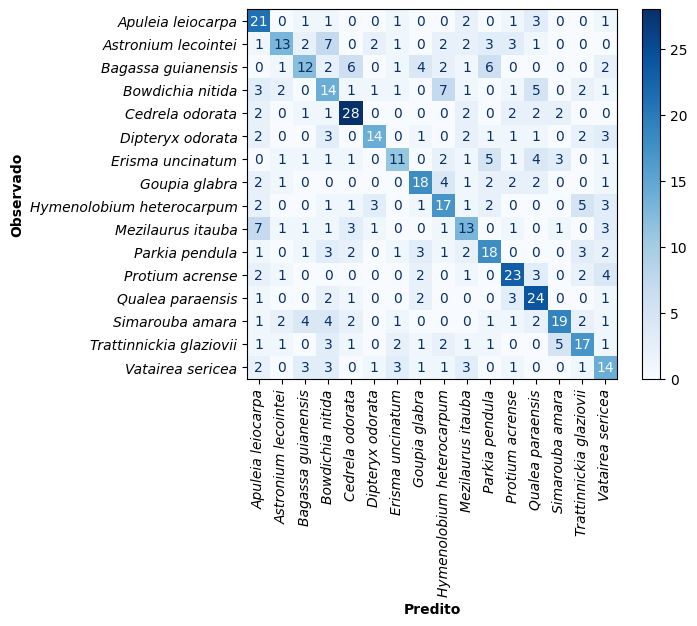

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================
cm_u81_ann = confusion_matrix(resultado_u81_ann['Classe_Observada'], resultado_u81_ann['Classe_Predita'])
disp_u81_ann = ConfusionMatrixDisplay(confusion_matrix = cm_u81_ann, display_labels = best_u81_ann.classes_)
disp_u81_ann.plot(cmap = 'Blues', xticks_rotation = 90)
disp_u81_ann.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_u81_ann.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_u81_ann.ax_.xaxis.set_tick_params(labelsize=10)
disp_u81_ann.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/CM/cm_u81_ann', dpi=800, bbox_inches='tight')
plt.show()


#### **Modelo M2**: Usando features LBP Uniforme (P = 16, R = 2)

In [ ]:
# ================================================================================
# Definições do estimador ANN
# ================================================================================

rs_u162_ann = pickle.load(open("./Output/Models_LBP/rs_u162_ann.pickle", "rb"))
best_u162_ann = rs_u162_ann.best_estimator_

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_u162, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes da divisão: {X_train_u162.shape}')
  print(f'Conjunto de validação antes da divisão: {X_train_u162.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_u162.iloc[train_index], X_train_u162.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1} >>>')

  # Ajuste do modelo para cada fold
  best_u162_ann.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_u162_ann.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_u162_ann.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')

  print('='*70)
  print(f'Listando métricas para o fold {i+1}>>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  print(f'Fold {i+1} finalizado!!!')
  print('*'*70)

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_u162_ann, 'best_u162_ann')
save_model_joblib(best_u162_ann, 'best_u162_ann')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

Métricas por fold:
Fold 1: Accuracy=0.5089, F1=0.4970, Recall=0.5089, Precision=0.5157
Fold 2: Accuracy=0.5134, F1=0.5019, Recall=0.5134, Precision=0.5440
Fold 3: Accuracy=0.4866, F1=0.4716, Recall=0.4866, Precision=0.4848
Fold 4: Accuracy=0.5223, F1=0.5106, Recall=0.5223, Precision=0.5530
Fold 5: Accuracy=0.4866, F1=0.4798, Recall=0.4866, Precision=0.4835
Fold 6: Accuracy=0.5561, F1=0.5481, Recall=0.5561, Precision=0.5918
Fold 7: Accuracy=0.5491, F1=0.5332, Recall=0.5491, Precision=0.5522
Fold 8: Accuracy=0.5650, F1=0.5531, Recall=0.5650, Precision=0.5768
Fold 9: Accuracy=0.4955, F1=0.4923, Recall=0.4955, Precision=0.5144
Fold 10: Accuracy=0.5561, F1=0.5510, Recall=0.5561, Precision=0.5802
Mean -- Standard Deviation -- Minimum Value -- Maximum Value
Accuracy -> mean: 0.5240, std: 0.0288, min: 0.4866, max: 0.5650
F1 Score -> mean: 0.5139, std: 0.0288, min: 0.4716, max: 0.5531
Recall -> mean: 0.5240, std: 0.0288, min: 0.4866, max: 0.5650
Precision -> mean: 0.5396, std: 0.0367, min: 0.48

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_u162_ann = best_u162_ann.predict_proba(X_test_u162)
prob_u162_ann = pd.DataFrame(prob_u162_ann, columns = best_u162_ann.classes_)
class_value = prob_u162_ann.idxmax(axis=1)
prob_value = prob_u162_ann.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_u162_ann = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_u162_ann = pd.concat([y_test, prob_u162_ann], axis = 1)
prob_u162_ann

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_u162_ann = prob_u162_ann.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_u162_ann = soma_prob_u162_ann.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_u162_ann = prob_u162_ann.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_u162_ann = pd.DataFrame({'Id': class_u162_ann.index,
                          'Probabilidade': soma_prob_u162_ann.groupby('Id').max(),
                          'Classe_Predita': class_u162_ann.values,
                          'Classe_Observada': class_obs_u162_ann.values})

# Exibir o resultado
resultado_u162_ann = resultado_u162_ann[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_u162_ann['Classe_Predita'] = resultado_u162_ann['Classe_Predita'].apply(lambda x: x[1])
resultado_u162_ann

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste - Voto Majoritário
# ================================================================================
print(classification_report(resultado_u162_ann['Classe_Observada'], resultado_u162_ann['Classe_Predita'], target_names= best_u162_ann.classes_))

                           precision    recall  f1-score   support

        Apuleia leiocarpa       0.44      0.52      0.48        31
      Astronium lecointei       0.55      0.49      0.51        37
       Bagassa guianensis       0.53      0.51      0.52        37
         Bowdichia nitida       0.48      0.54      0.51        39
          Cedrela odorata       0.57      0.62      0.60        40
         Dipteryx odorata       0.75      0.30      0.43        30
         Erisma uncinatum       0.44      0.34      0.39        32
            Goupia glabra       0.42      0.48      0.45        33
Hymenolobium heterocarpum       0.56      0.56      0.56        36
        Mezilaurus itauba       0.53      0.55      0.54        33
           Parkia pendula       0.56      0.62      0.59        37
          Protium acrense       0.68      0.74      0.71        38
         Qualea paraensis       0.43      0.62      0.51        34
          Simarouba amara       0.48      0.53      0.50     

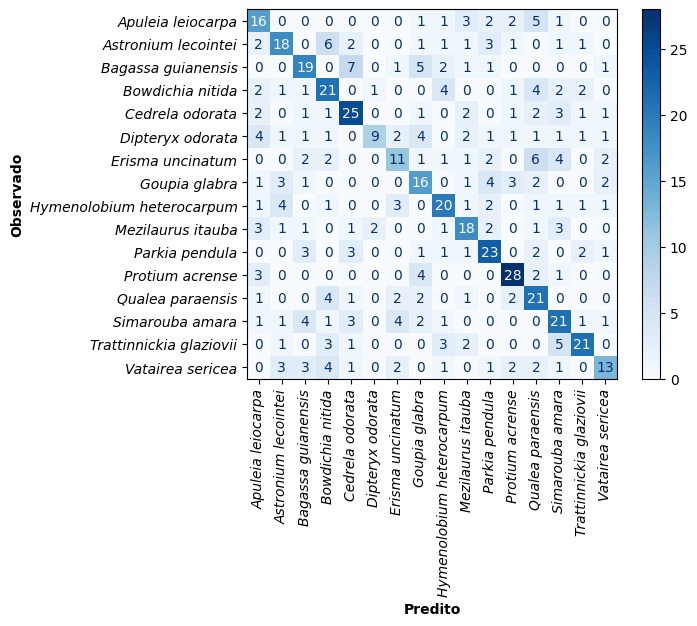

In [ ]:
# ================================================================================
# Matriz de Confusão - conjunto de teste (n = 566)
# ================================================================================
cm_u162_ann = confusion_matrix(resultado_u162_ann['Classe_Observada'], resultado_u162_ann['Classe_Predita'])
disp_u162_ann = ConfusionMatrixDisplay(confusion_matrix = cm_u162_ann, display_labels = best_u162_ann.classes_)
disp_u162_ann.plot(cmap = 'Blues', xticks_rotation = 90)
disp_u162_ann.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_u162_ann.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_u162_ann.ax_.xaxis.set_tick_params(labelsize=10)
disp_u162_ann.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/CM/cm_u162_ann', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M3**: Usando features LBP Uniforme (P = 24, R = 3)

In [ ]:
# ================================================================================
# Definições do estimador ANN
# ================================================================================

rs_u243_ann = pickle.load(open("./Output/Models_LBP/rs_u243_ann.pickle", "rb"))
best_u243_ann = rs_u243_ann.best_estimator_

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_u243, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes da divisão: {X_train_u243.shape}')
  print(f'Conjunto de validação antes da divisão: {X_train_u243.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_u243.iloc[train_index], X_train_u243.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1} >>>')

  # Ajuste do modelo para cada fold
  best_u243_ann.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_u243_ann.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_u243_ann.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')

  print('='*70)
  print(f'Listando métricas para o fold {i+1}>>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  print(f'Fold {i+1} finalizado!!!')
  print('*'*70)

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_u243_ann, 'best_u243_ann')
save_model_joblib(best_u243_ann, 'best_u243_ann')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

Métricas por fold:
Fold 1: Accuracy=0.5491, F1=0.5395, Recall=0.5491, Precision=0.5632
Fold 2: Accuracy=0.5446, F1=0.5443, Recall=0.5446, Precision=0.5622
Fold 3: Accuracy=0.5625, F1=0.5467, Recall=0.5625, Precision=0.5652
Fold 4: Accuracy=0.5759, F1=0.5732, Recall=0.5759, Precision=0.5963
Fold 5: Accuracy=0.5491, F1=0.5418, Recall=0.5491, Precision=0.5573
Fold 6: Accuracy=0.5695, F1=0.5610, Recall=0.5695, Precision=0.6016
Fold 7: Accuracy=0.5357, F1=0.5248, Recall=0.5357, Precision=0.5393
Fold 8: Accuracy=0.6099, F1=0.5953, Recall=0.6099, Precision=0.6220
Fold 9: Accuracy=0.5670, F1=0.5652, Recall=0.5670, Precision=0.5943
Fold 10: Accuracy=0.5964, F1=0.5936, Recall=0.5964, Precision=0.6139
Mean -- Standard Deviation -- Minimum Value -- Maximum Value
Accuracy -> mean: 0.5660, std: 0.0222, min: 0.5357, max: 0.6099
F1 Score -> mean: 0.5585, std: 0.0223, min: 0.5248, max: 0.5953
Recall -> mean: 0.5660, std: 0.0222, min: 0.5357, max: 0.6099
Precision -> mean: 0.5815, std: 0.0261, min: 0.53

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_u243_ann = best_u243_ann.predict_proba(X_test_u243)
prob_u243_ann = pd.DataFrame(prob_u243_ann, columns = best_u243_ann.classes_)
class_value = prob_u243_ann.idxmax(axis=1)
prob_value = prob_u243_ann.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_u243_ann = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_u243_ann = pd.concat([y_test, prob_u243_ann], axis = 1)
prob_u243_ann

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_u243_ann = prob_u243_ann.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_u243_ann = soma_prob_u243_ann.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_u243_ann = prob_u243_ann.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_u243_ann = pd.DataFrame({'Id': class_u243_ann.index,
                          'Probabilidade': soma_prob_u243_ann.groupby('Id').max(),
                          'Classe_Predita': class_u243_ann.values,
                          'Classe_Observada': class_obs_u243_ann.values})

# Exibir o resultado
resultado_u243_ann = resultado_u243_ann[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_u243_ann['Classe_Predita'] = resultado_u243_ann['Classe_Predita'].apply(lambda x: x[1])
resultado_u243_ann

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste (n= 566) - Voto Majoritário
# ================================================================================
print(classification_report(resultado_u243_ann['Classe_Observada'], resultado_u243_ann['Classe_Predita'], target_names= best_u243_ann.classes_))

                           precision    recall  f1-score   support

        Apuleia leiocarpa       0.39      0.52      0.44        31
      Astronium lecointei       0.68      0.57      0.62        37
       Bagassa guianensis       0.47      0.59      0.52        37
         Bowdichia nitida       0.69      0.51      0.59        39
          Cedrela odorata       0.59      0.60      0.59        40
         Dipteryx odorata       0.48      0.37      0.42        30
         Erisma uncinatum       0.60      0.38      0.46        32
            Goupia glabra       0.50      0.48      0.49        33
Hymenolobium heterocarpum       0.47      0.42      0.44        36
        Mezilaurus itauba       0.54      0.42      0.47        33
           Parkia pendula       0.47      0.57      0.51        37
          Protium acrense       0.76      0.76      0.76        38
         Qualea paraensis       0.52      0.76      0.62        34
          Simarouba amara       0.61      0.50      0.55     

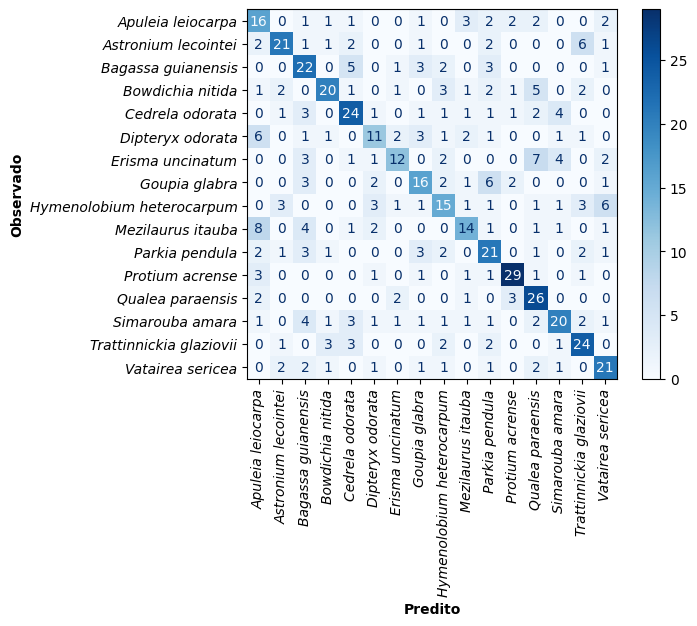

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================
cm_u243_ann = confusion_matrix(resultado_u243_ann['Classe_Observada'], resultado_u243_ann['Classe_Predita'])
disp_u243_ann = ConfusionMatrixDisplay(confusion_matrix = cm_u243_ann, display_labels = best_u243_ann.classes_)
disp_u243_ann.plot(cmap = 'Blues', xticks_rotation = 90)
disp_u243_ann.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_u243_ann.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_u243_ann.ax_.xaxis.set_tick_params(labelsize=10)
disp_u243_ann.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/CM/cm_u243_ann', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M4**: Usando features LBP Uniforme (Todos)

In [ ]:
# ================================================================================
# Definições do estimador ANN
# ================================================================================

rs_uni_ann = pickle.load(open("./Output/Models_LBP/rs_uni_ann.pickle", "rb"))
best_uni_ann = rs_uni_ann.best_estimator_

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_u, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes da divisão: {X_train_u.shape}')
  print(f'Conjunto de validação antes da divisão: {X_train_u.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_u.iloc[train_index], X_train_u.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1} >>>')

  # Ajuste do modelo para cada fold
  best_uni_ann.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_uni_ann.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_uni_ann.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')

  print('='*70)
  print(f'Listando métricas para o fold {i+1}>>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  print(f'Fold {i+1} finalizado!!!')
  print('*'*70)

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_uni_ann, 'best_uni_ann')
save_model_joblib(best_uni_ann, 'best_uni_ann')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

Métricas por fold:
Fold 1: Accuracy=0.7455, F1=0.7436, Recall=0.7455, Precision=0.7552
Fold 2: Accuracy=0.7321, F1=0.7301, Recall=0.7321, Precision=0.7564
Fold 3: Accuracy=0.7098, F1=0.7049, Recall=0.7098, Precision=0.7321
Fold 4: Accuracy=0.6875, F1=0.6776, Recall=0.6875, Precision=0.6862
Fold 5: Accuracy=0.7232, F1=0.7227, Recall=0.7232, Precision=0.7380
Fold 6: Accuracy=0.7354, F1=0.7337, Recall=0.7354, Precision=0.7547
Fold 7: Accuracy=0.7411, F1=0.7404, Recall=0.7411, Precision=0.7514
Fold 8: Accuracy=0.7713, F1=0.7715, Recall=0.7713, Precision=0.7849
Fold 9: Accuracy=0.6741, F1=0.6773, Recall=0.6741, Precision=0.7061
Fold 10: Accuracy=0.7354, F1=0.7338, Recall=0.7354, Precision=0.7447
Mean -- Standard Deviation -- Minimum Value -- Maximum Value
Accuracy -> mean: 0.7256, std: 0.0271, min: 0.6741, max: 0.7713
F1 Score -> mean: 0.7236, std: 0.0280, min: 0.6773, max: 0.7715
Recall -> mean: 0.7256, std: 0.0271, min: 0.6741, max: 0.7713
Precision -> mean: 0.7410, std: 0.0264, min: 0.67

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_uni_ann = best_uni_ann.predict_proba(X_test_u)
prob_uni_ann = pd.DataFrame(prob_uni_ann, columns = best_uni_ann.classes_)
class_value = prob_uni_ann.idxmax(axis=1)
prob_value = prob_uni_ann.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_uni_ann = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_uni_ann = pd.concat([y_test, prob_uni_ann], axis = 1)
prob_uni_ann

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_uni_ann = prob_uni_ann.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_uni_ann = soma_prob_uni_ann.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_uni_ann = prob_uni_ann.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_uni_ann = pd.DataFrame({'Id': class_uni_ann.index,
                          'Probabilidade': soma_prob_uni_ann.groupby('Id').max(),
                          'Classe_Predita': class_uni_ann.values,
                          'Classe_Observada': class_obs_uni_ann.values})

# Exibir o resultado
resultado_uni_ann = resultado_uni_ann[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_uni_ann['Classe_Predita'] = resultado_uni_ann['Classe_Predita'].apply(lambda x: x[1])
resultado_uni_ann

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste - Voto Majoritário
# ================================================================================
print(classification_report(resultado_uni_ann['Classe_Observada'], resultado_uni_ann['Classe_Predita'], target_names= best_uni_ann.classes_))

                           precision    recall  f1-score   support

        Apuleia leiocarpa       0.72      0.68      0.70        31
      Astronium lecointei       0.80      0.76      0.78        37
       Bagassa guianensis       0.88      0.76      0.81        37
         Bowdichia nitida       0.60      0.77      0.67        39
          Cedrela odorata       0.80      0.82      0.81        40
         Dipteryx odorata       0.81      0.57      0.67        30
         Erisma uncinatum       0.61      0.59      0.60        32
            Goupia glabra       0.53      0.64      0.58        33
Hymenolobium heterocarpum       0.76      0.78      0.77        36
        Mezilaurus itauba       0.72      0.64      0.68        33
           Parkia pendula       0.68      0.70      0.69        37
          Protium acrense       0.71      0.92      0.80        38
         Qualea paraensis       0.84      0.76      0.80        34
          Simarouba amara       0.78      0.72      0.75     

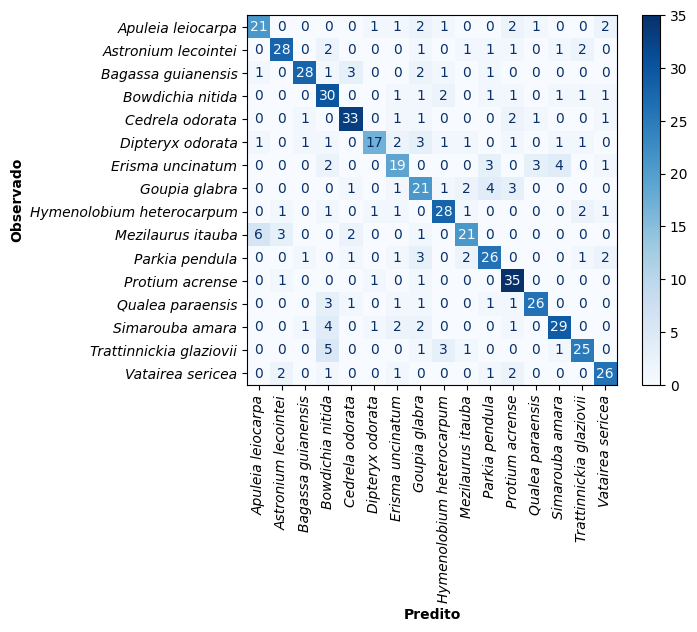

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================
cm_uni_ann = confusion_matrix(resultado_uni_ann['Classe_Observada'], resultado_uni_ann['Classe_Predita'])
disp_uni_ann = ConfusionMatrixDisplay(confusion_matrix = cm_uni_ann, display_labels = best_uni_ann.classes_)
disp_uni_ann.plot(cmap = 'Blues', xticks_rotation = 90)
disp_uni_ann.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_uni_ann.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_uni_ann.ax_.xaxis.set_tick_params(labelsize=10)
disp_uni_ann.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/CM/cm_uni_ann', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M5**: Usando features LBP Uniforme Não Invariante (P = 8, R = 1)

In [ ]:
# ================================================================================
# Definições do estimador ANN
# ================================================================================

rs_nri81_ann = pickle.load(open("./Output/Models_LBP/rs_nri81_ann.pickle", "rb"))
best_nri81_ann = rs_nri81_ann.best_estimator_

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_nri81, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes da divisão: {X_train_nri81.shape}')
  print(f'Conjunto de validação antes da divisão: {X_train_nri81.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_nri81.iloc[train_index], X_train_nri81.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1} >>>')

  # Ajuste do modelo para cada fold
  best_nri81_ann.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_nri81_ann.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_nri81_ann.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')

  print('='*70)
  print(f'Listando métricas para o fold {i+1}>>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  print(f'Fold {i+1} finalizado!!!')
  print('*'*70)

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_nri81_ann, 'best_nri81_ann')
save_model_joblib(best_nri81_ann, 'best_nri81_ann')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

Métricas por fold:
Fold 1: Accuracy=0.7411, F1=0.7384, Recall=0.7411, Precision=0.7480
Fold 2: Accuracy=0.6786, F1=0.6749, Recall=0.6786, Precision=0.6914
Fold 3: Accuracy=0.7723, F1=0.7704, Recall=0.7723, Precision=0.7800
Fold 4: Accuracy=0.7232, F1=0.7154, Recall=0.7232, Precision=0.7309
Fold 5: Accuracy=0.7589, F1=0.7570, Recall=0.7589, Precision=0.7648
Fold 6: Accuracy=0.7309, F1=0.7251, Recall=0.7309, Precision=0.7565
Fold 7: Accuracy=0.7545, F1=0.7551, Recall=0.7545, Precision=0.7638
Fold 8: Accuracy=0.7623, F1=0.7615, Recall=0.7623, Precision=0.7668
Fold 9: Accuracy=0.7277, F1=0.7265, Recall=0.7277, Precision=0.7341
Fold 10: Accuracy=0.7668, F1=0.7661, Recall=0.7668, Precision=0.7728
Mean -- Standard Deviation -- Minimum Value -- Maximum Value
Accuracy -> mean: 0.7416, std: 0.0266, min: 0.6786, max: 0.7723
F1 Score -> mean: 0.7390, std: 0.0280, min: 0.6749, max: 0.7704
Recall -> mean: 0.7416, std: 0.0266, min: 0.6786, max: 0.7723
Precision -> mean: 0.7509, std: 0.0249, min: 0.67

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_nri81_ann = best_nri81_ann.predict_proba(X_test_nri81)
prob_nri81_ann = pd.DataFrame(prob_nri81_ann, columns = best_nri81_ann.classes_)
class_value = prob_nri81_ann.idxmax(axis=1)
prob_value = prob_nri81_ann.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_nri81_ann = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_nri81_ann = pd.concat([y_test, prob_nri81_ann], axis = 1)
prob_nri81_ann

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_nri81_ann = prob_nri81_ann.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_nri81_ann = soma_prob_nri81_ann.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_nri81_ann = prob_nri81_ann.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_nri81_ann = pd.DataFrame({'Id': class_nri81_ann.index,
                          'Probabilidade': soma_prob_nri81_ann.groupby('Id').max(),
                          'Classe_Predita': class_nri81_ann.values,
                          'Classe_Observada': class_obs_nri81_ann.values})

# Exibir o resultado
resultado_nri81_ann = resultado_nri81_ann[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_nri81_ann['Classe_Predita'] = resultado_nri81_ann['Classe_Predita'].apply(lambda x: x[1])
resultado_nri81_ann

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste (n= 566) - Voto Majoritário
# ================================================================================
print(classification_report(resultado_nri81_ann['Classe_Observada'], resultado_nri81_ann['Classe_Predita'], target_names= best_nri81_ann.classes_))

                           precision    recall  f1-score   support

        Apuleia leiocarpa       0.81      0.71      0.76        31
      Astronium lecointei       0.82      0.73      0.77        37
       Bagassa guianensis       0.77      0.73      0.75        37
         Bowdichia nitida       0.73      0.85      0.79        39
          Cedrela odorata       0.77      0.90      0.83        40
         Dipteryx odorata       0.86      0.63      0.73        30
         Erisma uncinatum       0.81      0.69      0.75        32
            Goupia glabra       0.64      0.55      0.59        33
Hymenolobium heterocarpum       0.62      0.67      0.64        36
        Mezilaurus itauba       0.68      0.79      0.73        33
           Parkia pendula       0.77      0.81      0.79        37
          Protium acrense       0.78      0.76      0.77        38
         Qualea paraensis       0.78      0.82      0.80        34
          Simarouba amara       0.78      0.78      0.78     

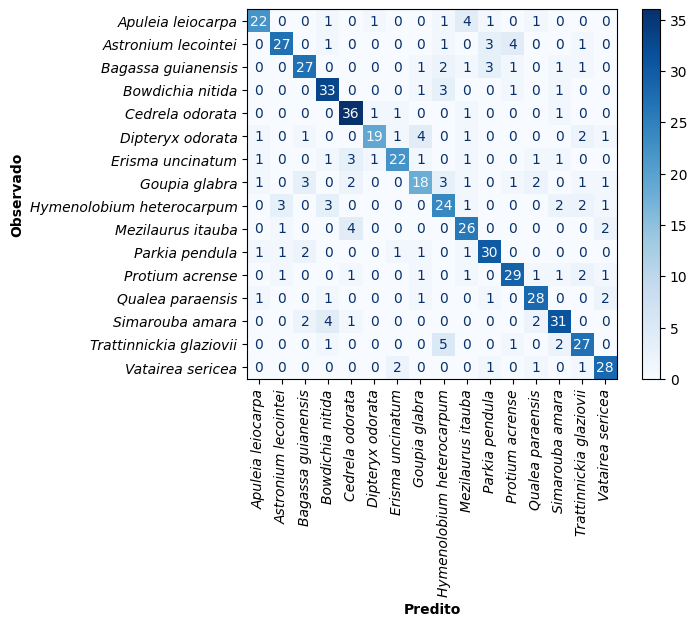

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================
cm_nri81_ann = confusion_matrix(resultado_nri81_ann['Classe_Observada'], resultado_nri81_ann['Classe_Predita'])
disp_nri81_ann = ConfusionMatrixDisplay(confusion_matrix = cm_nri81_ann, display_labels = best_nri81_ann.classes_)
disp_nri81_ann.plot(cmap = 'Blues', xticks_rotation = 90)
disp_nri81_ann.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_nri81_ann.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_nri81_ann.ax_.xaxis.set_tick_params(labelsize=10)
disp_nri81_ann.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')


plt.savefig('./Output_patches/CM/cm_nri81_ann', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M6**: Usando features LBP Uniforme Não Invariante (P = 16, R = 2)

In [ ]:
# ================================================================================
# Definições do estimador ANN
# ================================================================================

rs_nri162_ann = pickle.load(open("./Output/LBP/Models/ANN/rs_nri162_ann.pickle", "rb"))
best_nri162_ann = rs_nri162_ann.best_estimator_
best_nri162_ann.get_params()

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_nri162, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes da divisão: {X_train_nri162.shape}')
  print(f'Conjunto de validação antes da divisão: {X_train_nri162.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_nri162.iloc[train_index], X_train_nri162.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1} >>>')

  # Ajuste do modelo para cada fold
  best_nri162_ann.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_nri162_ann.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_nri162_ann.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')

  print('='*70)
  print(f'Listando métricas para o fold {i+1}>>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  print(f'Fold {i+1} finalizado!!!')
  print('*'*70)

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_nri162_ann, 'best_nri162_ann')
save_model_joblib(best_nri162_ann, 'best_nri162_ann')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

Métricas por fold:
Fold 1: Accuracy=0.8170, F1=0.8168, Recall=0.8170, Precision=0.8387
Fold 2: Accuracy=0.8527, F1=0.8542, Recall=0.8527, Precision=0.8687
Fold 3: Accuracy=0.8170, F1=0.8124, Recall=0.8170, Precision=0.8179
Fold 4: Accuracy=0.7679, F1=0.7625, Recall=0.7679, Precision=0.7785
Fold 5: Accuracy=0.7679, F1=0.7674, Recall=0.7679, Precision=0.7776
Fold 6: Accuracy=0.8430, F1=0.8397, Recall=0.8430, Precision=0.8637
Fold 7: Accuracy=0.7946, F1=0.7933, Recall=0.7946, Precision=0.8003
Fold 8: Accuracy=0.8655, F1=0.8643, Recall=0.8655, Precision=0.8716
Fold 9: Accuracy=0.8214, F1=0.8222, Recall=0.8214, Precision=0.8348
Fold 10: Accuracy=0.8251, F1=0.8227, Recall=0.8251, Precision=0.8278
Mean -- Standard Deviation -- Minimum Value -- Maximum Value
Accuracy -> mean: 0.8172, std: 0.0312, min: 0.7679, max: 0.8655
F1 Score -> mean: 0.8155, std: 0.0319, min: 0.7625, max: 0.8643
Recall -> mean: 0.8172, std: 0.0312, min: 0.7679, max: 0.8655
Precision -> mean: 0.8280, std: 0.0329, min: 0.76

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

best_nri162_ann = pickle.load(open("./Output_patches/LBP/Models/ANN/best_nri162_ann.pickle", "rb"))
prob_nri162_ann = best_nri162_ann.predict_proba(X_test_nri162)
prob_nri162_ann = pd.DataFrame(prob_nri162_ann, columns = best_nri162_ann.classes_)
class_value = prob_nri162_ann.idxmax(axis=1)
prob_value = prob_nri162_ann.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_nri162_ann = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_nri162_ann = pd.concat([y_test, prob_nri162_ann], axis = 1)
prob_nri162_ann

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_nri162_ann = prob_nri162_ann.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_nri162_ann = soma_prob_nri162_ann.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_nri162_ann = prob_nri162_ann.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_nri162_ann = pd.DataFrame({'Id': class_nri162_ann.index,
                          'Probabilidade': soma_prob_nri162_ann.groupby('Id').max(),
                          'Classe_Predita': class_nri162_ann.values,
                          'Classe_Observada': class_obs_nri162_ann.values})

# Exibir o resultado
resultado_nri162_ann = resultado_nri162_ann[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_nri162_ann['Classe_Predita'] = resultado_nri162_ann['Classe_Predita'].apply(lambda x: x[1])
resultado_nri162_ann

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste - Voto Majoritário
# ================================================================================
print(classification_report(resultado_nri162_ann['Classe_Observada'], resultado_nri162_ann['Classe_Predita'], target_names= best_nri162_ann.classes_))

                           precision    recall  f1-score   support

        Apuleia leiocarpa       0.86      0.77      0.81        31
      Astronium lecointei       0.74      0.86      0.80        37
       Bagassa guianensis       0.76      0.78      0.77        37
         Bowdichia nitida       0.77      0.92      0.84        39
          Cedrela odorata       0.85      0.88      0.86        40
         Dipteryx odorata       0.71      0.67      0.69        30
         Erisma uncinatum       0.88      0.69      0.77        32
            Goupia glabra       0.72      0.64      0.68        33
Hymenolobium heterocarpum       0.72      0.58      0.65        36
        Mezilaurus itauba       0.82      0.85      0.84        33
           Parkia pendula       0.76      0.78      0.77        37
          Protium acrense       0.76      0.82      0.78        38
         Qualea paraensis       0.76      0.82      0.79        34
          Simarouba amara       0.89      0.85      0.87     

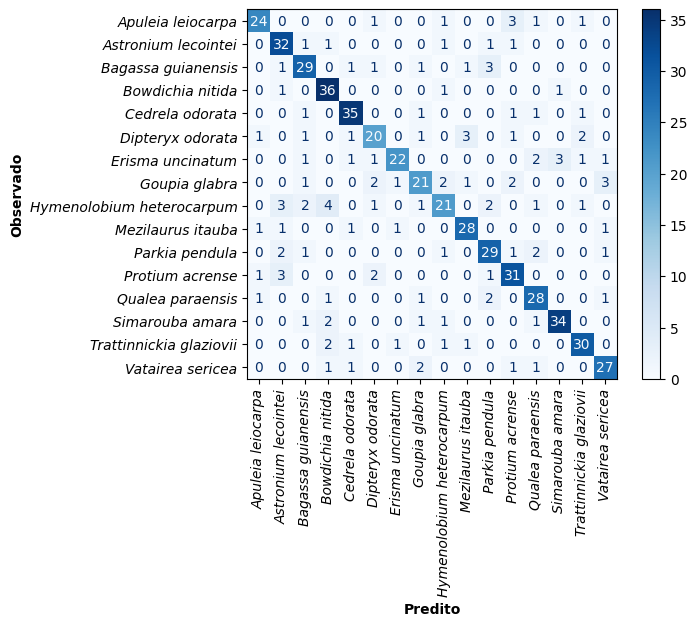

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================
cm_nri162_ann = confusion_matrix(resultado_nri162_ann['Classe_Observada'], resultado_nri162_ann['Classe_Predita'])
disp_nri162_ann = ConfusionMatrixDisplay(confusion_matrix = cm_nri162_ann, display_labels = best_nri162_ann.classes_)
disp_nri162_ann.plot(cmap = 'Blues', xticks_rotation = 90)
disp_nri162_ann.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_nri162_ann.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_nri162_ann.ax_.xaxis.set_tick_params(labelsize=10)
disp_nri162_ann.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/CM/cm_nri162_ann', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M7**: Usando features LBP Uniforme Não Invariante (P = 24, R = 3)

In [ ]:
# ================================================================================
# Definições do estimador ANN
# ================================================================================

rs_nri243_ann = pickle.load(open("./Output/Models_LBP/rs_nri243_ann.pickle", "rb"))
best_nri243_ann = rs_nri243_ann.best_estimator_

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_nri243, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes da divisão: {X_train_nri243.shape}')
  print(f'Conjunto de validação antes da divisão: {X_train_nri243.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_nri243.iloc[train_index], X_train_nri243.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1} >>>')

  # Ajuste do modelo para cada fold
  best_nri243_ann.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_nri243_ann.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_nri243_ann.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')

  print('='*70)
  print(f'Listando métricas para o fold {i+1}>>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  print(f'Fold {i+1} finalizado!!!')
  print('*'*70)

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_nri243_ann, 'best_nri243_ann')
save_model_joblib(best_nri243_ann, 'best_nri243_ann')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

Métricas por fold:
Fold 1: Accuracy=0.6741, F1=0.6725, Recall=0.6741, Precision=0.6943
Fold 2: Accuracy=0.6429, F1=0.6355, Recall=0.6429, Precision=0.6450
Fold 3: Accuracy=0.6786, F1=0.6735, Recall=0.6786, Precision=0.6894
Fold 4: Accuracy=0.6339, F1=0.6313, Recall=0.6339, Precision=0.6443
Fold 5: Accuracy=0.6562, F1=0.6476, Recall=0.6562, Precision=0.6664
Fold 6: Accuracy=0.6906, F1=0.6844, Recall=0.6906, Precision=0.7014
Fold 7: Accuracy=0.6429, F1=0.6377, Recall=0.6429, Precision=0.6495
Fold 8: Accuracy=0.7399, F1=0.7334, Recall=0.7399, Precision=0.7610
Fold 9: Accuracy=0.7054, F1=0.7031, Recall=0.7054, Precision=0.7195
Fold 10: Accuracy=0.6861, F1=0.6803, Recall=0.6861, Precision=0.6926
Mean -- Standard Deviation -- Minimum Value -- Maximum Value
Accuracy -> mean: 0.6751, std: 0.0310, min: 0.6339, max: 0.7399
F1 Score -> mean: 0.6699, std: 0.0311, min: 0.6313, max: 0.7334
Recall -> mean: 0.6751, std: 0.0310, min: 0.6339, max: 0.7399
Precision -> mean: 0.6864, std: 0.0350, min: 0.63

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_nri243_ann = best_nri243_ann.predict_proba(X_test_nri243)
prob_nri243_ann = pd.DataFrame(prob_nri243_ann, columns = best_nri243_ann.classes_)
class_value = prob_nri243_ann.idxmax(axis=1)
prob_value = prob_nri243_ann.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_nri243_ann = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_nri243_ann = pd.concat([y_test, prob_nri243_ann], axis = 1)
prob_nri243_ann

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_nri243_ann = prob_nri243_ann.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_nri243_ann = soma_prob_nri243_ann.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_nri243_ann = prob_nri243_ann.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_nri243_ann = pd.DataFrame({'Id': class_nri243_ann.index,
                          'Probabilidade': soma_prob_nri243_ann.groupby('Id').max(),
                          'Classe_Predita': class_nri243_ann.values,
                          'Classe_Observada': class_obs_nri243_ann.values})

# Exibir o resultado
resultado_nri243_ann = resultado_nri243_ann[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_nri243_ann['Classe_Predita'] = resultado_nri243_ann['Classe_Predita'].apply(lambda x: x[1])
resultado_nri243_ann

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste (n= 566) - Voto Majoritário
# ================================================================================
print(classification_report(resultado_nri243_ann['Classe_Observada'], resultado_nri243_ann['Classe_Predita'], target_names= best_nri243_ann.classes_))

                           precision    recall  f1-score   support

        Apuleia leiocarpa       0.63      0.71      0.67        31
      Astronium lecointei       0.69      0.73      0.71        37
       Bagassa guianensis       0.73      0.73      0.73        37
         Bowdichia nitida       0.67      0.82      0.74        39
          Cedrela odorata       0.82      0.70      0.76        40
         Dipteryx odorata       0.73      0.53      0.62        30
         Erisma uncinatum       0.70      0.59      0.64        32
            Goupia glabra       0.54      0.42      0.47        33
Hymenolobium heterocarpum       0.52      0.31      0.39        36
        Mezilaurus itauba       0.71      0.61      0.66        33
           Parkia pendula       0.49      0.65      0.56        37
          Protium acrense       0.55      0.82      0.66        38
         Qualea paraensis       0.77      0.59      0.67        34
          Simarouba amara       0.80      0.80      0.80     

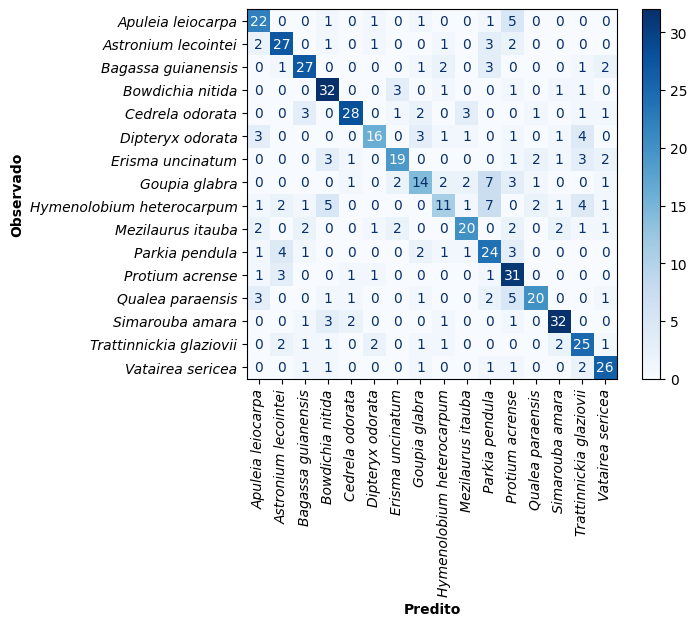

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================
cm_nri243_ann = confusion_matrix(resultado_nri243_ann['Classe_Observada'], resultado_nri243_ann['Classe_Predita'])
disp_nri243_ann = ConfusionMatrixDisplay(confusion_matrix = cm_nri243_ann, display_labels = best_nri243_ann.classes_)
disp_nri243_ann.plot(cmap = 'Blues', xticks_rotation = 90)
disp_nri243_ann.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_nri243_ann.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_nri243_ann.ax_.xaxis.set_tick_params(labelsize=10)
disp_nri243_ann.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/CM/cm_nri243_ann', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M8**: Usando features LBP Uniforme Não Invariante (Todos)

In [ ]:
# ================================================================================
# Definições do estimador ANN
# ================================================================================

rs_nri_ann = pickle.load(open("./Output/LBP/Models/ANN/rs_nri_ann.pickle", "rb"))
best_nri_ann = rs_nri_ann.best_estimator_
model_name = 'best_nri_ann'
best_nri_ann.get_params()

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_nri, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes divisão: {X_train_nri.shape}')
  print(f'Conjunto de validação antes divisão: {X_train_nri.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_nri.iloc[train_index], X_train_nri.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1}>>>')

  # Ajuste do modelo para cada fold
  best_nri_ann.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_nri_ann.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_nri_ann.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')
  cm = confusion_matrix(fold_obs, fold_predictions)

  print('='*70)
  print(f'Listando métricas para o fold {i+1} >>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  # Plotar matriz de confusão utilizando ConfusionMatrixDisplay
  disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=best_nri_ann.classes_)
  disp.plot(cmap = 'Blues', xticks_rotation = 90, colorbar = False)   # Greys, Purples, Blues, Greens, BuGn, GnBu
  disp.ax_.set_title(f'CM-fold {i+1}\n (Accuracy: {accuracy_fold:.4f}, Precision: {precision_fold:.4f}, Recall: {recall_fold:.4f}, F1-score: {f1_fold:.4f})',
                      fontsize=10)
  disp.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
  disp.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
  plt.yticks(style='italic')
  plt.xticks(style='italic')
  disp.ax_.xaxis.set_tick_params(labelsize=10)
  disp.ax_.yaxis.set_tick_params(labelsize=10)
  plt.show()

  # Salvando matriz de confusão
  print(f'Salvando matriz de confusão para o folder {i+1}...')
  plt.savefig(f'./Output_patches/CM/{i+1}_{model_name}', dpi=800, bbox_inches='tight')
  print(f'Matriz de confusão para o folder {i+1} salva com sucesso!')
  plt.show()

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_nri_ann, 'best_nri_ann')
save_model_joblib(best_nri_ann, 'best_nri_ann')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

Métricas por fold:
Fold 1: Accuracy=0.7500, F1=0.7500, Recall=0.7500, Precision=0.7617
Fold 2: Accuracy=0.7232, F1=0.7244, Recall=0.7232, Precision=0.7398
Fold 3: Accuracy=0.8170, F1=0.8177, Recall=0.8170, Precision=0.8275
Fold 4: Accuracy=0.7277, F1=0.7261, Recall=0.7277, Precision=0.7352
Fold 5: Accuracy=0.7679, F1=0.7626, Recall=0.7679, Precision=0.7745
Fold 6: Accuracy=0.8072, F1=0.8059, Recall=0.8072, Precision=0.8138
Fold 7: Accuracy=0.7768, F1=0.7741, Recall=0.7768, Precision=0.7799
Fold 8: Accuracy=0.8117, F1=0.8114, Recall=0.8117, Precision=0.8221
Fold 9: Accuracy=0.7902, F1=0.7893, Recall=0.7902, Precision=0.7957
Fold 10: Accuracy=0.7803, F1=0.7797, Recall=0.7803, Precision=0.7913
Mean -- Standard Deviation -- Minimum Value -- Maximum Value
Accuracy -> mean: 0.7752, std: 0.0316, min: 0.7232, max: 0.8170
F1 Score -> mean: 0.7741, std: 0.0317, min: 0.7244, max: 0.8177
Recall -> mean: 0.7752, std: 0.0316, min: 0.7232, max: 0.8170
Precision -> mean: 0.7841, std: 0.0306, min: 0.72

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_nri_ann = best_nri_ann.predict_proba(X_test_nri)
prob_nri_ann = pd.DataFrame(prob_nri_ann, columns = best_nri_ann.classes_)
class_value = prob_nri_ann.idxmax(axis=1)
prob_value = prob_nri_ann.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_nri_ann = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_nri_ann = pd.concat([y_test, prob_nri_ann], axis = 1)
prob_nri_ann

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_nri_ann = prob_nri_ann.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_nri_ann = soma_prob_nri_ann.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_nri_ann = prob_nri_ann.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_nri_ann = pd.DataFrame({'Id': class_nri_ann.index,
                          'Probabilidade': soma_prob_nri_ann.groupby('Id').max(),
                          'Classe_Predita': class_nri_ann.values,
                          'Classe_Observada': class_obs_nri_ann.values})

# Exibir o resultado
resultado_nri_ann = resultado_nri_ann[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_nri_ann['Classe_Predita'] = resultado_nri_ann['Classe_Predita'].apply(lambda x: x[1])
resultado_nri_ann

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste (n= 566) - Voto Majoritário
# ================================================================================
print(classification_report(resultado_nri_ann['Classe_Observada'], resultado_nri_ann['Classe_Predita'], target_names= best_nri_ann.classes_))

                           precision    recall  f1-score   support

        Apuleia leiocarpa       0.73      0.71      0.72        31
      Astronium lecointei       0.71      0.86      0.78        37
       Bagassa guianensis       0.79      0.81      0.80        37
         Bowdichia nitida       0.71      0.87      0.78        39
          Cedrela odorata       0.90      0.90      0.90        40
         Dipteryx odorata       0.79      0.73      0.76        30
         Erisma uncinatum       0.86      0.75      0.80        32
            Goupia glabra       0.70      0.48      0.57        33
Hymenolobium heterocarpum       0.55      0.50      0.52        36
        Mezilaurus itauba       0.81      0.76      0.78        33
           Parkia pendula       0.67      0.81      0.73        37
          Protium acrense       0.67      0.76      0.72        38
         Qualea paraensis       0.75      0.71      0.73        34
          Simarouba amara       0.78      0.80      0.79     

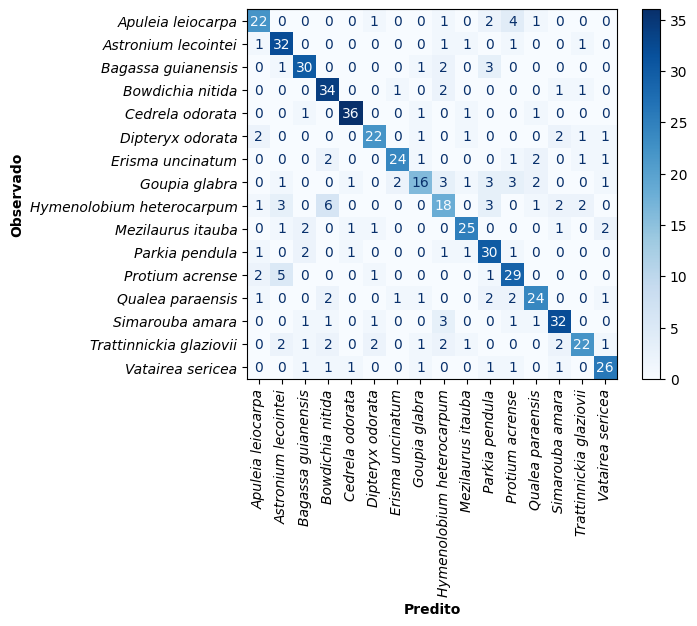

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================
cm_nri_ann = confusion_matrix(resultado_nri_ann['Classe_Observada'], resultado_nri_ann['Classe_Predita'])
disp_nri_ann = ConfusionMatrixDisplay(confusion_matrix = cm_nri_ann, display_labels = best_nri_ann.classes_)
disp_nri_ann.plot(cmap = 'Blues', xticks_rotation = 90)
disp_nri_ann.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_nri_ann.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_nri_ann.ax_.xaxis.set_tick_params(labelsize=10)
disp_nri_ann.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/CM/cm_nri_ann', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M9**: Usando features LBP (Todos)

In [ ]:
# ================================================================================
# Definições do estimador ANN
# ================================================================================

rs_unri_ann = pickle.load(open('./Output/Models_LBP/rs_unri_ann.pickle', "rb"))
best_unri_ann = rs_unri_ann.best_estimator_
model_name = 'best_unri_ann'

Criando fold 1 >>>
Conjunto de treino antes divisão: (111850, 911)
Conjunto de validação antes divisão: (111850, 911)
Conjunto de treino após divisão: (100650, 911)
Conjunto de validação após divisão: (11200, 911)
Treinando fold 1>>>
Fazendo previsões para o fold 1>>>
Listando métricas para o fold 1 >>>
Salvando matriz de confusão para o folder 1...
Matriz de confusão para o folder 1 salva com sucesso!


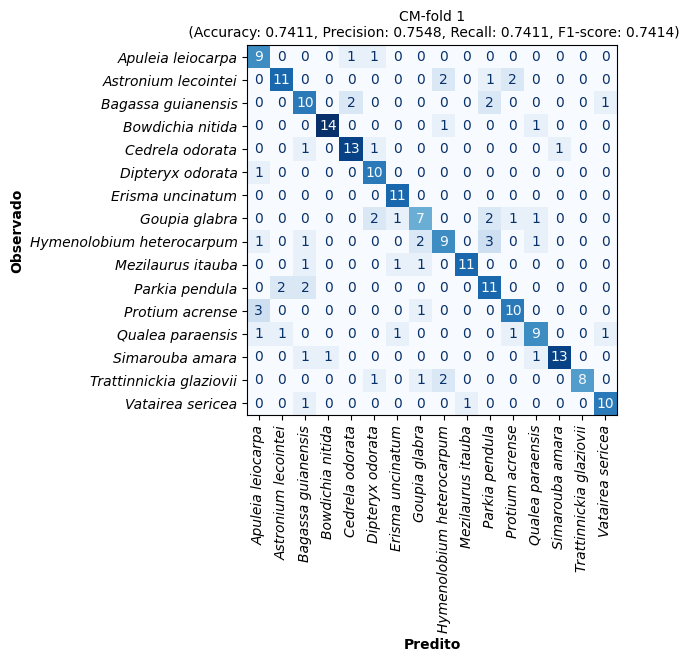

Criando fold 2 >>>
Conjunto de treino antes divisão: (111850, 911)
Conjunto de validação antes divisão: (111850, 911)
Conjunto de treino após divisão: (100650, 911)
Conjunto de validação após divisão: (11200, 911)
Treinando fold 2>>>
Fazendo previsões para o fold 2>>>
Listando métricas para o fold 2 >>>
Salvando matriz de confusão para o folder 2...
Matriz de confusão para o folder 2 salva com sucesso!


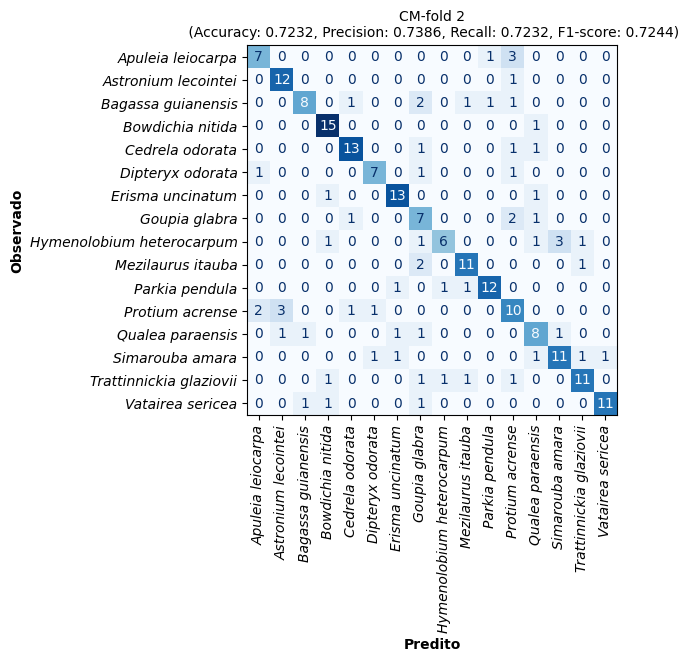

Criando fold 3 >>>
Conjunto de treino antes divisão: (111850, 911)
Conjunto de validação antes divisão: (111850, 911)
Conjunto de treino após divisão: (100650, 911)
Conjunto de validação após divisão: (11200, 911)
Treinando fold 3>>>
Fazendo previsões para o fold 3>>>
Listando métricas para o fold 3 >>>
Salvando matriz de confusão para o folder 3...
Matriz de confusão para o folder 3 salva com sucesso!


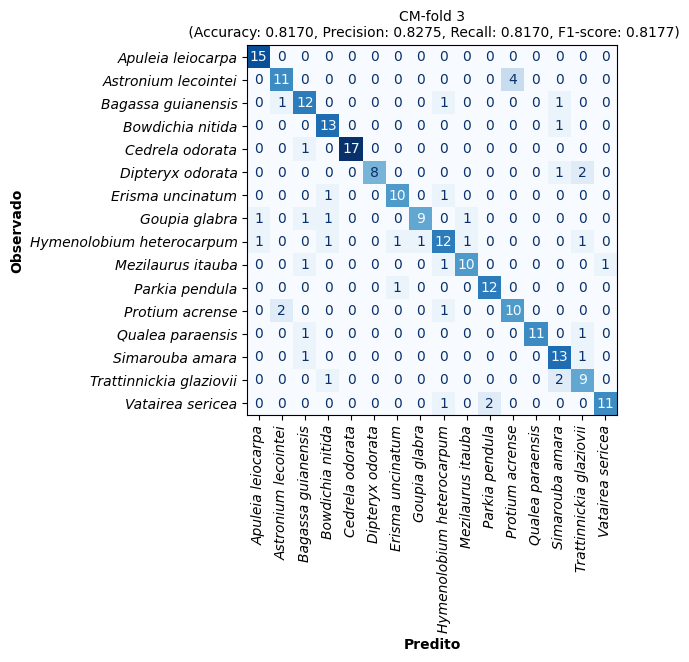

Criando fold 4 >>>
Conjunto de treino antes divisão: (111850, 911)
Conjunto de validação antes divisão: (111850, 911)
Conjunto de treino após divisão: (100650, 911)
Conjunto de validação após divisão: (11200, 911)
Treinando fold 4>>>
Fazendo previsões para o fold 4>>>
Listando métricas para o fold 4 >>>
Salvando matriz de confusão para o folder 4...
Matriz de confusão para o folder 4 salva com sucesso!


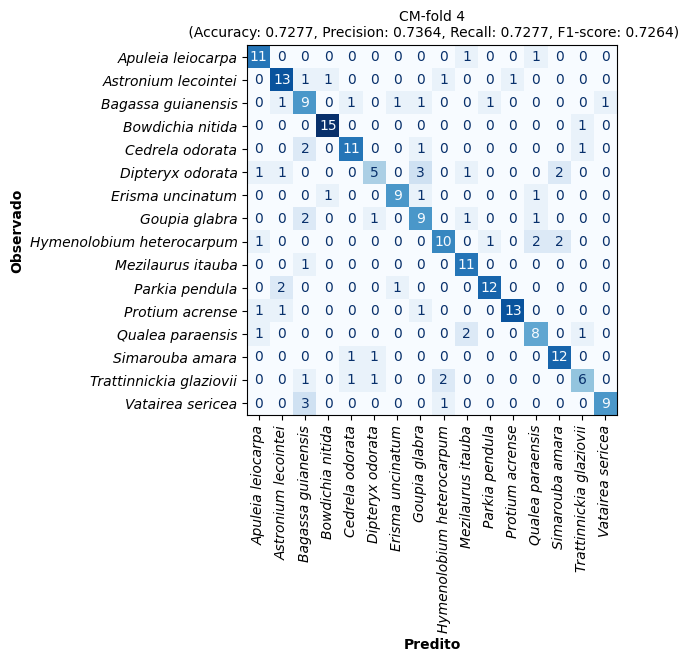

Criando fold 5 >>>
Conjunto de treino antes divisão: (111850, 911)
Conjunto de validação antes divisão: (111850, 911)
Conjunto de treino após divisão: (100650, 911)
Conjunto de validação após divisão: (11200, 911)
Treinando fold 5>>>
Fazendo previsões para o fold 5>>>
Listando métricas para o fold 5 >>>
Salvando matriz de confusão para o folder 5...
Matriz de confusão para o folder 5 salva com sucesso!


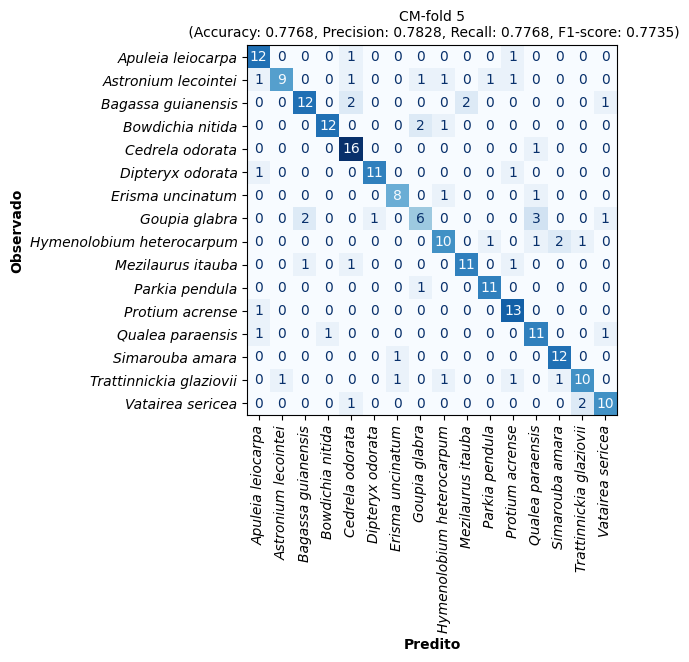

Criando fold 6 >>>
Conjunto de treino antes divisão: (111850, 911)
Conjunto de validação antes divisão: (111850, 911)
Conjunto de treino após divisão: (100700, 911)
Conjunto de validação após divisão: (11150, 911)
Treinando fold 6>>>
Fazendo previsões para o fold 6>>>
Listando métricas para o fold 6 >>>
Salvando matriz de confusão para o folder 6...
Matriz de confusão para o folder 6 salva com sucesso!


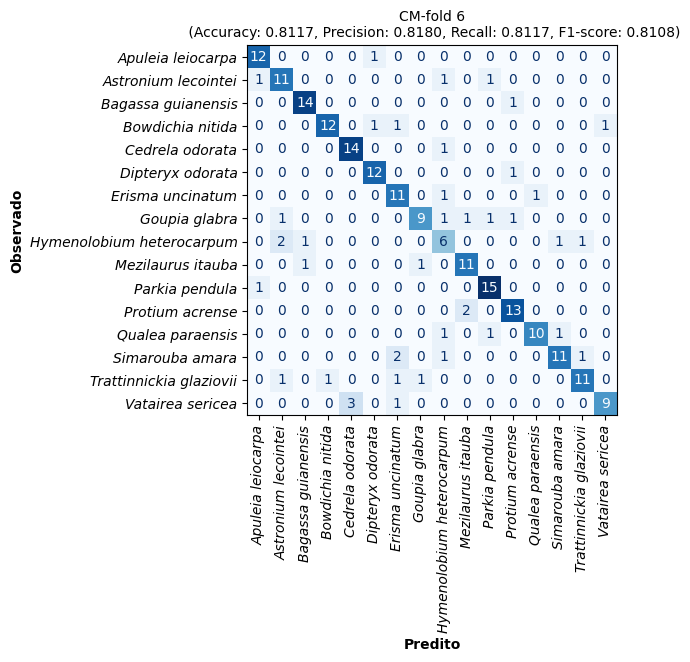

Criando fold 7 >>>
Conjunto de treino antes divisão: (111850, 911)
Conjunto de validação antes divisão: (111850, 911)
Conjunto de treino após divisão: (100650, 911)
Conjunto de validação após divisão: (11200, 911)
Treinando fold 7>>>
Fazendo previsões para o fold 7>>>
Listando métricas para o fold 7 >>>
Salvando matriz de confusão para o folder 7...
Matriz de confusão para o folder 7 salva com sucesso!


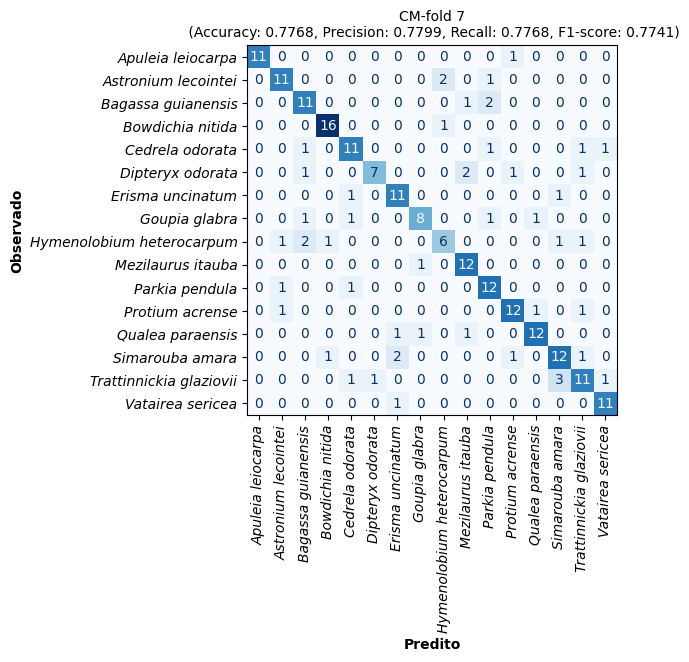

Criando fold 8 >>>
Conjunto de treino antes divisão: (111850, 911)
Conjunto de validação antes divisão: (111850, 911)
Conjunto de treino após divisão: (100700, 911)
Conjunto de validação após divisão: (11150, 911)
Treinando fold 8>>>
Fazendo previsões para o fold 8>>>
Listando métricas para o fold 8 >>>
Salvando matriz de confusão para o folder 8...
Matriz de confusão para o folder 8 salva com sucesso!


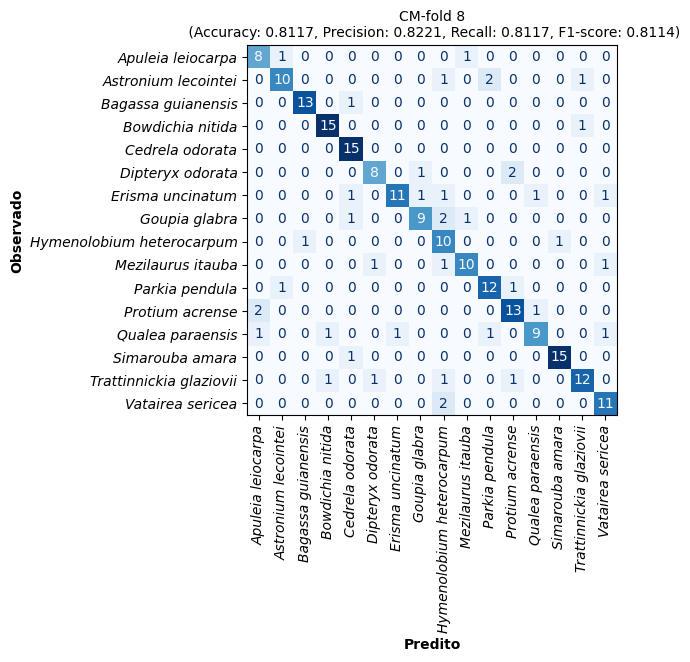

Criando fold 9 >>>
Conjunto de treino antes divisão: (111850, 911)
Conjunto de validação antes divisão: (111850, 911)
Conjunto de treino após divisão: (100650, 911)
Conjunto de validação após divisão: (11200, 911)
Treinando fold 9>>>
Fazendo previsões para o fold 9>>>
Listando métricas para o fold 9 >>>
Salvando matriz de confusão para o folder 9...
Matriz de confusão para o folder 9 salva com sucesso!


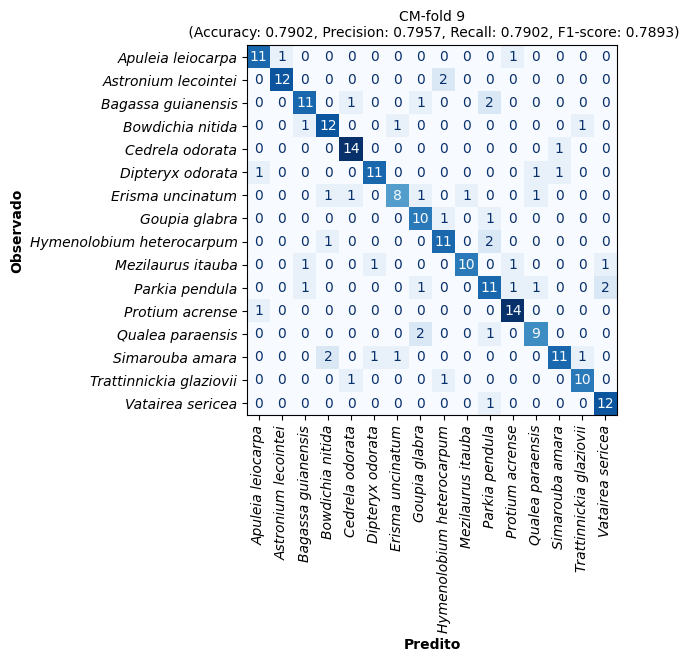

Criando fold 10 >>>
Conjunto de treino antes divisão: (111850, 911)
Conjunto de validação antes divisão: (111850, 911)
Conjunto de treino após divisão: (100700, 911)
Conjunto de validação após divisão: (11150, 911)
Treinando fold 10>>>
Fazendo previsões para o fold 10>>>
Listando métricas para o fold 10 >>>
Salvando matriz de confusão para o folder 10...
Matriz de confusão para o folder 10 salva com sucesso!


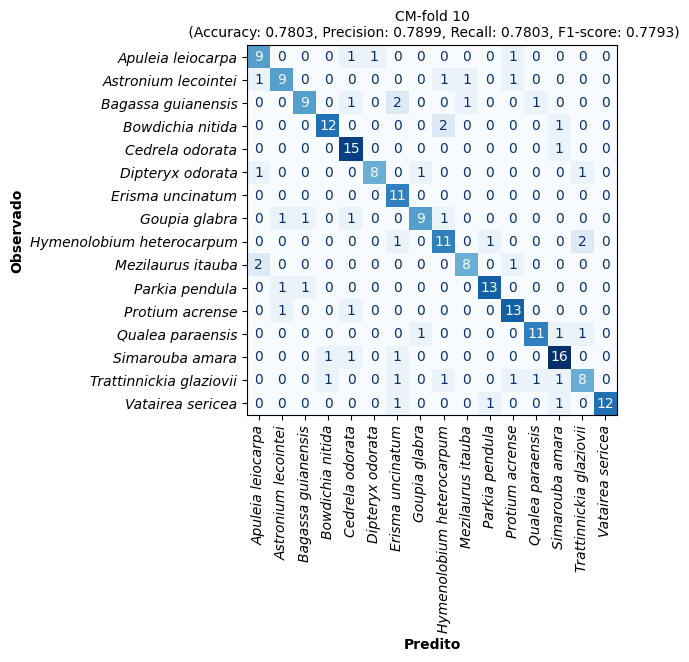

Salvando modelo...
MODELO SALVO!


In [ ]:
'''O código foi alterado para incluir a obtenção das matrizes de confusão por fold'''

accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_unri, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes divisão: {X_train_unri.shape}')
  print(f'Conjunto de validação antes divisão: {X_train_unri.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_unri.iloc[train_index], X_train_unri.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1}>>>')

  # Ajuste do modelo para cada fold
  best_unri_ann.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_unri_ann.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_unri_ann.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')


  print('='*70)
  print(f'Listando métricas para o fold {i+1} >>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  # Plotar matriz de confusão utilizando ConfusionMatrixDisplay
  cm = confusion_matrix(fold_obs, fold_predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=best_unri_ann.classes_)
  disp.plot(cmap = 'Blues', xticks_rotation = 90, colorbar = False)   # Greys, Purples, Blues, Greens, BuGn, GnBu
  disp.ax_.set_title(f'CM-fold {i+1}\n (Accuracy: {accuracy_fold:.4f}, Precision: {precision_fold:.4f}, Recall: {recall_fold:.4f}, F1-score: {f1_fold:.4f})',
                      fontsize=10)
  disp.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
  disp.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
  plt.yticks(style='italic')
  plt.xticks(style='italic')
  disp.ax_.xaxis.set_tick_params(labelsize=10)
  disp.ax_.yaxis.set_tick_params(labelsize=10)

  # Salvando matriz de confusão
  print(f'Salvando matriz de confusão para o folder {i+1}...')
  plt.savefig(f'./Output_patches/CM/{i+1}_{model_name}', dpi=800, bbox_inches='tight')
  print(f'Matriz de confusão para o folder {i+1} salva com sucesso!')
  plt.show()

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_unri_ann, 'best_unri_ann')
save_model_joblib(best_unri_ann, 'best_unri_ann')

print('MODELO SALVO!')


In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

Métricas por fold:
Fold 1: Accuracy=0.7411, F1=0.7414, Recall=0.7411, Precision=0.7548
Fold 2: Accuracy=0.7232, F1=0.7244, Recall=0.7232, Precision=0.7386
Fold 3: Accuracy=0.8170, F1=0.8177, Recall=0.8170, Precision=0.8275
Fold 4: Accuracy=0.7277, F1=0.7264, Recall=0.7277, Precision=0.7364
Fold 5: Accuracy=0.7768, F1=0.7735, Recall=0.7768, Precision=0.7828
Fold 6: Accuracy=0.8117, F1=0.8108, Recall=0.8117, Precision=0.8180
Fold 7: Accuracy=0.7768, F1=0.7741, Recall=0.7768, Precision=0.7799
Fold 8: Accuracy=0.8117, F1=0.8114, Recall=0.8117, Precision=0.8221
Fold 9: Accuracy=0.7902, F1=0.7893, Recall=0.7902, Precision=0.7957
Fold 10: Accuracy=0.7803, F1=0.7793, Recall=0.7803, Precision=0.7899
Mean -- Standard Deviation -- Minimum Value -- Maximum Value
Accuracy -> mean: 0.7756, std: 0.0328, min: 0.7232, max: 0.8170
F1 Score -> mean: 0.7748, std: 0.0327, min: 0.7244, max: 0.8177
Recall -> mean: 0.7756, std: 0.0328, min: 0.7232, max: 0.8170
Precision -> mean: 0.7846, std: 0.0314, min: 0.72

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_unri_ann = best_unri_ann.predict_proba(X_test_unri)
prob_unri_ann = pd.DataFrame(prob_unri_ann, columns = best_unri_ann.classes_)
class_value = prob_unri_ann.idxmax(axis=1)
prob_value = prob_unri_ann.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_unri_ann = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_unri_ann = pd.concat([y_test, prob_unri_ann], axis = 1)
prob_unri_ann

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_unri_ann = prob_unri_ann.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_unri_ann = soma_prob_unri_ann.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_unri_ann = prob_unri_ann.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_unri_ann = pd.DataFrame({'Id': class_unri_ann.index,
                          'Probabilidade': soma_prob_unri_ann.groupby('Id').max(),
                          'Classe_Predita': class_unri_ann.values,
                          'Classe_Observada': class_obs_unri_ann.values})

# Exibir o resultado
resultado_unri_ann = resultado_unri_ann[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_unri_ann['Classe_Predita'] = resultado_unri_ann['Classe_Predita'].apply(lambda x: x[1])
resultado_unri_ann

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste (n=566) - Voto Majoritário
# ================================================================================
print(classification_report(resultado_unri_ann['Classe_Observada'], resultado_unri_ann['Classe_Predita'], target_names= best_unri_ann.classes_))

                           precision    recall  f1-score   support

        Apuleia leiocarpa       0.73      0.71      0.72        31
      Astronium lecointei       0.71      0.86      0.78        37
       Bagassa guianensis       0.79      0.81      0.80        37
         Bowdichia nitida       0.71      0.87      0.78        39
          Cedrela odorata       0.90      0.90      0.90        40
         Dipteryx odorata       0.79      0.73      0.76        30
         Erisma uncinatum       0.86      0.75      0.80        32
            Goupia glabra       0.70      0.48      0.57        33
Hymenolobium heterocarpum       0.55      0.50      0.52        36
        Mezilaurus itauba       0.81      0.76      0.78        33
           Parkia pendula       0.67      0.81      0.73        37
          Protium acrense       0.67      0.76      0.72        38
         Qualea paraensis       0.75      0.71      0.73        34
          Simarouba amara       0.78      0.80      0.79     

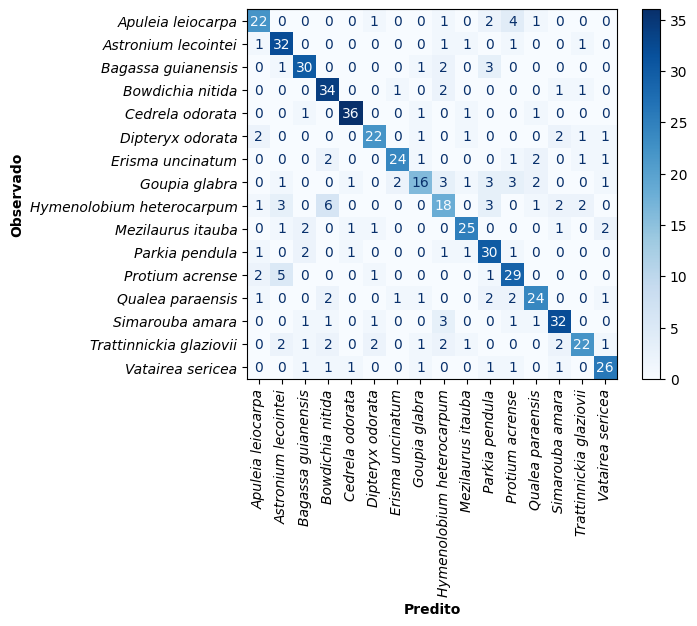

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================
cm_unri_ann = confusion_matrix(resultado_unri_ann['Classe_Observada'], resultado_unri_ann['Classe_Predita'])
disp_unri_ann = ConfusionMatrixDisplay(confusion_matrix = cm_unri_ann, display_labels = best_unri_ann.classes_)
disp_unri_ann.plot(cmap = 'Blues', xticks_rotation = 90)
disp_unri_ann.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_unri_ann.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_unri_ann.ax_.xaxis.set_tick_params(labelsize=10)
disp_unri_ann.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig(f'./Output_patches/CM/cm_unri_ann', dpi=800, bbox_inches='tight')
plt.show()

### **3.5 - Random Forest - RF**

#### **Modelo M1**: Usando features LBP Uniforme (P = 8, R = 1)

In [ ]:
# ================================================================================
# Definições do estimador RF
# ================================================================================
rs_u81_rf = pickle.load(open('./Output/Models_LBP/rs_u81_rf.pickle', "rb"))
best_u81_rf = rs_u81_rf.best_estimator_

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_u81, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes da divisão: {X_train_u81.shape}')
  print(f'Conjunto de validação antes da divisão: {X_train_u81.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_u81.iloc[train_index], X_train_u81.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1} >>>')

  # Ajuste do modelo para cada fold
  best_u81_rf.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_u81_rf.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_u81_rf.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')

  print('='*70)
  print(f'Listando métricas para o fold {i+1}>>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  print(f'Fold {i+1} finalizado!!!')
  print('*'*70)

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_u81_rf, 'best_u81_rf')
save_model_joblib(best_u81_rf, 'best_u81_rf')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_u81_rf = best_u81_rf.predict_proba(X_test_u81)
prob_u81_rf = pd.DataFrame(prob_u81_rf, columns = best_u81_rf.classes_)
class_value = prob_u81_rf.idxmax(axis=1)
prob_value = prob_u81_rf.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_u81_rf = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_u81_rf = pd.concat([y_test, prob_u81_rf], axis = 1)
prob_u81_rf

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_u81_rf = prob_u81_rf.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_u81_rf = soma_prob_u81_rf.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_u81_rf = prob_u81_rf.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_u81_rf = pd.DataFrame({'Id': class_u81_rf.index,
                          'Probabilidade': soma_prob_u81_rf.groupby('Id').max(),
                          'Classe_Predita': class_u81_rf.values,
                          'Classe_Observada': class_obs_u81_rf.values})

# Exibir o resultado
resultado_u81_rf = resultado_u81_rf[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_u81_rf['Classe_Predita'] = resultado_u81_rf['Classe_Predita'].apply(lambda x: x[1])
resultado_u81_rf

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste (n=566) - Voto Majoritário
# ================================================================================
print(classification_report(resultado_u81_rf['Classe_Observada'], resultado_u81_rf['Classe_Predita'], target_names= best_u81_rf.classes_))

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================
cm_u81_rf = confusion_matrix(resultado_u81_rf['Classe_Observada'], resultado_u81_rf['Classe_Predita'])
disp_u81_rf = ConfusionMatrixDisplay(confusion_matrix = cm_u81_rf, display_labels = best_u81_rf.classes_)
disp_u81_rf.plot(cmap = 'Blues', xticks_rotation = 90)
disp_u81_rf.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_u81_rf.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_u81_rf.ax_.xaxis.set_tick_params(labelsize=10)
disp_u81_rf.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/CM/cm_u81_rf', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M2**: Usando features LBP Uniforme (P = 16, R = 2)

In [ ]:
# ================================================================================
# Definições do estimador RF
# ================================================================================
rs_u162_rf = pickle.load(open('./Output/Models_LBP/rs_u162_rf.pickle', "rb"))
best_u162_rf = rs_u162_rf.best_estimator_

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_u162, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes da divisão: {X_train_u162.shape}')
  print(f'Conjunto de validação antes da divisão: {X_train_u162.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_u162.iloc[train_index], X_train_u162.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1} >>>')

  # Ajuste do modelo para cada fold
  best_u162_rf.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_u162_rf.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_u162_rf.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')

  print('='*70)
  print(f'Listando métricas para o fold {i+1}>>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  print(f'Fold {i+1} finalizado!!!')
  print('*'*70)

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_u162_rf, 'best_u162_rf')
save_model_joblib(best_u162_rf, 'best_u162_rf')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_u162_rf = best_u162_rf.predict_proba(X_test_u162)
prob_u162_rf = pd.DataFrame(prob_u162_rf, columns = best_u162_rf.classes_)
class_value = prob_u162_rf.idxmax(axis=1)
prob_value = prob_u162_rf.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_u162_rf = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_u162_rf = pd.concat([y_test, prob_u162_rf], axis = 1)
prob_u162_rf

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_u162_rf = prob_u162_rf.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_u162_rf = soma_prob_u162_rf.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_u162_rf = prob_u162_rf.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_u162_rf = pd.DataFrame({'Id': class_u162_rf.index,
                          'Probabilidade': soma_prob_u162_rf.groupby('Id').max(),
                          'Classe_Predita': class_u162_rf.values,
                          'Classe_Observada': class_obs_u162_rf.values})

# Exibir o resultado
resultado_u162_rf = resultado_u162_rf[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_u162_rf['Classe_Predita'] = resultado_u162_rf['Classe_Predita'].apply(lambda x: x[1])
resultado_u162_rf

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste (n=566) - Voto Majoritário
# ================================================================================
print(classification_report(resultado_u162_rf['Classe_Observada'], resultado_u162_rf['Classe_Predita'], target_names= best_u162_rf.classes_))

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================
cm_u162_rf = confusion_matrix(resultado_u162_rf['Classe_Observada'], resultado_u162_rf['Classe_Predita'])
disp_u162_rf = ConfusionMatrixDisplay(confusion_matrix = cm_u162_rf, display_labels = best_u162_rf.classes_)
disp_u162_rf.plot(cmap = 'Blues', xticks_rotation = 90)
disp_u162_rf.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_u162_rf.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_u162_rf.ax_.xaxis.set_tick_params(labelsize=10)
disp_u162_rf.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/CM/cm_u162_rf', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M3**: Usando features LBP Uniforme (P = 24, R = 3)

In [ ]:
# ================================================================================
# Definições do estimador RF
# ================================================================================
rs_u243_rf = pickle.load(open('./Output/Models_LBP/rs_u243_rf.pickle', "rb"))
best_u243_rf = rs_u243_rf.best_estimator_

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_u243, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes da divisão: {X_train_u243.shape}')
  print(f'Conjunto de validação antes da divisão: {X_train_u243.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_u243.iloc[train_index], X_train_u243.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1} >>>')

  # Ajuste do modelo para cada fold
  best_u243_rf.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_u243_rf.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_u243_rf.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')

  print('='*70)
  print(f'Listando métricas para o fold {i+1}>>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  print(f'Fold {i+1} finalizado!!!')
  print('*'*70)

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_u243_rf, 'best_u243_rf')
save_model_joblib(best_u243_rf, 'best_u243_rf')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_u243_rf = best_u243_rf.predict_proba(X_test_u243)
prob_u243_rf = pd.DataFrame(prob_u243_rf, columns = best_u243_rf.classes_)
class_value = prob_u243_rf.idxmax(axis=1)
prob_value = prob_u243_rf.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_u243_rf = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_u243_rf = pd.concat([y_test, prob_u243_rf], axis = 1)
prob_u243_rf

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_u243_rf = prob_u243_rf.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_u243_rf = soma_prob_u243_rf.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_u243_rf = prob_u243_rf.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_u243_rf = pd.DataFrame({'Id': class_u243_rf.index,
                          'Probabilidade': soma_prob_u243_rf.groupby('Id').max(),
                          'Classe_Predita': class_u243_rf.values,
                          'Classe_Observada': class_obs_u243_rf.values})

# Exibir o resultado
resultado_u243_rf = resultado_u243_rf[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_u243_rf['Classe_Predita'] = resultado_u243_rf['Classe_Predita'].apply(lambda x: x[1])
resultado_u243_rf

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste (n=566) - Voto Majoritário
# ================================================================================
print(classification_report(resultado_u243_rf['Classe_Observada'], resultado_u243_rf['Classe_Predita'], target_names= best_u243_rf.classes_))

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================
cm_u243_rf = confusion_matrix(resultado_u243_rf['Classe_Observada'], resultado_u243_rf['Classe_Predita'])
disp_u243_rf = ConfusionMatrixDisplay(confusion_matrix = cm_u243_rf, display_labels = best_u243_rf.classes_)
disp_u243_rf.plot(cmap = 'Blues', xticks_rotation = 90)
disp_u243_rf.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_u243_rf.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_u243_rf.ax_.xaxis.set_tick_params(labelsize=10)
disp_u243_rf.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/CM/cm_u243_rf', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M4**: Usando features LBP Uniforme (Todos)

In [ ]:
# ================================================================================
# Definições do estimador RF
# ================================================================================
rs_uni_rf = pickle.load(open('./Output/Models_LBP/rs_uni_rf.pickle', "rb"))
best_uni_rf = rs_uni_rf.best_estimator_

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_u, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes da divisão: {X_train_u.shape}')
  print(f'Conjunto de validação antes da divisão: {X_train_u.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_u.iloc[train_index], X_train_u.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1} >>>')

  # Ajuste do modelo para cada fold
  best_uni_rf.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_uni_rf.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_uni_rf.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')

  print('='*70)
  print(f'Listando métricas para o fold {i+1}>>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  print(f'Fold {i+1} finalizado!!!')
  print('*'*70)

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_uni_rf, 'best_uni_rf')
save_model_joblib(best_uni_rf, 'best_uni_rf')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_uni_rf = best_uni_rf.predict_proba(X_test_u)
prob_uni_rf = pd.DataFrame(prob_uni_rf, columns = best_uni_rf.classes_)
class_value = prob_uni_rf.idxmax(axis=1)
prob_value = prob_uni_rf.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_uni_rf = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_uni_rf = pd.concat([y_test, prob_uni_rf], axis = 1)
prob_uni_rf

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_uni_rf = prob_uni_rf.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_uni_rf = soma_prob_uni_rf.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_uni_rf = prob_uni_rf.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_uni_rf = pd.DataFrame({'Id': class_uni_rf.index,
                          'Probabilidade': soma_prob_uni_rf.groupby('Id').max(),
                          'Classe_Predita': class_uni_rf.values,
                          'Classe_Observada': class_obs_uni_rf.values})

# Exibir o resultado
resultado_uni_rf = resultado_uni_rf[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_uni_rf['Classe_Predita'] = resultado_uni_rf['Classe_Predita'].apply(lambda x: x[1])
resultado_uni_rf

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste (n=566) - Voto Majoritário
# ================================================================================
print(classification_report(resultado_uni_rf['Classe_Observada'], resultado_uni_rf['Classe_Predita'], target_names= best_uni_rf.classes_))

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================
cm_uni_rf = confusion_matrix(resultado_uni_rf['Classe_Observada'], resultado_uni_rf['Classe_Predita'])
disp_uni_rf = ConfusionMatrixDisplay(confusion_matrix = cm_uni_rf, display_labels = best_uni_rf.classes_)
disp_uni_rf.plot(cmap = 'Blues', xticks_rotation = 90)
disp_uni_rf.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_uni_rf.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_uni_rf.ax_.xaxis.set_tick_params(labelsize=10)
disp_uni_rf.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/CM/cm_uni_rf', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M5**: Usando features LBP Uniforme Não Invariante (P = 8, R = 1)

In [ ]:
# ================================================================================
# Definições do estimador RF
# ================================================================================
rs_nri81_rf = pickle.load(open('./Output/Models_LBP/rs_nri81_rf.pickle', "rb"))
best_nri81_rf = rs_nri81_rf.best_estimator_

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_nri81, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes da divisão: {X_train_nri81.shape}')
  print(f'Conjunto de validação antes da divisão: {X_train_nri81.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_nri81.iloc[train_index], X_train_nri81.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1} >>>')

  # Ajuste do modelo para cada fold
  best_nri81_rf.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_nri81_rf.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_nri81_rf.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')

  print('='*70)
  print(f'Listando métricas para o fold {i+1}>>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  print(f'Fold {i+1} finalizado!!!')
  print('*'*70)

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_nri81_rf, 'best_nri81_rf')
save_model_joblib(best_nri81_rf, 'best_nri81_rf')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_nri81_rf = best_nri81_rf.predict_proba(X_test_nri81)
prob_nri81_rf = pd.DataFrame(prob_uni_rf, columns = best_nri81_rf.classes_)
class_value = prob_nri81_rf.idxmax(axis=1)
prob_value = prob_nri81_rf.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_nri81_rf = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_nri81_rf = pd.concat([y_test, prob_nri81_rf], axis = 1)
prob_nri81_rf

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_nri81_rf = prob_nri81_rf.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_nri81_rf = soma_prob_nri81_rf.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_nri81_rf= prob_nri81_rf.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_nri81_rf = pd.DataFrame({'Id': class_nri81_rf.index,
                          'Probabilidade': soma_prob_nri81_rf.groupby('Id').max(),
                          'Classe_Predita': class_nri81_rf.values,
                          'Classe_Observada': class_obs_nri81_rf.values})

# Exibir o resultado
resultado_nri81_rf = resultado_nri81_rf[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_nri81_rf['Classe_Predita'] = resultado_nri81_rf['Classe_Predita'].apply(lambda x: x[1])
resultado_nri81_rf

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste (n=566) - Voto Majoritário
# ================================================================================
print(classification_report(resultado_nri81_rf['Classe_Observada'], resultado_nri81_rf['Classe_Predita'], target_names= best_nri81_rf.classes_))

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================
cm_nri81_rf = confusion_matrix(resultado_nri81_rf['Classe_Observada'], resultado_nri81_rf['Classe_Predita'])
disp_nri81_rf = ConfusionMatrixDisplay(confusion_matrix = cm_nri81_rf, display_labels = best_nri81_rf.classes_)
disp_nri81_rf.plot(cmap = 'Blues', xticks_rotation = 90)
disp_nri81_rf.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_nri81_rf.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_nri81_rf.ax_.xaxis.set_tick_params(labelsize=10)
disp_nri81_rf.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/CM/cm_nri81_rf', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M6**: Usando features LBP Uniforme Não Invariante (P = 16, R = 2)

In [ ]:
# ================================================================================
# Definições do estimador RF
# ================================================================================
rs_nri162_rf = pickle.load(open('./Output/Models_LBP/rs_nri162_rf.pickle', "rb"))
best_nri162_rf = rs_nri162_rf.best_estimator_

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_nri162, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes da divisão: {X_train_nri162.shape}')
  print(f'Conjunto de validação antes da divisão: {X_train_nri162.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_nri162.iloc[train_index], X_train_nri162.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1} >>>')

  # Ajuste do modelo para cada fold
  best_nri162_rf.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_nri162_rf.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_nri162_rf.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')

  print('='*70)
  print(f'Listando métricas para o fold {i+1}>>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  print(f'Fold {i+1} finalizado!!!')
  print('*'*70)

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_nri162_rf, 'best_nri162_rf')
save_model_joblib(best_nri162_rf, 'best_nri162_rf')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_nri162_rf = best_nri162_rf.predict_proba(X_test_nri162)
prob_nri162_rf = pd.DataFrame(prob_nri162_rf, columns = best_nri162_rf.classes_)
class_value = prob_nri162_rf.idxmax(axis=1)
prob_value = prob_nri162_rf.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_nri162_rf = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_nri162_rf = pd.concat([y_test, prob_nri162_rf], axis = 1)
prob_nri162_rf

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_nri162_rf = prob_nri162_rf.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_nri162_rf = soma_prob_nri162_rf.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_nri162_rf= prob_nri162_rf.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_nri162_rf = pd.DataFrame({'Id': class_nri162_rf.index,
                          'Probabilidade': soma_prob_nri162_rf.groupby('Id').max(),
                          'Classe_Predita': class_nri162_rf.values,
                          'Classe_Observada': class_obs_nri162_rf.values})

# Exibir o resultado
resultado_nri162_rf = resultado_nri162_rf[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_nri162_rf['Classe_Predita'] = resultado_nri162_rf['Classe_Predita'].apply(lambda x: x[1])
resultado_nri162_rf

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste (n=566) - Voto Majoritário
# ================================================================================
print(classification_report(resultado_nri162_rf['Classe_Observada'], resultado_nri162_rf['Classe_Predita'], target_names= best_nri162_rf.classes_))

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================
cm_nri162_rf = confusion_matrix(resultado_nri162_rf['Classe_Observada'], resultado_nri162_rf['Classe_Predita'])
disp_nri162_rf = ConfusionMatrixDisplay(confusion_matrix = cm_nri162_rf, display_labels = best_nri162_rf.classes_)
disp_nri162_rf.plot(cmap = 'Blues', xticks_rotation = 90)
disp_nri162_rf.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_nri162_rf.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_nri162_rf.ax_.xaxis.set_tick_params(labelsize=10)
disp_nri162_rf.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/CM/cm_nri162_rf', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M7**: Usando features LBP Uniforme Não Invariante (P = 24, R = 3)

In [ ]:
# ================================================================================
# Definições do estimador RF
# ================================================================================
rs_nri243_rf = pickle.load(open('./Output/Models_LBP/rs_nri243_rf.pickle', "rb"))
best_nri243_rf = rs_nri243_rf.best_estimator_

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_nri243, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes da divisão: {X_train_nri243.shape}')
  print(f'Conjunto de validação antes da divisão: {X_train_nri243.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_nri243.iloc[train_index], X_train_nri243.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1} >>>')

  # Ajuste do modelo para cada fold
  best_nri243_rf.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_nri243_rf.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_nri243_rf.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')

  print('='*70)
  print(f'Listando métricas para o fold {i+1}>>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  print(f'Fold {i+1} finalizado!!!')
  print('*'*70)

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_nri243_rf, 'best_nri243_rf')
save_model_joblib(best_nri243_rf, 'best_nri243_rf')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_nri243_rf = best_nri243_rf.predict_proba(X_test_nri243)
prob_nri243_rf = pd.DataFrame(prob_nri243_rf, columns = best_nri243_rf.classes_)
class_value = prob_nri243_rf.idxmax(axis=1)
prob_value = prob_nri243_rf.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_nri243_rf = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_nri243_rf = pd.concat([y_test, prob_nri243_rf], axis = 1)
prob_nri243_rf

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_nri243_rf = prob_nri243_rf.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_nri243_rf = soma_prob_nri243_rf.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_nri243_rf= prob_nri243_rf.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_nri243_rf = pd.DataFrame({'Id': class_nri243_rf.index,
                          'Probabilidade': soma_prob_nri243_rf.groupby('Id').max(),
                          'Classe_Predita': class_nri243_rf.values,
                          'Classe_Observada': class_obs_nri243_rf.values})

# Exibir o resultado
resultado_nri243_rf = resultado_nri243_rf[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_nri243_rf['Classe_Predita'] = resultado_nri243_rf['Classe_Predita'].apply(lambda x: x[1])
resultado_nri243_rf

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste (n=566) - Voto Majoritário
# ================================================================================
print(classification_report(resultado_nri243_rf['Classe_Observada'], resultado_nri243_rf['Classe_Predita'], target_names= best_nri243_rf.classes_))

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================
cm_nri243_rf = confusion_matrix(resultado_nri243_rf['Classe_Observada'], resultado_nri243_rf['Classe_Predita'])
disp_nri243_rf = ConfusionMatrixDisplay(confusion_matrix = cm_nri243_rf, display_labels = best_nri243_rf.classes_)
disp_nri243_rf.plot(cmap = 'Blues', xticks_rotation = 90)
disp_nri243_rf.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_nri243_rf.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_nri243_rf.ax_.xaxis.set_tick_params(labelsize=10)
disp_nri243_rf.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/CM/cm_nri243_rf', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M8**: Usando features LBP Uniforme Não Invariante (Todos)

In [ ]:
# ================================================================================
# Definições do estimador RF
# ================================================================================

rs_nri_rf = pickle.load(open('./Output/Models_LBP/rs_nri_rf.pickle', "rb"))
best_nri_rf = rs_nri_rf.best_estimator_
model_name = 'best_nri_rf'

In [ ]:

accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_nri, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes divisão: {X_train_nri.shape}')
  print(f'Conjunto de validação antes divisão: {X_train_nri.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_nri.iloc[train_index], X_train_nri.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1}>>>')

  # Ajuste do modelo para cada fold
  best_nri_rf.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_nri_rf.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_nri_rf.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')
  cm = confusion_matrix(fold_obs, fold_predictions)

  print('='*70)
  print(f'Listando métricas para o fold {i+1} >>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  # Plotar matriz de confusão utilizando ConfusionMatrixDisplay
  disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=best_nri_rf.classes_)
  disp.plot(cmap = 'Blues', xticks_rotation = 90, colorbar = False)   # Greys, Purples, Blues, Greens, BuGn, GnBu
  disp.ax_.set_title(f'CM-fold {i+1}\n (Accuracy: {accuracy_fold:.4f}, Precision: {precision_fold:.4f}, Recall: {recall_fold:.4f}, F1-score: {f1_fold:.4f})',
                      fontsize=10)
  disp.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
  disp.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
  plt.yticks(style='italic')
  plt.xticks(style='italic')
  disp.ax_.xaxis.set_tick_params(labelsize=10)
  disp.ax_.yaxis.set_tick_params(labelsize=10)
  plt.show()

  # Salvando matriz de confusão
  print(f'Salvando matriz de confusão para o folder {i+1}...')
  plt.savefig(f'./Output_patches/CM/{i+1}_{model_name}', dpi=800, bbox_inches='tight')
  print(f'Matriz de confusão para o folder {i+1} salva com sucesso!')
  plt.show()

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_nri_rf, 'best_nri_rf')
save_model_joblib(best_nri_rf, 'best_nri_rf')

print('MODELO SALVO!')


In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_nri_rf = best_nri_rf.predict_proba(X_test_nri)
prob_nri_rf = pd.DataFrame(prob_nri_rf, columns = best_nri_rf.classes_)
class_value = prob_nri_rf.idxmax(axis=1)
prob_value = prob_nri_rf.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_nri_rf = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_nri_rf = pd.concat([y_test, prob_nri_rf], axis = 1)
prob_nri_rf

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_nri_rf = prob_nri_rf.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_nri_rf = soma_prob_nri_rf.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_nri_rf= prob_nri_rf.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_nri_rf = pd.DataFrame({'Id': class_nri_rf.index,
                          'Probabilidade': soma_prob_nri_rf.groupby('Id').max(),
                          'Classe_Predita': class_nri_rf.values,
                          'Classe_Observada': class_obs_nri_rf.values})

# Exibir o resultado
resultado_nri_rf = resultado_nri_rf[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_nri_rf['Classe_Predita'] = resultado_nri_rf['Classe_Predita'].apply(lambda x: x[1])
resultado_nri_rf

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste (n=566) - Voto Majoritário
# ================================================================================
print(classification_report(resultado_nri_rf['Classe_Observada'], resultado_nri_rf['Classe_Predita'], target_names= best_nri_rf.classes_))

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================
cm_nri_rf = confusion_matrix(resultado_nri_rf['Classe_Observada'], resultado_nri_rf['Classe_Predita'])
disp_nri_rf = ConfusionMatrixDisplay(confusion_matrix = cm_nri_rf, display_labels = best_nri_rf.classes_)
disp_nri_rf.plot(cmap = 'Blues', xticks_rotation = 90)
disp_nri_rf.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_nri_rf.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_nri_rf.ax_.xaxis.set_tick_params(labelsize=10)
disp_nri_rf.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/CM/cm_nri_rf', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M9**: Usando features LBP (Todos)

In [ ]:
# ================================================================================
# Definições do estimador RF
# ================================================================================

rs_unri_rf = pickle.load(open('./Output/Models_LBP/rs_unri_rf.pickle', "rb"))
best_unri_rf = rs_unri_rf.best_estimator_
model_name = 'best_unri_rf'

In [ ]:

accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_unri, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes divisão: {X_train_unri.shape}')
  print(f'Conjunto de validação antes divisão: {X_train_unri.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_unri.iloc[train_index], X_train_unri.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1}>>>')

  # Ajuste do modelo para cada fold
  best_unri_rf.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_unri_rf.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_unri_rf.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')
  cm = confusion_matrix(fold_obs, fold_predictions)

  print('='*70)
  print(f'Listando métricas para o fold {i+1} >>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  # Plotar matriz de confusão utilizando ConfusionMatrixDisplay
  disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=best_unri_rf.classes_)
  disp.plot(cmap = 'Blues', xticks_rotation = 90, colorbar = False)   # Greys, Purples, Blues, Greens, BuGn, GnBu
  disp.ax_.set_title(f'CM-fold {i+1}\n (Accuracy: {accuracy_fold:.4f}, Precision: {precision_fold:.4f}, Recall: {recall_fold:.4f}, F1-score: {f1_fold:.4f})',
                      fontsize=10)
  disp.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
  disp.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
  plt.yticks(style='italic')
  plt.xticks(style='italic')
  disp.ax_.xaxis.set_tick_params(labelsize=10)
  disp.ax_.yaxis.set_tick_params(labelsize=10)
  plt.show()

  # Salvando matriz de confusão
  print(f'Salvando matriz de confusão para o folder {i+1}...')
  plt.savefig(f'./Output_patches/CM/{i+1}_{model_name}', dpi=800, bbox_inches='tight')
  print(f'Matriz de confusão para o folder {i+1} salva com sucesso!')
  plt.show()

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_unri_rf, 'best_unri_rf')
save_model_joblib(best_unri_rf, 'best_unri_rf')

print('MODELO SALVO!')


In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_unri_rf = best_unri_rf.predict_proba(X_test_unri)
prob_unri_rf = pd.DataFrame(prob_unri_rf, columns = best_unri_rf.classes_)
class_value = prob_unri_rf.idxmax(axis=1)
prob_value = prob_unri_rf.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_unri_rf = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_unri_rf = pd.concat([y_test, prob_unri_rf], axis = 1)
prob_unri_rf

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_unri_rf = prob_unri_rf.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_unri_rf = soma_prob_unri_rf.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_unri_rf= prob_unri_rf.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_unri_rf = pd.DataFrame({'Id': class_unri_rf.index,
                          'Probabilidade': soma_prob_unri_rf.groupby('Id').max(),
                          'Classe_Predita': class_unri_rf.values,
                          'Classe_Observada': class_obs_unri_rf.values})

# Exibir o resultado
resultado_unri_rf = resultado_unri_rf[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_unri_rf['Classe_Predita'] = resultado_unri_rf['Classe_Predita'].apply(lambda x: x[1])
resultado_unri_rf

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste (n=566) - Voto Majoritário
# ================================================================================
print(classification_report(resultado_unri_rf['Classe_Observada'], resultado_unri_rf['Classe_Predita'], target_names= best_unri_rf.classes_))

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================
cm_unri_rf = confusion_matrix(resultado_unri_rf['Classe_Observada'], resultado_unri_rf['Classe_Predita'])
disp_unri_rf = ConfusionMatrixDisplay(confusion_matrix = cm_unri_rf, display_labels = best_unri_rf.classes_)
disp_unri_rf.plot(cmap = 'Blues', xticks_rotation = 90)
disp_unri_rf.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_unri_rf.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_unri_rf.ax_.xaxis.set_tick_params(labelsize=10)
disp_unri_rf.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/CM/cm_unri_rf', dpi=800, bbox_inches='tight')
plt.show()

### **3.6 - Linear Discriminat Analisys - LDA**

#### **Modelo M1**: Usando features LBP Uniforme (P = 8, R = 1)

In [ ]:
# ================================================================================
# Definições do estimador LDA
# ================================================================================
rs_u81_lda = pickle.load(open('./Output/LBP/Models/LDA/rs_u81_lda.pickle', "rb"))
best_u81_lda = rs_u81_lda.best_estimator_

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_u81, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes da divisão: {X_train_u81.shape}')
  print(f'Conjunto de validação antes da divisão: {X_train_u81.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_u81.iloc[train_index], X_train_u81.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1} >>>')

  # Ajuste do modelo para cada fold
  best_u81_lda.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_u81_lda.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_u81_lda.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')

  print('='*70)
  print(f'Listando métricas para o fold {i+1}>>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  print(f'Fold {i+1} finalizado!!!')
  print('*'*70)

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_u81_lda, 'best_u81_lda')
save_model_joblib(best_u81_lda, 'best_u81_lda')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

Métricas por fold:
Fold 1: Accuracy=0.3259, F1=0.3068, Recall=0.3259, Precision=0.3174
Fold 2: Accuracy=0.2812, F1=0.2595, Recall=0.2812, Precision=0.2576
Fold 3: Accuracy=0.3304, F1=0.3166, Recall=0.3304, Precision=0.3510
Fold 4: Accuracy=0.3036, F1=0.2879, Recall=0.3036, Precision=0.3381
Fold 5: Accuracy=0.3036, F1=0.2910, Recall=0.3036, Precision=0.2994
Fold 6: Accuracy=0.3363, F1=0.3091, Recall=0.3363, Precision=0.3662
Fold 7: Accuracy=0.3036, F1=0.2897, Recall=0.3036, Precision=0.2990
Fold 8: Accuracy=0.3408, F1=0.3171, Recall=0.3408, Precision=0.3222
Fold 9: Accuracy=0.2634, F1=0.2487, Recall=0.2634, Precision=0.2490
Fold 10: Accuracy=0.3229, F1=0.3011, Recall=0.3229, Precision=0.2968
Mean -- Standard Deviation -- Minimum Value -- Maximum Value
Accuracy -> mean: 0.3112, std: 0.0236, min: 0.2634, max: 0.3408
F1 Score -> mean: 0.2927, std: 0.0219, min: 0.2487, max: 0.3171
Recall -> mean: 0.3112, std: 0.0236, min: 0.2634, max: 0.3408
Precision -> mean: 0.3097, std: 0.0357, min: 0.26

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_u81_lda = best_u81_lda.predict_proba(X_test_u81)
prob_u81_lda = pd.DataFrame(prob_u81_lda, columns = best_u81_lda.classes_)
class_value = prob_u81_lda.idxmax(axis=1)
prob_value = prob_u81_lda.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_u81_lda = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_u81_lda = pd.concat([y_test, prob_u81_lda], axis = 1)
prob_u81_lda

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_u81_lda = prob_u81_lda.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_u81_lda = soma_prob_u81_lda.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_u81_lda = prob_u81_lda.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_u81_lda = pd.DataFrame({'Id': class_u81_lda.index,
                          'Probabilidade': soma_prob_u81_lda.groupby('Id').max(),
                          'Classe_Predita': class_u81_lda.values,
                          'Classe_Observada': class_obs_u81_lda.values})

# Exibir o resultado
resultado_u81_lda = resultado_u81_lda[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_u81_lda['Classe_Predita'] = resultado_u81_lda['Classe_Predita'].apply(lambda x: x[1])
resultado_u81_lda

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste (n=566) - Voto Majoritário
# ================================================================================
print(classification_report(resultado_u81_lda['Classe_Observada'], resultado_u81_lda['Classe_Predita'], target_names= best_u81_lda.classes_))

                           precision    recall  f1-score   support

        Apuleia leiocarpa       0.37      0.65      0.47        31
      Astronium lecointei       0.21      0.14      0.16        37
       Bagassa guianensis       0.42      0.27      0.33        37
         Bowdichia nitida       0.21      0.46      0.29        39
          Cedrela odorata       0.38      0.55      0.45        40
         Dipteryx odorata       0.50      0.07      0.12        30
         Erisma uncinatum       0.31      0.16      0.21        32
            Goupia glabra       0.19      0.21      0.20        33
Hymenolobium heterocarpum       0.38      0.28      0.32        36
        Mezilaurus itauba       0.25      0.27      0.26        33
           Parkia pendula       0.22      0.11      0.15        37
          Protium acrense       0.23      0.26      0.25        38
         Qualea paraensis       0.44      0.44      0.44        34
          Simarouba amara       0.45      0.42      0.44     

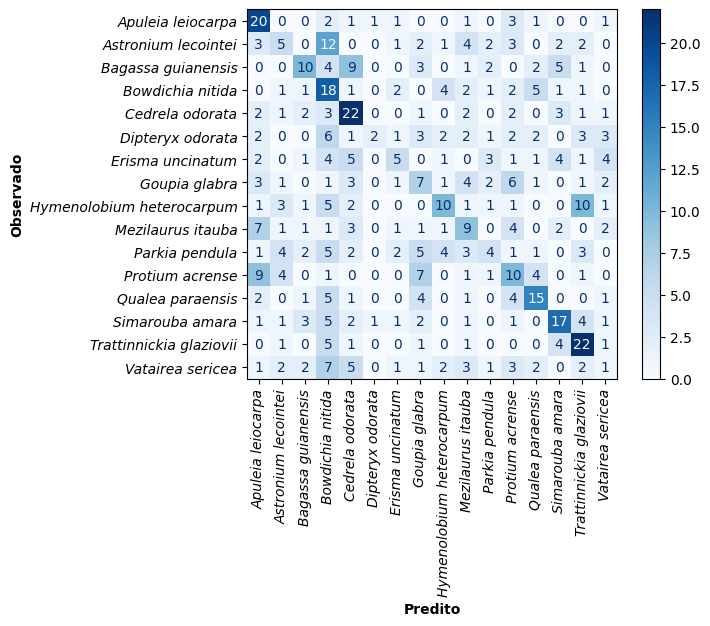

<Figure size 640x480 with 0 Axes>

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================
cm_u81_lda = confusion_matrix(resultado_u81_lda['Classe_Observada'], resultado_u81_lda['Classe_Predita'])
disp_u81_lda = ConfusionMatrixDisplay(confusion_matrix = cm_u81_lda, display_labels = best_u81_lda.classes_)
disp_u81_lda.plot(cmap = 'Blues', xticks_rotation = 90)
disp_u81_lda.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_u81_lda.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_u81_lda.ax_.xaxis.set_tick_params(labelsize=10)
disp_u81_lda.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')
plt.show()

plt.savefig('./Output_patches/LBP/CM/cm_u81_lda', dpi=800, bbox_inches='tight')

#### **Modelo M2**: Usando features LBP Uniforme (P = 16, R = 2)

In [ ]:
# ================================================================================
# Definições do estimador LDA
# ================================================================================
rs_u162_lda = pickle.load(open('./Output/LBP/Models/LDA/rs_u162_lda.pickle', "rb"))
best_u162_lda = rs_u162_lda.best_estimator_

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_u162, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes da divisão: {X_train_u162.shape}')
  print(f'Conjunto de validação antes da divisão: {X_train_u162.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_u162.iloc[train_index], X_train_u162.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1} >>>')

  # Ajuste do modelo para cada fold
  best_u162_lda.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_u162_lda.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_u162_lda.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')

  print('='*70)
  print(f'Listando métricas para o fold {i+1}>>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  print(f'Fold {i+1} finalizado!!!')
  print('*'*70)

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_u162_lda, 'best_u162_lda')
save_model_joblib(best_u162_lda, 'best_u162_lda')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

Métricas por fold:
Fold 1: Accuracy=0.3348, F1=0.3158, Recall=0.3348, Precision=0.3282
Fold 2: Accuracy=0.3705, F1=0.3537, Recall=0.3705, Precision=0.3621
Fold 3: Accuracy=0.3661, F1=0.3387, Recall=0.3661, Precision=0.3408
Fold 4: Accuracy=0.3036, F1=0.2784, Recall=0.3036, Precision=0.2875
Fold 5: Accuracy=0.3348, F1=0.3227, Recall=0.3348, Precision=0.3339
Fold 6: Accuracy=0.2960, F1=0.2785, Recall=0.2960, Precision=0.2786
Fold 7: Accuracy=0.3482, F1=0.3362, Recall=0.3482, Precision=0.3456
Fold 8: Accuracy=0.4484, F1=0.4280, Recall=0.4484, Precision=0.4698
Fold 9: Accuracy=0.3616, F1=0.3510, Recall=0.3616, Precision=0.3755
Fold 10: Accuracy=0.3543, F1=0.3258, Recall=0.3543, Precision=0.3182
Mean -- Standard Deviation -- Minimum Value -- Maximum Value
Accuracy -> mean: 0.3518, std: 0.0400, min: 0.2960, max: 0.4484
F1 Score -> mean: 0.3329, std: 0.0403, min: 0.2784, max: 0.4280
Recall -> mean: 0.3518, std: 0.0400, min: 0.2960, max: 0.4484
Precision -> mean: 0.3440, std: 0.0507, min: 0.29

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_u162_lda = best_u162_lda.predict_proba(X_test_u162)
prob_u162_lda = pd.DataFrame(prob_u162_lda, columns = best_u162_lda.classes_)
class_value = prob_u162_lda.idxmax(axis=1)
prob_value = prob_u162_lda.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_u162_lda = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_u162_lda = pd.concat([y_test, prob_u162_lda], axis = 1)
prob_u162_lda

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_u162_lda = prob_u162_lda.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_u162_lda = soma_prob_u162_lda.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_u162_lda = prob_u162_lda.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_u162_lda = pd.DataFrame({'Id': class_u162_lda.index,
                          'Probabilidade': soma_prob_u162_lda.groupby('Id').max(),
                          'Classe_Predita': class_u162_lda.values,
                          'Classe_Observada': class_obs_u162_lda.values})

# Exibir o resultado
resultado_u162_lda = resultado_u162_lda[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_u162_lda['Classe_Predita'] = resultado_u162_lda['Classe_Predita'].apply(lambda x: x[1])
resultado_u162_lda

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste (n=566) - Voto Majoritário
# ================================================================================
print(classification_report(resultado_u162_lda['Classe_Observada'], resultado_u162_lda['Classe_Predita'], target_names= best_u162_lda.classes_))

                           precision    recall  f1-score   support

        Apuleia leiocarpa       0.38      0.29      0.33        31
      Astronium lecointei       0.25      0.14      0.18        37
       Bagassa guianensis       0.45      0.38      0.41        37
         Bowdichia nitida       0.28      0.56      0.37        39
          Cedrela odorata       0.44      0.53      0.48        40
         Dipteryx odorata       0.43      0.10      0.16        30
         Erisma uncinatum       0.38      0.16      0.22        32
            Goupia glabra       0.24      0.18      0.21        33
Hymenolobium heterocarpum       0.41      0.31      0.35        36
        Mezilaurus itauba       0.30      0.42      0.35        33
           Parkia pendula       0.44      0.41      0.42        37
          Protium acrense       0.37      0.84      0.52        38
         Qualea paraensis       0.35      0.18      0.24        34
          Simarouba amara       0.38      0.38      0.38     

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================
cm_u162_lda = confusion_matrix(resultado_u162_lda['Classe_Observada'], resultado_u162_lda['Classe_Predita'])
disp_u162_lda = ConfusionMatrixDisplay(confusion_matrix = cm_u162_lda, display_labels = best_u162_lda.classes_)
disp_u162_lda.plot(cmap = 'Blues', xticks_rotation = 90)
disp_u162_lda.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_u162_lda.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_u162_lda.ax_.xaxis.set_tick_params(labelsize=10)
disp_u162_lda.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/LBP/CM/cm_u162_lda', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M3**: Usando features LBP Uniforme (P = 24, R = 3)

In [ ]:
# ================================================================================
# Definições do estimador LDA
# ================================================================================
rs_u243_lda = pickle.load(open('./Output/LBP/Models/LDA/rs_u243_lda.pickle', "rb"))
best_u243_lda = rs_u243_lda.best_estimator_

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_u243, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes da divisão: {X_train_u243.shape}')
  print(f'Conjunto de validação antes da divisão: {X_train_u243.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_u243.iloc[train_index], X_train_u243.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1} >>>')

  # Ajuste do modelo para cada fold
  best_u243_lda.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_u243_lda.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_u243_lda.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')

  print('='*70)
  print(f'Listando métricas para o fold {i+1}>>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  print(f'Fold {i+1} finalizado!!!')
  print('*'*70)

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_u243_lda, 'best_u243_lda')
save_model_joblib(best_u243_lda, 'best_u243_lda')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

Métricas por fold:
Fold 1: Accuracy=0.3929, F1=0.3839, Recall=0.3929, Precision=0.4032
Fold 2: Accuracy=0.3661, F1=0.3495, Recall=0.3661, Precision=0.3649
Fold 3: Accuracy=0.4018, F1=0.3899, Recall=0.4018, Precision=0.4092
Fold 4: Accuracy=0.3750, F1=0.3491, Recall=0.3750, Precision=0.3586
Fold 5: Accuracy=0.3348, F1=0.3210, Recall=0.3348, Precision=0.3342
Fold 6: Accuracy=0.3857, F1=0.3824, Recall=0.3857, Precision=0.4060
Fold 7: Accuracy=0.3839, F1=0.3574, Recall=0.3839, Precision=0.3620
Fold 8: Accuracy=0.4529, F1=0.4314, Recall=0.4529, Precision=0.4664
Fold 9: Accuracy=0.3661, F1=0.3596, Recall=0.3661, Precision=0.3754
Fold 10: Accuracy=0.4215, F1=0.4071, Recall=0.4215, Precision=0.4263
Mean -- Standard Deviation -- Minimum Value -- Maximum Value
Accuracy -> mean: 0.3881, std: 0.0309, min: 0.3348, max: 0.4529
F1 Score -> mean: 0.3731, std: 0.0305, min: 0.3210, max: 0.4314
Recall -> mean: 0.3881, std: 0.0309, min: 0.3348, max: 0.4529
Precision -> mean: 0.3906, std: 0.0370, min: 0.33

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_u243_lda = best_u243_lda.predict_proba(X_test_u243)
prob_u243_lda = pd.DataFrame(prob_u243_lda, columns = best_u243_lda.classes_)
class_value = prob_u243_lda.idxmax(axis=1)
prob_value = prob_u243_lda.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_u243_lda = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_u243_lda = pd.concat([y_test, prob_u243_lda], axis = 1)
prob_u243_lda

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n = 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_u243_lda = prob_u243_lda.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_u243_lda = soma_prob_u243_lda.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_u243_lda = prob_u243_lda.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_u243_lda = pd.DataFrame({'Id': class_u243_lda.index,
                          'Probabilidade': soma_prob_u243_lda.groupby('Id').max(),
                          'Classe_Predita': class_u243_lda.values,
                          'Classe_Observada': class_obs_u243_lda.values})

# Exibir o resultado
resultado_u243_lda = resultado_u243_lda[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_u243_lda['Classe_Predita'] = resultado_u243_lda['Classe_Predita'].apply(lambda x: x[1])
resultado_u243_lda

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste (n = 566) - Voto Majoritário
# ================================================================================
print(classification_report(resultado_u243_lda['Classe_Observada'], resultado_u243_lda['Classe_Predita'], target_names= best_u243_lda.classes_))

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================
cm_u243_lda = confusion_matrix(resultado_u243_lda['Classe_Observada'], resultado_u243_lda['Classe_Predita'])
disp_u243_lda = ConfusionMatrixDisplay(confusion_matrix = cm_u243_lda, display_labels = best_u243_lda.classes_)
disp_u243_lda.plot(cmap = 'Blues', xticks_rotation = 90)
disp_u243_lda.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_u243_lda.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_u243_lda.ax_.xaxis.set_tick_params(labelsize=10)
disp_u243_lda.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/LBP/CM/cm_u243_lda', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M4**: Usando features LBP Uniforme (Todos)

In [ ]:
# ================================================================================
# Definições do estimador LDA
# ================================================================================
rs_uni_lda = pickle.load(open('./Output/LBP/Models/LDA/rs_uni_lda.pickle', "rb"))
best_uni_lda = rs_uni_lda.best_estimator_

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_u, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes da divisão: {X_train_u.shape}')
  print(f'Conjunto de validação antes da divisão: {X_train_u.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_u.iloc[train_index], X_train_u.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1} >>>')

  # Ajuste do modelo para cada fold
  best_uni_lda.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_uni_lda.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_uni_lda.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')

  print('='*70)
  print(f'Listando métricas para o fold {i+1}>>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  print(f'Fold {i+1} finalizado!!!')
  print('*'*70)

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_uni_lda, 'best_uni_lda')
save_model_joblib(best_uni_lda, 'best_uni_lda')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

Métricas por fold:
Fold 1: Accuracy=0.5580, F1=0.5564, Recall=0.5580, Precision=0.5871
Fold 2: Accuracy=0.5580, F1=0.5546, Recall=0.5580, Precision=0.5759
Fold 3: Accuracy=0.5536, F1=0.5482, Recall=0.5536, Precision=0.5665
Fold 4: Accuracy=0.5223, F1=0.5178, Recall=0.5223, Precision=0.5311
Fold 5: Accuracy=0.5402, F1=0.5272, Recall=0.5402, Precision=0.5293
Fold 6: Accuracy=0.5381, F1=0.5310, Recall=0.5381, Precision=0.5527
Fold 7: Accuracy=0.5491, F1=0.5430, Recall=0.5491, Precision=0.5506
Fold 8: Accuracy=0.6413, F1=0.6386, Recall=0.6413, Precision=0.6573
Fold 9: Accuracy=0.5357, F1=0.5356, Recall=0.5357, Precision=0.5498
Fold 10: Accuracy=0.5471, F1=0.5414, Recall=0.5471, Precision=0.5496
Mean -- Standard Deviation -- Minimum Value -- Maximum Value
Accuracy -> mean: 0.5543, std: 0.0308, min: 0.5223, max: 0.6413
F1 Score -> mean: 0.5494, std: 0.0319, min: 0.5178, max: 0.6386
Recall -> mean: 0.5543, std: 0.0308, min: 0.5223, max: 0.6413
Precision -> mean: 0.5650, std: 0.0352, min: 0.52

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_uni_lda = best_uni_lda.predict_proba(X_test_u)
prob_uni_lda = pd.DataFrame(prob_uni_lda, columns = best_uni_lda.classes_)
class_value = prob_uni_lda.idxmax(axis=1)
prob_value = prob_uni_lda.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_uni_lda = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_uni_lda = pd.concat([y_test, prob_uni_lda], axis = 1)
prob_uni_lda

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_uni_lda = prob_uni_lda.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_uni_lda = soma_prob_uni_lda.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_uni_lda = prob_uni_lda.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_uni_lda = pd.DataFrame({'Id': class_uni_lda.index,
                          'Probabilidade': soma_prob_uni_lda.groupby('Id').max(),
                          'Classe_Predita': class_uni_lda.values,
                          'Classe_Observada': class_obs_uni_lda.values})

# Exibir o resultado
resultado_uni_lda = resultado_uni_lda[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_uni_lda['Classe_Predita'] = resultado_uni_lda['Classe_Predita'].apply(lambda x: x[1])
resultado_uni_lda

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste (n=566) - Voto Majoritário
# ================================================================================
print(classification_report(resultado_uni_lda['Classe_Observada'], resultado_uni_lda['Classe_Predita'], target_names= best_uni_lda.classes_))

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================
cm_uni_lda = confusion_matrix(resultado_uni_lda['Classe_Observada'], resultado_uni_lda['Classe_Predita'])
disp_uni_lda = ConfusionMatrixDisplay(confusion_matrix = cm_uni_lda, display_labels = best_uni_lda.classes_)
disp_uni_lda.plot(cmap = 'Blues', xticks_rotation = 90)
disp_uni_lda.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_uni_lda.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_uni_lda.ax_.xaxis.set_tick_params(labelsize=10)
disp_uni_lda.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/LBP/CM/cm_uni_lda', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M5**: Usando features LBP Uniforme Não Invariante (P = 8, R = 1)

In [ ]:
# ================================================================================
# Definições do estimador LDA
# ================================================================================
rs_nri81_lda = pickle.load(open('./Output/LBP/Models/LDA/rs_nri81_lda.pickle', "rb"))
best_nri81_lda = rs_nri81_lda.best_estimator_

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_nri81, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes da divisão: {X_train_nri81.shape}')
  print(f'Conjunto de validação antes da divisão: {X_train_nri81.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_nri81.iloc[train_index], X_train_nri81.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1} >>>')

  # Ajuste do modelo para cada fold
  best_nri81_lda.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_nri81_lda.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_nri81_lda.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')

  print('='*70)
  print(f'Listando métricas para o fold {i+1}>>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  print(f'Fold {i+1} finalizado!!!')
  print('*'*70)

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_nri81_lda, 'best_nri81_lda')
save_model_joblib(best_nri81_lda, 'best_nri81_lda')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

Métricas por fold:
Fold 1: Accuracy=0.5491, F1=0.5353, Recall=0.5491, Precision=0.5714
Fold 2: Accuracy=0.5625, F1=0.5475, Recall=0.5625, Precision=0.5484
Fold 3: Accuracy=0.5804, F1=0.5710, Recall=0.5804, Precision=0.5889
Fold 4: Accuracy=0.4911, F1=0.4767, Recall=0.4911, Precision=0.5133
Fold 5: Accuracy=0.5357, F1=0.5239, Recall=0.5357, Precision=0.5306
Fold 6: Accuracy=0.5516, F1=0.5406, Recall=0.5516, Precision=0.5604
Fold 7: Accuracy=0.4955, F1=0.4855, Recall=0.4955, Precision=0.4924
Fold 8: Accuracy=0.5561, F1=0.5471, Recall=0.5561, Precision=0.5751
Fold 9: Accuracy=0.5446, F1=0.5395, Recall=0.5446, Precision=0.5645
Fold 10: Accuracy=0.5291, F1=0.5198, Recall=0.5291, Precision=0.5291
Mean -- Standard Deviation -- Minimum Value -- Maximum Value
Accuracy -> mean: 0.5396, std: 0.0267, min: 0.4911, max: 0.5804
F1 Score -> mean: 0.5287, std: 0.0273, min: 0.4767, max: 0.5710
Recall -> mean: 0.5396, std: 0.0267, min: 0.4911, max: 0.5804
Precision -> mean: 0.5474, std: 0.0289, min: 0.49

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_nri81_lda = best_nri81_lda.predict_proba(X_test_nri81)
prob_nri81_lda = pd.DataFrame(prob_uni_lda, columns = best_nri81_lda.classes_)
class_value = prob_nri81_lda.idxmax(axis=1)
prob_value = prob_nri81_lda.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_nri81_lda = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_nri81_lda = pd.concat([y_test, prob_nri81_lda], axis = 1)
prob_nri81_lda

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_nri81_lda = prob_nri81_lda.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_nri81_lda = soma_prob_nri81_lda.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_nri81_lda= prob_nri81_lda.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_nri81_lda = pd.DataFrame({'Id': class_nri81_lda.index,
                          'Probabilidade': soma_prob_nri81_lda.groupby('Id').max(),
                          'Classe_Predita': class_nri81_lda.values,
                          'Classe_Observada': class_obs_nri81_lda.values})

# Exibir o resultado
resultado_nri81_lda = resultado_nri81_lda[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_nri81_lda['Classe_Predita'] = resultado_nri81_lda['Classe_Predita'].apply(lambda x: x[1])
resultado_nri81_lda

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste (n=566) - Voto Majoritário
# ================================================================================
print(classification_report(resultado_nri81_lda['Classe_Observada'], resultado_nri81_lda['Classe_Predita'], target_names= best_nri81_lda.classes_))

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================
cm_nri81_lda = confusion_matrix(resultado_nri81_lda['Classe_Observada'], resultado_nri81_lda['Classe_Predita'])
disp_nri81_lda = ConfusionMatrixDisplay(confusion_matrix = cm_nri81_lda, display_labels = best_nri81_lda.classes_)
disp_nri81_lda.plot(cmap = 'Blues', xticks_rotation = 90)
disp_nri81_lda.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_nri81_lda.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_nri81_lda.ax_.xaxis.set_tick_params(labelsize=10)
disp_nri81_lda.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/LBP/CM/cm_nri81_lda', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M6**: Usando features LBP Uniforme Não Invariante (P = 16, R = 2)

In [ ]:
# ================================================================================
# Definições do estimador LDA
# ================================================================================
rs_nri162_lda = pickle.load(open('./Output/LBP/Models/LDA/rs_nri162_lda.pickle', "rb"))
best_nri162_lda = rs_nri162_lda.best_estimator_

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_nri162, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes da divisão: {X_train_nri162.shape}')
  print(f'Conjunto de validação antes da divisão: {X_train_nri162.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_nri162.iloc[train_index], X_train_nri162.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1} >>>')

  # Ajuste do modelo para cada fold
  best_nri162_lda.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_nri162_lda.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_nri162_lda.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')

  print('='*70)
  print(f'Listando métricas para o fold {i+1}>>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  print(f'Fold {i+1} finalizado!!!')
  print('*'*70)

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_nri162_lda, 'best_nri162_lda')
save_model_joblib(best_nri162_lda, 'best_nri162_lda')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

Métricas por fold:
Fold 1: Accuracy=0.6161, F1=0.6093, Recall=0.6161, Precision=0.6385
Fold 2: Accuracy=0.6161, F1=0.6036, Recall=0.6161, Precision=0.6152
Fold 3: Accuracy=0.6652, F1=0.6616, Recall=0.6652, Precision=0.6822
Fold 4: Accuracy=0.5179, F1=0.5096, Recall=0.5179, Precision=0.5367
Fold 5: Accuracy=0.6071, F1=0.5975, Recall=0.6071, Precision=0.6215
Fold 6: Accuracy=0.6323, F1=0.6283, Recall=0.6323, Precision=0.6453
Fold 7: Accuracy=0.6027, F1=0.5975, Recall=0.6027, Precision=0.6149
Fold 8: Accuracy=0.6637, F1=0.6523, Recall=0.6637, Precision=0.6754
Fold 9: Accuracy=0.6339, F1=0.6328, Recall=0.6339, Precision=0.6493
Fold 10: Accuracy=0.6188, F1=0.6153, Recall=0.6188, Precision=0.6358
Mean -- Standard Deviation -- Minimum Value -- Maximum Value
Accuracy -> mean: 0.6174, std: 0.0389, min: 0.5179, max: 0.6652
F1 Score -> mean: 0.6108, std: 0.0397, min: 0.5096, max: 0.6616
Recall -> mean: 0.6174, std: 0.0389, min: 0.5179, max: 0.6652
Precision -> mean: 0.6315, std: 0.0384, min: 0.51

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_nri162_lda = best_nri162_lda.predict_proba(X_test_nri162)
prob_nri162_lda = pd.DataFrame(prob_nri162_lda, columns = best_nri162_lda.classes_)
class_value = prob_nri162_lda.idxmax(axis=1)
prob_value = prob_nri162_lda.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_nri162_lda = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_nri162_lda = pd.concat([y_test, prob_nri162_lda], axis = 1)
prob_nri162_lda

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_nri162_lda = prob_nri162_lda.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_nri162_lda = soma_prob_nri162_lda.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_nri162_lda= prob_nri162_lda.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_nri162_lda = pd.DataFrame({'Id': class_nri162_lda.index,
                          'Probabilidade': soma_prob_nri162_lda.groupby('Id').max(),
                          'Classe_Predita': class_nri162_lda.values,
                          'Classe_Observada': class_obs_nri162_lda.values})

# Exibir o resultado
resultado_nri162_lda = resultado_nri162_lda[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_nri162_lda['Classe_Predita'] = resultado_nri162_lda['Classe_Predita'].apply(lambda x: x[1])
resultado_nri162_lda

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste (n=566) - Voto Majoritário
# ================================================================================
print(classification_report(resultado_nri162_lda['Classe_Observada'], resultado_nri162_lda['Classe_Predita'], target_names= best_nri162_lda.classes_))

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================
cm_nri162_lda = confusion_matrix(resultado_nri162_lda['Classe_Observada'], resultado_nri162_lda['Classe_Predita'])
disp_nri162_lda = ConfusionMatrixDisplay(confusion_matrix = cm_nri162_lda, display_labels = best_nri162_lda.classes_)
disp_nri162_lda.plot(cmap = 'Blues', xticks_rotation = 90)
disp_nri162_lda.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_nri162_lda.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_nri162_lda.ax_.xaxis.set_tick_params(labelsize=10)
disp_nri162_lda.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/LBP/CM/cm_nri162_lda', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M7**: Usando features LBP Uniforme Não Invariante (P = 24, R = 3)

In [ ]:
# ================================================================================
# Definições do estimador RF
# ================================================================================
rs_nri243_lda = pickle.load(open('./Output/LBP/Models/LDA/rs_nri243_lda.pickle', "rb"))
best_nri243_lda = rs_nri243_lda.best_estimator_

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_nri243, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes da divisão: {X_train_nri243.shape}')
  print(f'Conjunto de validação antes da divisão: {X_train_nri243.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_nri243.iloc[train_index], X_train_nri243.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1} >>>')

  # Ajuste do modelo para cada fold
  best_nri243_lda.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_nri243_lda.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_nri243_lda.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')

  print('='*70)
  print(f'Listando métricas para o fold {i+1}>>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  print(f'Fold {i+1} finalizado!!!')
  print('*'*70)

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_nri243_lda, 'best_nri243_lda')
save_model_joblib(best_nri243_lda, 'best_nri243_lda')

print('MODELO SALVO!')

In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

Métricas por fold:
Fold 1: Accuracy=0.6339, F1=0.6288, Recall=0.6339, Precision=0.6484
Fold 2: Accuracy=0.6473, F1=0.6352, Recall=0.6473, Precision=0.6546
Fold 3: Accuracy=0.6607, F1=0.6536, Recall=0.6607, Precision=0.6705
Fold 4: Accuracy=0.5580, F1=0.5497, Recall=0.5580, Precision=0.5674
Fold 5: Accuracy=0.6071, F1=0.6022, Recall=0.6071, Precision=0.6255
Fold 6: Accuracy=0.6368, F1=0.6276, Recall=0.6368, Precision=0.6443
Fold 7: Accuracy=0.6161, F1=0.6077, Recall=0.6161, Precision=0.6258
Fold 8: Accuracy=0.6861, F1=0.6807, Recall=0.6861, Precision=0.7060
Fold 9: Accuracy=0.6473, F1=0.6425, Recall=0.6473, Precision=0.6569
Fold 10: Accuracy=0.6278, F1=0.6173, Recall=0.6278, Precision=0.6381
Mean -- Standard Deviation -- Minimum Value -- Maximum Value
Accuracy -> mean: 0.6321, std: 0.0326, min: 0.5580, max: 0.6861
F1 Score -> mean: 0.6245, std: 0.0330, min: 0.5497, max: 0.6807
Recall -> mean: 0.6321, std: 0.0326, min: 0.5580, max: 0.6861
Precision -> mean: 0.6438, std: 0.0338, min: 0.55

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_nri243_lda = best_nri243_lda.predict_proba(X_test_nri243)
prob_nri243_lda = pd.DataFrame(prob_nri243_lda, columns = best_nri243_lda.classes_)
class_value = prob_nri243_lda.idxmax(axis=1)
prob_value = prob_nri243_lda.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_nri243_lda = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_nri243_lda = pd.concat([y_test, prob_nri243_lda], axis = 1)
prob_nri243_lda

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_nri243_lda = prob_nri243_lda.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_nri243_lda = soma_prob_nri243_lda.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_nri243_lda= prob_nri243_lda.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_nri243_lda = pd.DataFrame({'Id': class_nri243_lda.index,
                          'Probabilidade': soma_prob_nri243_lda.groupby('Id').max(),
                          'Classe_Predita': class_nri243_lda.values,
                          'Classe_Observada': class_obs_nri243_lda.values})

# Exibir o resultado
resultado_nri243_lda = resultado_nri243_lda[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_nri243_lda['Classe_Predita'] = resultado_nri243_lda['Classe_Predita'].apply(lambda x: x[1])
resultado_nri243_lda

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste (n=566) - Voto Majoritário
# ================================================================================
print(classification_report(resultado_nri243_lda['Classe_Observada'], resultado_nri243_lda['Classe_Predita'], target_names= best_nri243_lda.classes_))

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================
cm_nri243_lda = confusion_matrix(resultado_nri243_lda['Classe_Observada'], resultado_nri243_lda['Classe_Predita'])
disp_nri243_lda = ConfusionMatrixDisplay(confusion_matrix = cm_nri243_lda, display_labels = best_nri243_lda.classes_)
disp_nri243_lda.plot(cmap = 'Blues', xticks_rotation = 90)
disp_nri243_lda.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_nri243_lda.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_nri243_lda.ax_.xaxis.set_tick_params(labelsize=10)
disp_nri243_lda.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/LBP/CM/cm_nri243_lda', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M8**: Usando features LBP Uniforme Não Invariante (Todos)

In [ ]:
# ================================================================================
# Definições do estimador LDA
# ================================================================================

rs_nri_lda = pickle.load(open('./Output/LBP/Models/LDA/rs_nri_lda.pickle', "rb"))
best_nri_lda = rs_nri_lda.best_estimator_
model_name = 'best_nri_lda'

Criando fold 1 >>>
Conjunto de treino antes divisão: (111850, 857)
Conjunto de validação antes divisão: (111850, 857)
Conjunto de treino após divisão: (100650, 857)
Conjunto de validação após divisão: (11200, 857)
Treinando fold 1>>>
Fazendo previsões para o fold 1>>>
Listando métricas para o fold 1 >>>
Salvando matriz de confusão para o folder 1...
Matriz de confusão para o folder 1 salva com sucesso!


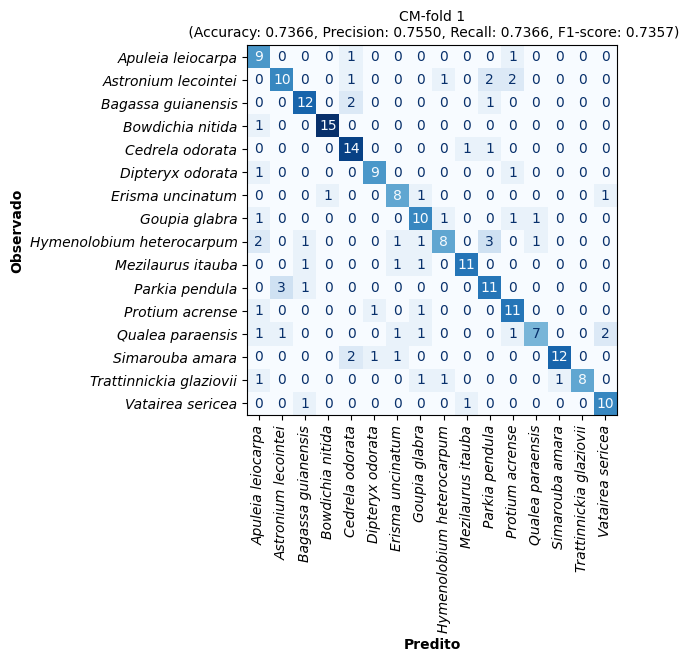

Criando fold 2 >>>
Conjunto de treino antes divisão: (111850, 857)
Conjunto de validação antes divisão: (111850, 857)
Conjunto de treino após divisão: (100650, 857)
Conjunto de validação após divisão: (11200, 857)
Treinando fold 2>>>
Fazendo previsões para o fold 2>>>
Listando métricas para o fold 2 >>>
Salvando matriz de confusão para o folder 2...
Matriz de confusão para o folder 2 salva com sucesso!


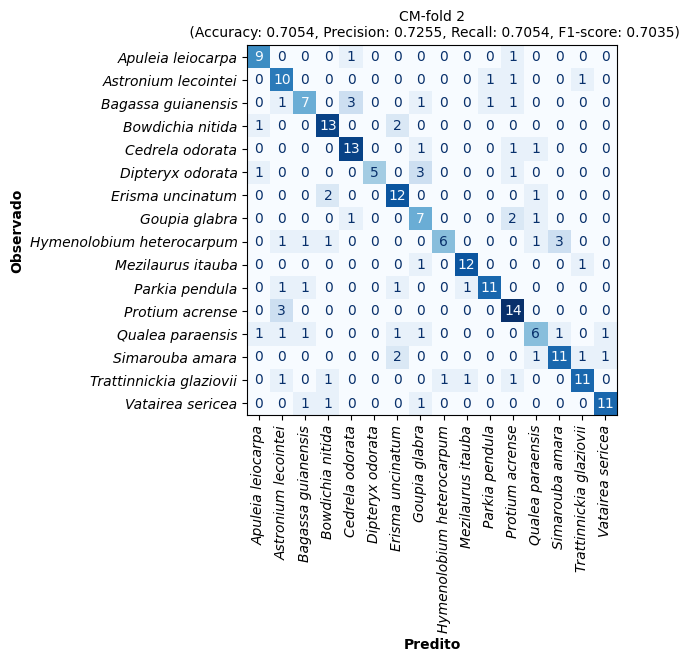

Criando fold 3 >>>
Conjunto de treino antes divisão: (111850, 857)
Conjunto de validação antes divisão: (111850, 857)
Conjunto de treino após divisão: (100650, 857)
Conjunto de validação após divisão: (11200, 857)
Treinando fold 3>>>
Fazendo previsões para o fold 3>>>
Listando métricas para o fold 3 >>>
Salvando matriz de confusão para o folder 3...
Matriz de confusão para o folder 3 salva com sucesso!


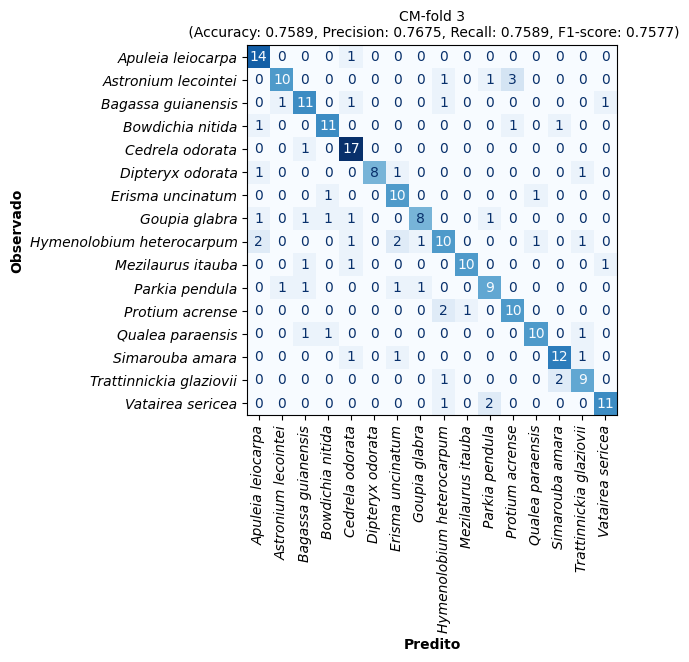

Criando fold 4 >>>
Conjunto de treino antes divisão: (111850, 857)
Conjunto de validação antes divisão: (111850, 857)
Conjunto de treino após divisão: (100650, 857)
Conjunto de validação após divisão: (11200, 857)
Treinando fold 4>>>
Fazendo previsões para o fold 4>>>
Listando métricas para o fold 4 >>>
Salvando matriz de confusão para o folder 4...
Matriz de confusão para o folder 4 salva com sucesso!


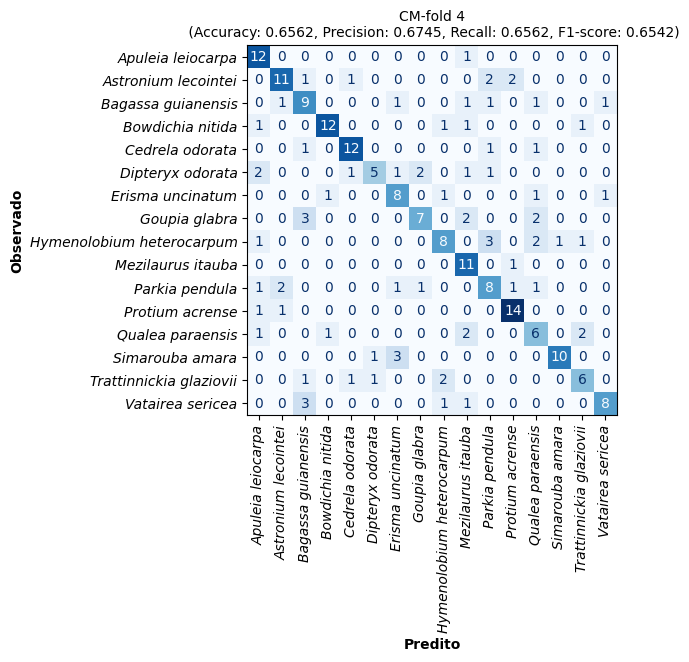

Criando fold 5 >>>
Conjunto de treino antes divisão: (111850, 857)
Conjunto de validação antes divisão: (111850, 857)
Conjunto de treino após divisão: (100650, 857)
Conjunto de validação após divisão: (11200, 857)
Treinando fold 5>>>
Fazendo previsões para o fold 5>>>
Listando métricas para o fold 5 >>>
Salvando matriz de confusão para o folder 5...
Matriz de confusão para o folder 5 salva com sucesso!


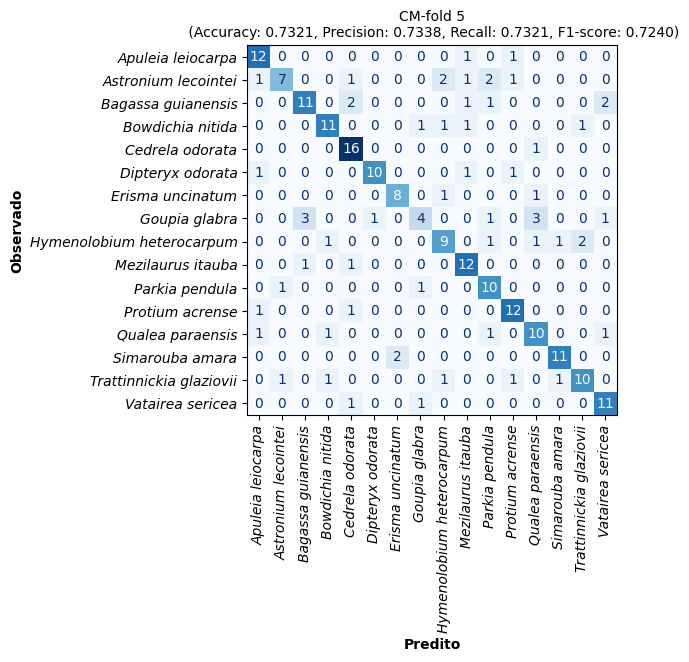

Criando fold 6 >>>
Conjunto de treino antes divisão: (111850, 857)
Conjunto de validação antes divisão: (111850, 857)
Conjunto de treino após divisão: (100700, 857)
Conjunto de validação após divisão: (11150, 857)
Treinando fold 6>>>
Fazendo previsões para o fold 6>>>
Listando métricas para o fold 6 >>>
Salvando matriz de confusão para o folder 6...
Matriz de confusão para o folder 6 salva com sucesso!


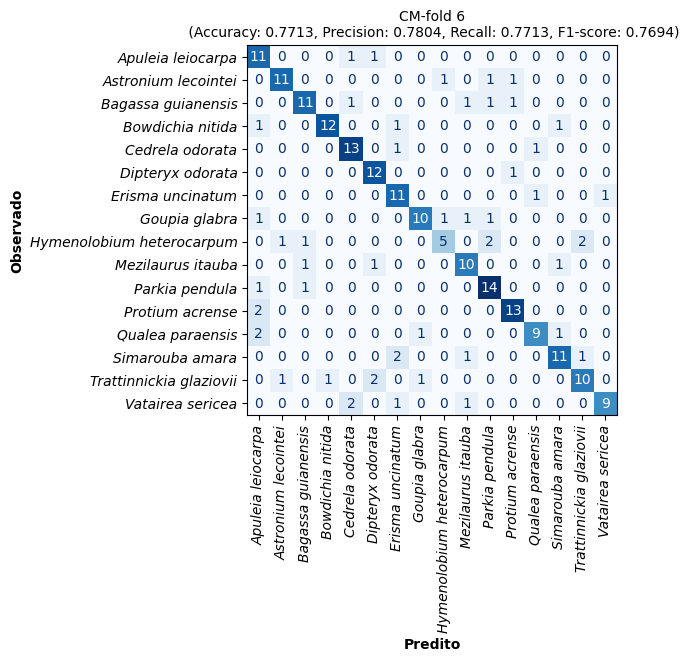

Criando fold 7 >>>
Conjunto de treino antes divisão: (111850, 857)
Conjunto de validação antes divisão: (111850, 857)
Conjunto de treino após divisão: (100650, 857)
Conjunto de validação após divisão: (11200, 857)
Treinando fold 7>>>
Fazendo previsões para o fold 7>>>
Listando métricas para o fold 7 >>>
Salvando matriz de confusão para o folder 7...
Matriz de confusão para o folder 7 salva com sucesso!


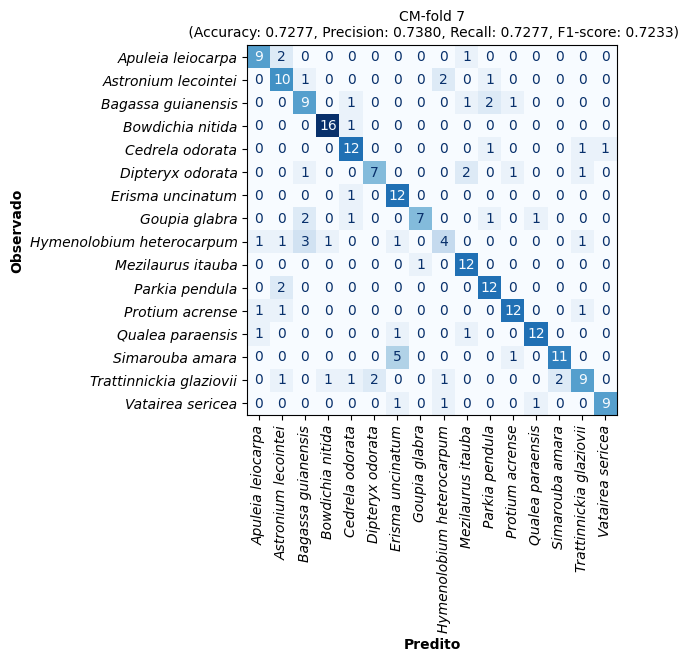

Criando fold 8 >>>
Conjunto de treino antes divisão: (111850, 857)
Conjunto de validação antes divisão: (111850, 857)
Conjunto de treino após divisão: (100700, 857)
Conjunto de validação após divisão: (11150, 857)
Treinando fold 8>>>
Fazendo previsões para o fold 8>>>
Listando métricas para o fold 8 >>>
Salvando matriz de confusão para o folder 8...
Matriz de confusão para o folder 8 salva com sucesso!


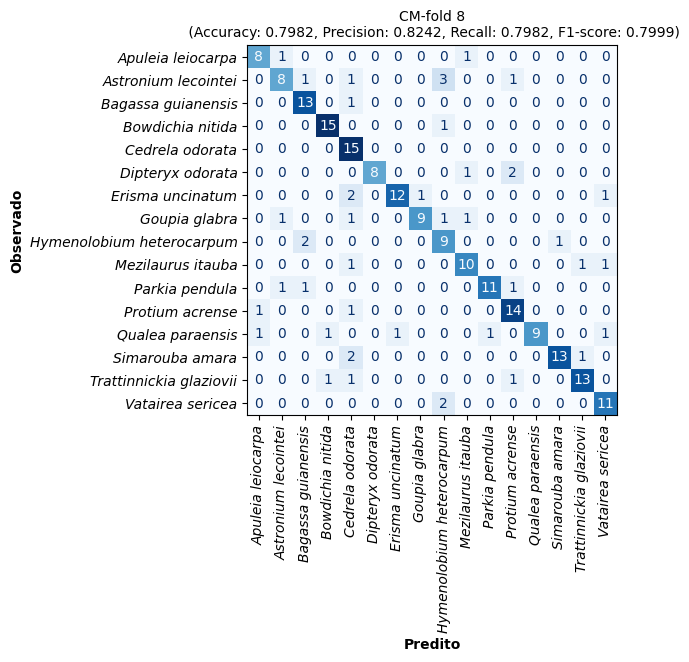

Criando fold 9 >>>
Conjunto de treino antes divisão: (111850, 857)
Conjunto de validação antes divisão: (111850, 857)
Conjunto de treino após divisão: (100650, 857)
Conjunto de validação após divisão: (11200, 857)
Treinando fold 9>>>
Fazendo previsões para o fold 9>>>
Listando métricas para o fold 9 >>>
Salvando matriz de confusão para o folder 9...
Matriz de confusão para o folder 9 salva com sucesso!


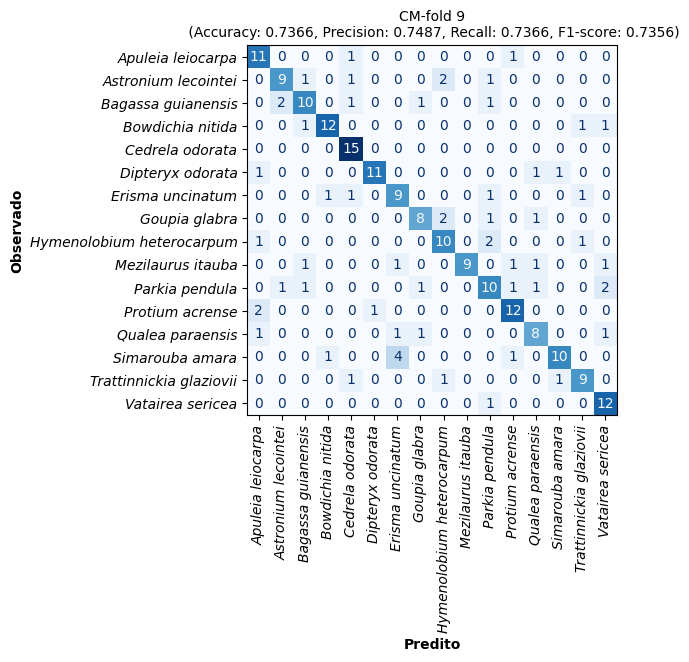

Criando fold 10 >>>
Conjunto de treino antes divisão: (111850, 857)
Conjunto de validação antes divisão: (111850, 857)
Conjunto de treino após divisão: (100700, 857)
Conjunto de validação após divisão: (11150, 857)
Treinando fold 10>>>
Fazendo previsões para o fold 10>>>
Listando métricas para o fold 10 >>>
Salvando matriz de confusão para o folder 10...
Matriz de confusão para o folder 10 salva com sucesso!


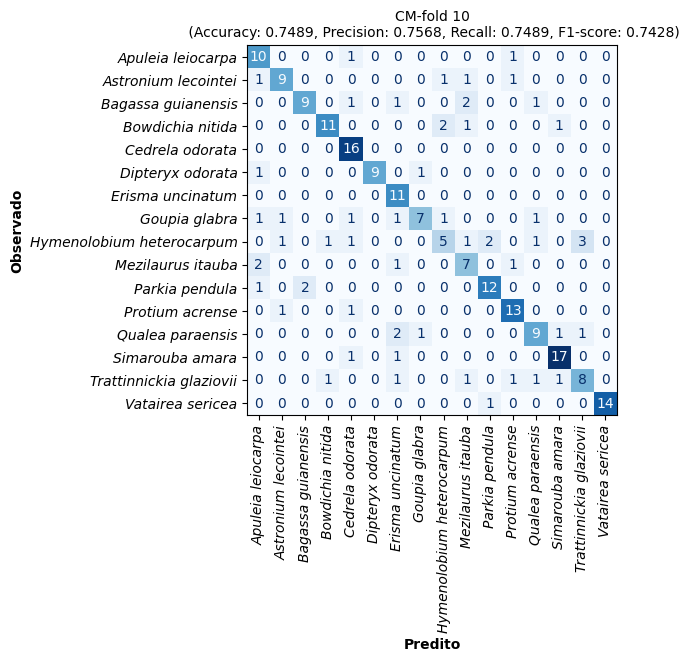

Salvando modelo...
MODELO SALVO!


In [ ]:

accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_nri, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes divisão: {X_train_nri.shape}')
  print(f'Conjunto de validação antes divisão: {X_train_nri.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_nri.iloc[train_index], X_train_nri.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1}>>>')

  # Ajuste do modelo para cada fold
  best_nri_lda.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_nri_lda.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_nri_lda.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')
  cm = confusion_matrix(fold_obs, fold_predictions)

  print('='*70)
  print(f'Listando métricas para o fold {i+1} >>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  # Plotar matriz de confusão utilizando ConfusionMatrixDisplay
  disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=best_nri_lda.classes_)
  disp.plot(cmap = 'Blues', xticks_rotation = 90, colorbar = False)   # Greys, Purples, Blues, Greens, BuGn, GnBu
  disp.ax_.set_title(f'CM-fold {i+1}\n (Accuracy: {accuracy_fold:.4f}, Precision: {precision_fold:.4f}, Recall: {recall_fold:.4f}, F1-score: {f1_fold:.4f})',
                      fontsize=10)
  disp.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
  disp.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
  plt.yticks(style='italic')
  plt.xticks(style='italic')
  disp.ax_.xaxis.set_tick_params(labelsize=10)
  disp.ax_.yaxis.set_tick_params(labelsize=10)

  # Salvando matriz de confusão
  print(f'Salvando matriz de confusão para o folder {i+1}...')
  plt.savefig(f'./Output_patches/LBP/CM/{i+1}_{model_name}', dpi=800, bbox_inches='tight')
  print(f'Matriz de confusão para o folder {i+1} salva com sucesso!')
  plt.show()

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_nri_lda, 'best_nri_lda')
save_model_joblib(best_nri_lda, 'best_nri_lda')

print('MODELO SALVO!')


In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

Métricas por fold:
Fold 1: Accuracy=0.7366, F1=0.7357, Recall=0.7366, Precision=0.7550
Fold 2: Accuracy=0.7054, F1=0.7035, Recall=0.7054, Precision=0.7255
Fold 3: Accuracy=0.7589, F1=0.7577, Recall=0.7589, Precision=0.7675
Fold 4: Accuracy=0.6562, F1=0.6542, Recall=0.6562, Precision=0.6745
Fold 5: Accuracy=0.7321, F1=0.7240, Recall=0.7321, Precision=0.7338
Fold 6: Accuracy=0.7713, F1=0.7694, Recall=0.7713, Precision=0.7804
Fold 7: Accuracy=0.7277, F1=0.7233, Recall=0.7277, Precision=0.7380
Fold 8: Accuracy=0.7982, F1=0.7999, Recall=0.7982, Precision=0.8242
Fold 9: Accuracy=0.7366, F1=0.7356, Recall=0.7366, Precision=0.7487
Fold 10: Accuracy=0.7489, F1=0.7428, Recall=0.7489, Precision=0.7568
Mean -- Standard Deviation -- Minimum Value -- Maximum Value
Accuracy -> mean: 0.7372, std: 0.0363, min: 0.6562, max: 0.7982
F1 Score -> mean: 0.7346, std: 0.0371, min: 0.6542, max: 0.7999
Recall -> mean: 0.7372, std: 0.0363, min: 0.6562, max: 0.7982
Precision -> mean: 0.7504, std: 0.0367, min: 0.65

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_nri_lda = best_nri_lda.predict_proba(X_test_nri)
prob_nri_lda = pd.DataFrame(prob_nri_lda, columns = best_nri_lda.classes_)
class_value = prob_nri_lda.idxmax(axis=1)
prob_value = prob_nri_lda.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_nri_lda = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_nri_lda = pd.concat([y_test, prob_nri_lda], axis = 1)
prob_nri_lda

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_nri_lda = prob_nri_lda.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_nri_lda = soma_prob_nri_lda.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_nri_lda= prob_nri_lda.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_nri_lda = pd.DataFrame({'Id': class_nri_lda.index,
                          'Probabilidade': soma_prob_nri_lda.groupby('Id').max(),
                          'Classe_Predita': class_nri_lda.values,
                          'Classe_Observada': class_obs_nri_lda.values})

# Exibir o resultado
resultado_nri_lda = resultado_nri_lda[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_nri_lda['Classe_Predita'] = resultado_nri_lda['Classe_Predita'].apply(lambda x: x[1])
resultado_nri_lda

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste (n=566) - Voto Majoritário
# ================================================================================
print(classification_report(resultado_nri_lda['Classe_Observada'], resultado_nri_lda['Classe_Predita'], target_names= best_nri_lda.classes_))

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================
cm_nri_lda = confusion_matrix(resultado_nri_lda['Classe_Observada'], resultado_nri_lda['Classe_Predita'])
disp_nri_lda = ConfusionMatrixDisplay(confusion_matrix = cm_nri_lda, display_labels = best_nri_lda.classes_)
disp_nri_lda.plot(cmap = 'Blues', xticks_rotation = 90)
disp_nri_lda.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_nri_lda.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_nri_lda.ax_.xaxis.set_tick_params(labelsize=10)
disp_nri_lda.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/LBP/CM/cm_nri_lda', dpi=800, bbox_inches='tight')
plt.show()

#### **Modelo M9**: Usando features LBP (Todos)

In [ ]:
# ================================================================================
# Definições do estimador LDA
# ================================================================================

rs_unri_lda = pickle.load(open('./Output/LBP/Models/LDA/rs_unri_lda.pickle', "rb"))
best_unri_lda = rs_unri_lda.best_estimator_
model_name = 'best_unri_lda'

Criando fold 1 >>>
Conjunto de treino antes divisão: (111850, 911)
Conjunto de validação antes divisão: (111850, 911)
Conjunto de treino após divisão: (100650, 911)
Conjunto de validação após divisão: (11200, 911)
Treinando fold 1>>>
Fazendo previsões para o fold 1>>>
Listando métricas para o fold 1 >>>
Salvando matriz de confusão para o folder 1...
Matriz de confusão para o folder 1 salva com sucesso!


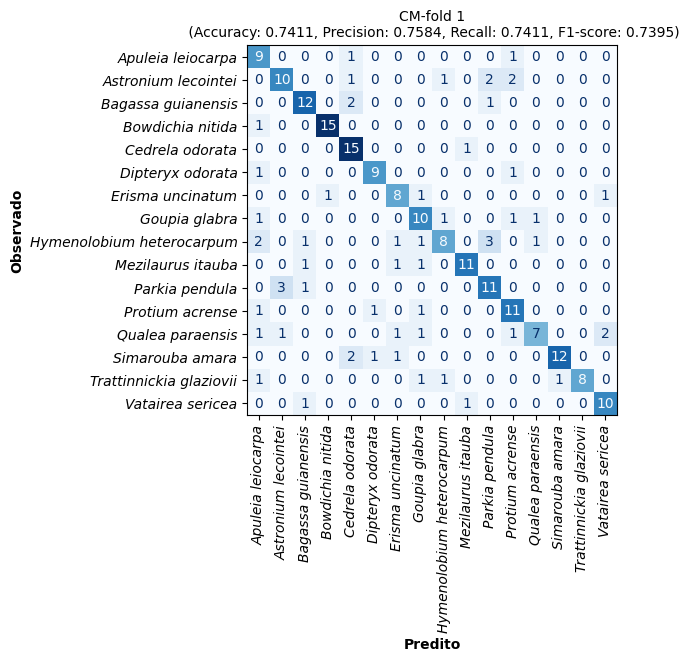

Criando fold 2 >>>
Conjunto de treino antes divisão: (111850, 911)
Conjunto de validação antes divisão: (111850, 911)
Conjunto de treino após divisão: (100650, 911)
Conjunto de validação após divisão: (11200, 911)
Treinando fold 2>>>
Fazendo previsões para o fold 2>>>
Listando métricas para o fold 2 >>>
Salvando matriz de confusão para o folder 2...
Matriz de confusão para o folder 2 salva com sucesso!


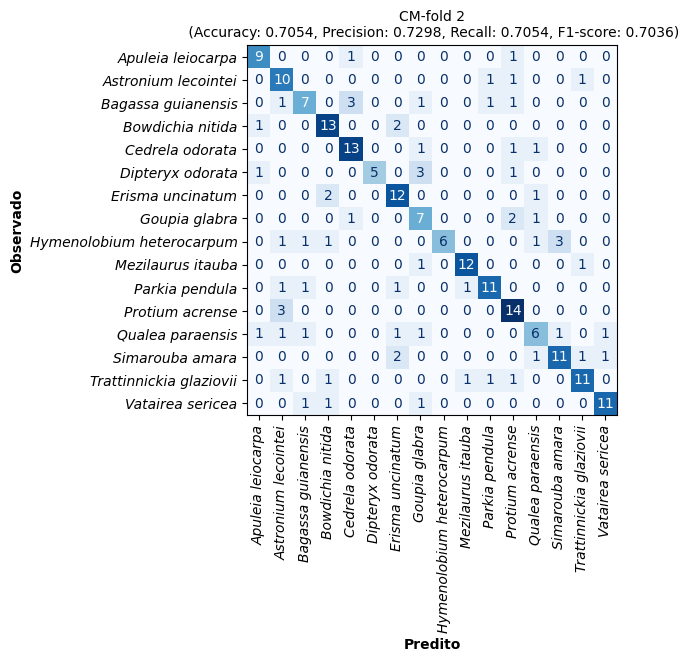

Criando fold 3 >>>
Conjunto de treino antes divisão: (111850, 911)
Conjunto de validação antes divisão: (111850, 911)
Conjunto de treino após divisão: (100650, 911)
Conjunto de validação após divisão: (11200, 911)
Treinando fold 3>>>
Fazendo previsões para o fold 3>>>
Listando métricas para o fold 3 >>>
Salvando matriz de confusão para o folder 3...
Matriz de confusão para o folder 3 salva com sucesso!


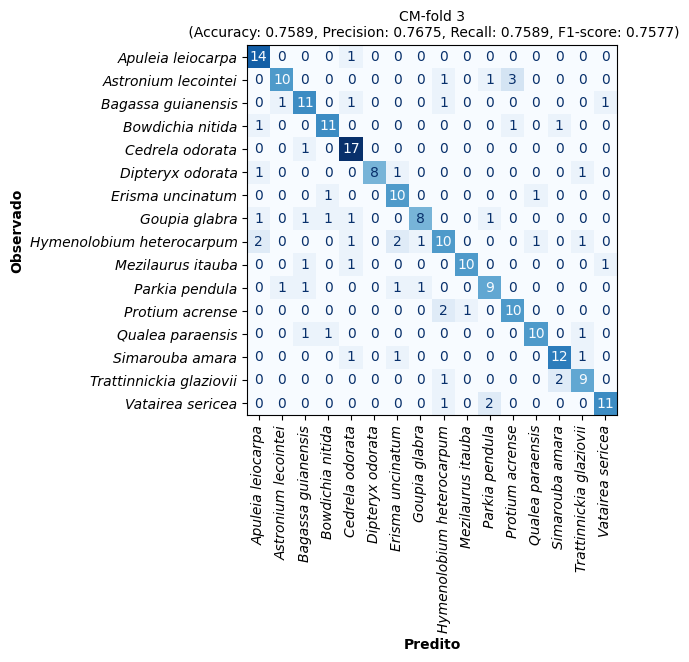

Criando fold 4 >>>
Conjunto de treino antes divisão: (111850, 911)
Conjunto de validação antes divisão: (111850, 911)
Conjunto de treino após divisão: (100650, 911)
Conjunto de validação após divisão: (11200, 911)
Treinando fold 4>>>
Fazendo previsões para o fold 4>>>
Listando métricas para o fold 4 >>>
Salvando matriz de confusão para o folder 4...
Matriz de confusão para o folder 4 salva com sucesso!


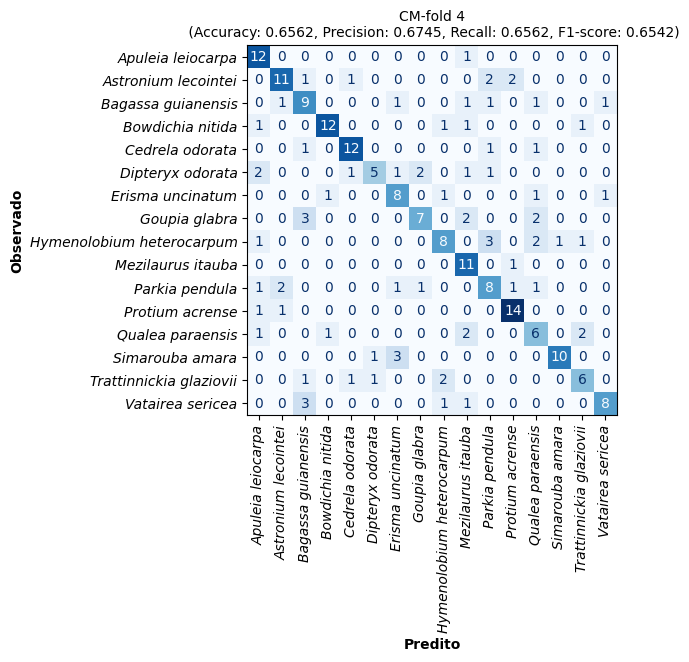

Criando fold 5 >>>
Conjunto de treino antes divisão: (111850, 911)
Conjunto de validação antes divisão: (111850, 911)
Conjunto de treino após divisão: (100650, 911)
Conjunto de validação após divisão: (11200, 911)
Treinando fold 5>>>
Fazendo previsões para o fold 5>>>
Listando métricas para o fold 5 >>>
Salvando matriz de confusão para o folder 5...
Matriz de confusão para o folder 5 salva com sucesso!


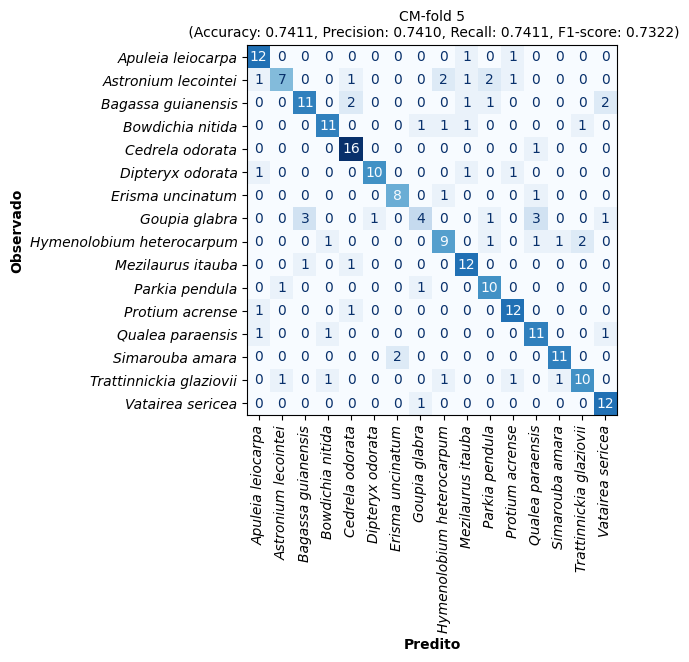

Criando fold 6 >>>
Conjunto de treino antes divisão: (111850, 911)
Conjunto de validação antes divisão: (111850, 911)
Conjunto de treino após divisão: (100700, 911)
Conjunto de validação após divisão: (11150, 911)
Treinando fold 6>>>
Fazendo previsões para o fold 6>>>
Listando métricas para o fold 6 >>>
Salvando matriz de confusão para o folder 6...
Matriz de confusão para o folder 6 salva com sucesso!


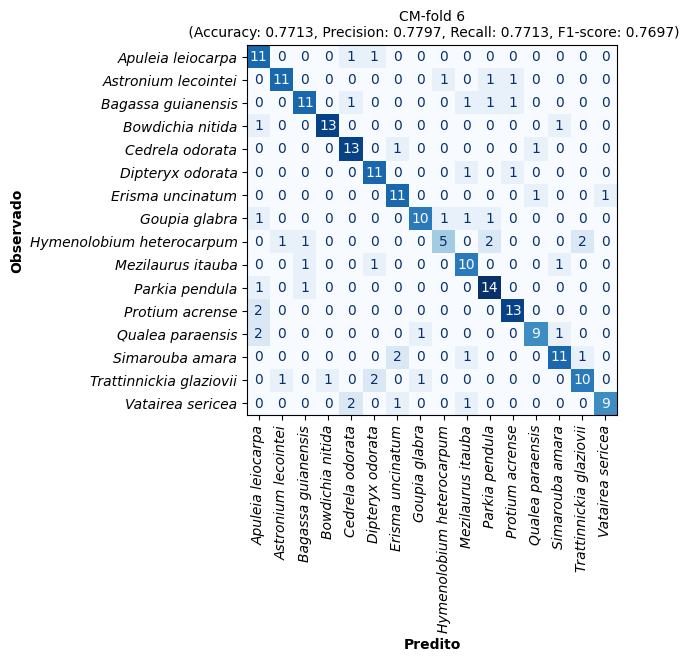

Criando fold 7 >>>
Conjunto de treino antes divisão: (111850, 911)
Conjunto de validação antes divisão: (111850, 911)
Conjunto de treino após divisão: (100650, 911)
Conjunto de validação após divisão: (11200, 911)
Treinando fold 7>>>
Fazendo previsões para o fold 7>>>
Listando métricas para o fold 7 >>>
Salvando matriz de confusão para o folder 7...
Matriz de confusão para o folder 7 salva com sucesso!


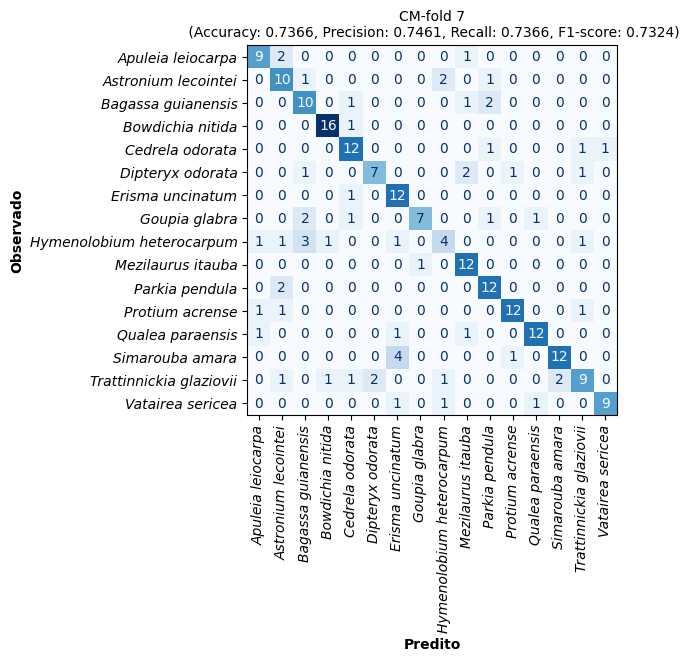

Criando fold 8 >>>
Conjunto de treino antes divisão: (111850, 911)
Conjunto de validação antes divisão: (111850, 911)
Conjunto de treino após divisão: (100700, 911)
Conjunto de validação após divisão: (11150, 911)
Treinando fold 8>>>
Fazendo previsões para o fold 8>>>
Listando métricas para o fold 8 >>>
Salvando matriz de confusão para o folder 8...
Matriz de confusão para o folder 8 salva com sucesso!


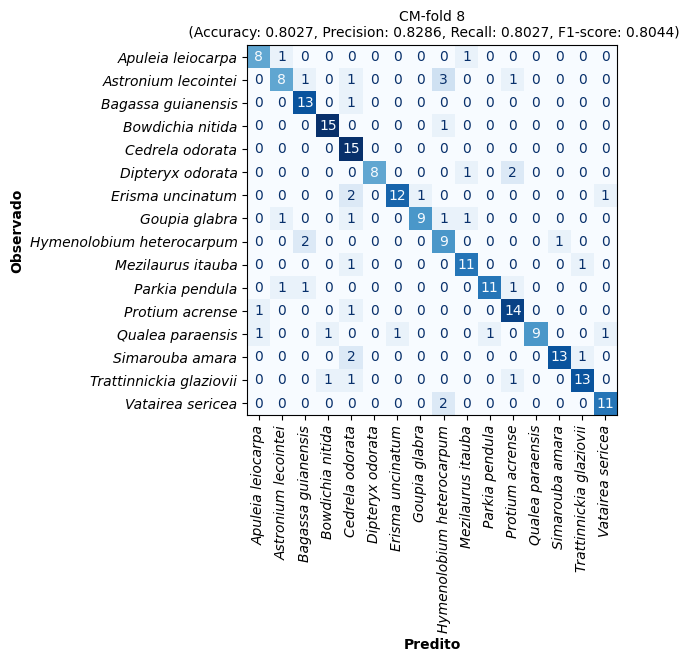

Criando fold 9 >>>
Conjunto de treino antes divisão: (111850, 911)
Conjunto de validação antes divisão: (111850, 911)
Conjunto de treino após divisão: (100650, 911)
Conjunto de validação após divisão: (11200, 911)
Treinando fold 9>>>
Fazendo previsões para o fold 9>>>
Listando métricas para o fold 9 >>>
Salvando matriz de confusão para o folder 9...
Matriz de confusão para o folder 9 salva com sucesso!


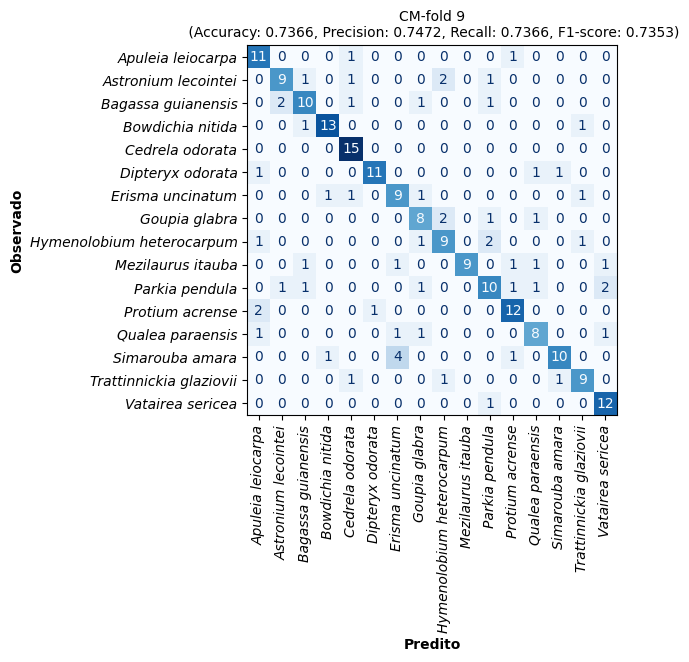

Criando fold 10 >>>
Conjunto de treino antes divisão: (111850, 911)
Conjunto de validação antes divisão: (111850, 911)
Conjunto de treino após divisão: (100700, 911)
Conjunto de validação após divisão: (11150, 911)
Treinando fold 10>>>
Fazendo previsões para o fold 10>>>
Listando métricas para o fold 10 >>>
Salvando matriz de confusão para o folder 10...
Matriz de confusão para o folder 10 salva com sucesso!


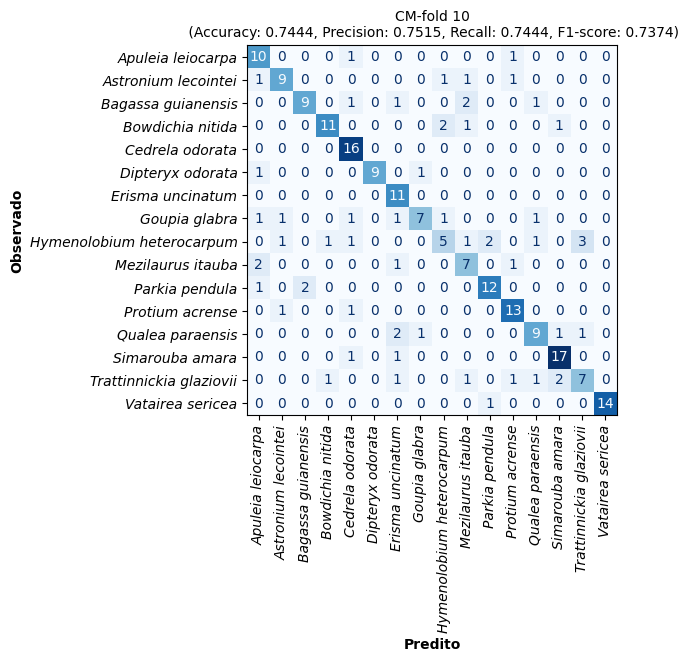

Salvando modelo...
MODELO SALVO!


In [ ]:

accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, test_index) in enumerate(cv.split(X_train_unri, y_train['Class'], groups= z_train)):
  print(f'Criando fold {i+1} >>>')
  print('='*70)

  print(f'Conjunto de treino antes divisão: {X_train_unri.shape}')
  print(f'Conjunto de validação antes divisão: {X_train_unri.shape}')

  # Separando fold de treino e validação
  x_train_fold, x_test_fold = X_train_unri.iloc[train_index], X_train_unri.iloc[test_index]
  y_train_fold, y_test_fold = y_train['Class'].iloc[train_index], y_train['Class'].iloc[test_index]
  z_train_fold = [name.split('_')[0] for name in z_train.iloc[train_index]]
  z_test_fold = [name.split('_')[0] for name in z_train.iloc[test_index]]
  w_train_fold = [name.split('_')[1] for name in z_train.iloc[train_index]]
  w_test_fold = [name.split('_')[1] for name in z_train.iloc[test_index]]

  print(f'Conjunto de treino após divisão: {x_train_fold.shape}')
  print(f'Conjunto de validação após divisão: {x_test_fold.shape}')
  print('='*70)
  print(f'Treinando fold {i+1}>>>')

  # Ajuste do modelo para cada fold
  best_unri_lda.fit(x_train_fold, y_train_fold)

  print('='*70)
  print(f'Fazendo previsões para o fold {i+1}>>>')
  # Colete previsões para este fold
  fold_predictions = best_unri_lda.predict_proba(x_test_fold)

  # Soma das probabilidades das classes dentro de cada grupo(w_test_fold)
  fold_predictions = pd.DataFrame(fold_predictions, columns=best_unri_lda.classes_)
  fold_predictions = fold_predictions.groupby(w_test_fold).sum()

  # Encontrando classe com maior probabilidade para cada grupo(w_test_fold)
  fold_predictions = fold_predictions.idxmax(axis=1)

  # Obtain the observed class for each group(w_test_fold)
  fold_obs = y_test_fold.groupby(w_test_fold).first()

  # Obtendo métricas por fold
  accuracy_fold = accuracy_score(fold_obs, fold_predictions)
  f1_fold = f1_score(fold_obs, fold_predictions, average='weighted')
  recall_fold = recall_score(fold_obs, fold_predictions, average='weighted')
  precision_fold = precision_score(fold_obs, fold_predictions, average='weighted')
  cm = confusion_matrix(fold_obs, fold_predictions)

  print('='*70)
  print(f'Listando métricas para o fold {i+1} >>>')
  # Listando métricas
  accuracy_scores.append(accuracy_fold)
  f1_scores.append(f1_fold)
  recall_scores.append(recall_fold)
  precision_scores.append(precision_fold)

  # Plotar matriz de confusão utilizando ConfusionMatrixDisplay
  disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=best_unri_lda.classes_)
  disp.plot(cmap = 'Blues', xticks_rotation = 90, colorbar = False)   # Greys, Purples, Blues, Greens, BuGn, GnBu
  disp.ax_.set_title(f'CM-fold {i+1}\n (Accuracy: {accuracy_fold:.4f}, Precision: {precision_fold:.4f}, Recall: {recall_fold:.4f}, F1-score: {f1_fold:.4f})',
                      fontsize=10)
  disp.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
  disp.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
  plt.yticks(style='italic')
  plt.xticks(style='italic')
  disp.ax_.xaxis.set_tick_params(labelsize=10)
  disp.ax_.yaxis.set_tick_params(labelsize=10)

  # Salvando matriz de confusão
  print(f'Salvando matriz de confusão para o folder {i+1}...')
  plt.savefig(f'./Output_patches/LBP/CM/{i+1}_{model_name}', dpi=800, bbox_inches='tight')
  print(f'Matriz de confusão para o folder {i+1} salva com sucesso!')
  plt.show()

# Salvando o modelo
print('='*70)
print('Salvando modelo...')
save_model_pickle(best_unri_lda, 'best_unri_lda')
save_model_joblib(best_unri_lda, 'best_unri_lda')

print('MODELO SALVO!')


In [ ]:
#===============================================================================
# Visualizando métricas por fold - Conjunto de Validação - Voto Majoritário
#===============================================================================

print('='*70)
print("Métricas por fold:")
print('='*70)
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}: Accuracy={accuracy_scores[i]:.4f}, F1={f1_scores[i]:.4f}, Recall={recall_scores[i]:.4f}, Precision={precision_scores[i]:.4f}")

# Calculando média das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
min_acc = np.min(accuracy_scores)
max_acc = np.max(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
min_f1 = np.min(f1_scores)
max_f1 = np.max(f1_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
min_recall = np.min(recall_scores)
max_recall = np.max(recall_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
min_precision = np.min(precision_scores)
max_precision = np.max(precision_scores)

print('='*70)
print("Mean -- Standard Deviation -- Minimum Value -- Maximum Value")
print('='*70)
# Visualizando média das métricas
print(f"Accuracy -> mean: {mean_accuracy:.4f}, std: {std_accuracy:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"F1 Score -> mean: {mean_f1:.4f}, std: {std_f1:.4f}, min: {min_f1:.4f}, max: {max_f1:.4f}")
print(f"Recall -> mean: {mean_recall:.4f}, std: {std_recall:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")
print(f"Precision -> mean: {mean_precision:.4f}, std: {std_precision:.4f}, min: {min_acc:.4f}, max: {max_acc:.4f}")

Métricas por fold:
Fold 1: Accuracy=0.7411, F1=0.7395, Recall=0.7411, Precision=0.7584
Fold 2: Accuracy=0.7054, F1=0.7036, Recall=0.7054, Precision=0.7298
Fold 3: Accuracy=0.7589, F1=0.7577, Recall=0.7589, Precision=0.7675
Fold 4: Accuracy=0.6562, F1=0.6542, Recall=0.6562, Precision=0.6745
Fold 5: Accuracy=0.7411, F1=0.7322, Recall=0.7411, Precision=0.7410
Fold 6: Accuracy=0.7713, F1=0.7697, Recall=0.7713, Precision=0.7797
Fold 7: Accuracy=0.7366, F1=0.7324, Recall=0.7366, Precision=0.7461
Fold 8: Accuracy=0.8027, F1=0.8044, Recall=0.8027, Precision=0.8286
Fold 9: Accuracy=0.7366, F1=0.7353, Recall=0.7366, Precision=0.7472
Fold 10: Accuracy=0.7444, F1=0.7374, Recall=0.7444, Precision=0.7515
Mean -- Standard Deviation -- Minimum Value -- Maximum Value
Accuracy -> mean: 0.7394, std: 0.0368, min: 0.6562, max: 0.8027
F1 Score -> mean: 0.7366, std: 0.0375, min: 0.6542, max: 0.8044
Recall -> mean: 0.7394, std: 0.0368, min: 0.6562, max: 0.8027
Precision -> mean: 0.7524, std: 0.0369, min: 0.65

In [ ]:
#===============================================================================
# Obtendo tabela de probabilidades - 28300 patches de imagens
#===============================================================================

prob_unri_lda = best_unri_lda.predict_proba(X_test_unri)
prob_unri_lda = pd.DataFrame(prob_unri_lda, columns = best_unri_lda.classes_)
class_value = prob_unri_lda.idxmax(axis=1)
prob_value = prob_unri_lda.max(axis=1)

# Obtendo tabela de classes preditas e observadas
prob_unri_lda = pd.DataFrame({'Classe_Predita': class_value, 'Probabilidade': prob_value})
prob_unri_lda = pd.concat([y_test, prob_unri_lda], axis = 1)
prob_unri_lda

In [ ]:
#===============================================================================
# Obtendo resultado por Voto Majoritário (n= 566)
#===============================================================================

# Agrupar os dados por 'Id' e calcular a soma das probabilidades para cada classe
soma_prob_unri_lda = prob_unri_lda.groupby('Id').apply(lambda x: x.groupby('Classe_Predita')['Probabilidade'].sum())

# Para cada grupo de 'Id', selecionar a classe com a maior soma de probabilidades
class_unri_lda = soma_prob_unri_lda.groupby('Id').idxmax()

# Obter a classe observada para cada grupo de 'Id'
class_obs_unri_lda= prob_unri_lda.groupby('Id')['Class'].first()

# Criar um DataFrame com as informações de interesse
resultado_unri_lda = pd.DataFrame({'Id': class_unri_lda.index,
                          'Probabilidade': soma_prob_unri_lda.groupby('Id').max(),
                          'Classe_Predita': class_unri_lda.values,
                          'Classe_Observada': class_obs_unri_lda.values})

# Exibir o resultado
resultado_unri_lda = resultado_unri_lda[['Probabilidade', 'Classe_Predita', 'Classe_Observada']]
# Extrair apenas o nome da classe predita
resultado_unri_lda['Classe_Predita'] = resultado_unri_lda['Classe_Predita'].apply(lambda x: x[1])
resultado_unri_lda

In [ ]:
# ================================================================================
# Relatório de classificação - Conjunto de teste (n=566) - Voto Majoritário
# ================================================================================
print(classification_report(resultado_unri_lda['Classe_Observada'], resultado_unri_lda['Classe_Predita'], target_names= best_unri_lda.classes_))

In [ ]:
# ================================================================================
# Matriz de Confusão - Conjunto de Teste (n = 566) - Voto Majoritário
# ================================================================================
cm_unri_lda = confusion_matrix(resultado_unri_lda['Classe_Observada'], resultado_unri_lda['Classe_Predita'])
disp_unri_lda = ConfusionMatrixDisplay(confusion_matrix = cm_unri_lda, display_labels = best_unri_lda.classes_)
disp_unri_lda.plot(cmap = 'Blues', xticks_rotation = 90)
disp_unri_lda.ax_.set_xlabel('Predito', fontsize=10, style='normal', fontweight = 'bold')
disp_unri_lda.ax_.set_ylabel("Observado", fontsize=10, style='normal', fontweight = 'bold')
disp_unri_lda.ax_.xaxis.set_tick_params(labelsize=10)
disp_unri_lda.ax_.yaxis.set_tick_params(labelsize=10)
plt.yticks(style='italic')
plt.xticks(style='italic')

plt.savefig('./Output_patches/LBP/CM/cm_unri_lda', dpi=800, bbox_inches='tight')
plt.show()